In [1]:
%pwd

'C:\\Users\\bened'

In [ ]:
#Other types of cointegration tests: fractional cointegration, partial cointegration, threshold cointegration,

In [ ]:
#Cointegrations tests tra: i tipi di crops, methane, nitrous_oxide, co2, logfert I(2),ghg,metyear ovvero temperature change,
#precipitation, gdp

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.pyplot import figure
import scipy.signal as signal
import warnings
warnings.simplefilter("ignore")
met_prep_citrus_1961_2014=pd.DataFrame(met_prep_citrus_1961_2014)
met_prep_citrus_1961_2014.to_csv('met_prep_citrus_1961_2014.csv')

NameError: name 'met_prep_citrus_1961_2014' is not defined

In [5]:
fruit_y=pd.read_csv('FAOSTAT Yield Fruit')
cereals_y=pd.read_csv('FAOSTAT Yield Cereals')
citrus_y=pd.read_csv('FAOSTAT Yield Citrus')
crops_primary_y=pd.read_csv('FAOSTAT Yield Crops primary')
fibre_crops_y=pd.read_csv('FAOSTAT Yield Fibre crops primary')
oil_crops_y=pd.read_csv('FAOSTAT Yield Oilcrops')
pulses_y=pd.read_csv('FAOSTAT Yield Pulses')
veggies_y=pd.read_csv('FAOSTAT Yield Veggies')
#upload rainfall data
#rf69 = pd.read_csv('pr_1961_1990_ITA.csv')
#rf92 = pd.read_csv('pr_1991_2020_ITA.csv')
##upload temperature data
#tas69 = pd.read_csv('tas_1961_1990_ITA.csv')
#tas92 = pd.read_csv('tas_1991_2020_ITA.csv')
#tas69.head()
#
##stack the rainfall data in one single dataframe
#rf_stack=pd.concat([rf69,rf92],axis=0).reset_index()
#rf_stack=rf_stack.iloc[0:673,:]
#rf_stack.head()
##stack the temperature data in one single dataframe
#tas_stack=pd.concat([tas69,tas92],axis=0).reset_index()
#tas_stack=tas_stack.iloc[0:673,:]
#tas_stack.head()
#
##Take the seasonal average for temperature, obtained computing the average between every three rows 
#tas_avg=np.zeros(225)
#tas_avg=tas_stack.iloc[:,1].groupby(np.arange(len(tas_stack))//3).mean()
#tas_avg=pd.DataFrame({'Avg temp':tas_avg.values})
#tas_avg['Season']=""
#i = iter(['Winter', 'Spring', 'Summer','Autumn'])
##tas_avg['Season'] = tas_avg.index.map(dict(zip(tas_avg.index, cycle(i))))
#tas_avg.head()
#
##Take the season average for rainfall, obtained computing the average between every three rows. Since the data starts from
##January it is possible to directly take the average of three adjacent values.
#rf_avg=np.zeros(225)
#rf_avg=rf_stack.iloc[:,1].groupby(np.arange(len(rf_stack))//3).mean()
#rf_avg=pd.DataFrame({'Avg rf':rf_avg.values})
#rf_avg['Season']=""
#i = iter(['Winter', 'Spring', 'Summer','Autumn'])
##rf_avg['Season'] = rf_avg.index.map(dict(zip(rf_avg.index, cycle(i))))
#rf_avg.head()

co2 = pd.read_csv('co2 world.csv')
co2=pd.DataFrame(co2)
co2=co2.loc[10838:10997]
co2.head()
co2['Annual CO2 emissions']

ghg = pd.read_csv('GHG log.csv')
ghg=pd.DataFrame(ghg)
ghg=ghg.loc[2268:2294]
ghg
ghg['Total GHG emissions including LUCF (CAIT)']

ghglog = np.log(ghg['Total GHG emissions including LUCF (CAIT)'])
ghglog=pd.DataFrame(ghglog)
ghglog

nitr_ox = pd.read_csv('nitrous oxide.csv')
nitr_ox=pd.DataFrame(nitr_ox)
nitr_ox=nitr_ox.loc[2268:2294]
#nitr_ox
#nitr_ox['Total including LUCF (N2O emissions, CAIT)']

methane = pd.read_csv('methane.csv')
methane=pd.DataFrame(methane)
methane=methane.loc[2268:2294]
methane
methane['Total including LUCF (CH4 emissions, CAIT)']

fertilizers =pd.read_csv('fertilizers over hectare of crop land.csv')
fertilizers=pd.DataFrame(fertilizers)
fertilizers=fertilizers.loc[4641:4698]
fertilizers['Fertilizer consumption (kilograms per hectare of arable land)']


fish_production= pd.read_csv('capture-fisheries-vs-aquaculture.csv') #indica in metric tons di fish 
fish_production
wild_fish_tons=pd.read_csv('capture-fishery-production.csv') #indica il wild fish pescato in tons
wild_fish_tons=pd.DataFrame(wild_fish_tons)
wild_fish_tons=wild_fish_tons.loc[6621:6679]
wild_fish_tons['Capture fisheries production (metric tons)']
fish_production=fish_production.loc[6621:6679]
fish_production['Capture fisheries production (metric tons)']

precipitation = pd.read_csv('average-monthly-precipitation.csv')
precipitation=pd.DataFrame(precipitation)
#precipitation=precipitation.loc[8972:9084]
precipitation=precipitation.loc[233:346]

gdp=(pd.read_csv('gdp-world-regions-stacked-area.csv'))
gdp=pd.DataFrame(gdp)
gdp=gdp.loc[7200:7316]

metyear=pd.read_csv('FAOSTAT_data_10-17-2021.csv')

PI = pd.read_csv('FAOSTAT_data_10-31-2021.csv')
diff_PI=np.diff(PI['Value'])

In [10]:
precipitation.head()

,Entity,Code,Year,Average monthly precipitation
233,Algeria,DZA,1903,0.899129
234,Algeria,DZA,1904,1.133613
235,Algeria,DZA,1905,0.798013
236,Algeria,DZA,1906,1.217273
237,Algeria,DZA,1907,1.192603


In [3]:
print(fruit_y['Value'].describe())
print(cereals_y['Value'].describe())
print(citrus_y['Value'].describe())
print(fibre_crops_y['Value'].describe())
print(oil_crops_y['Value'].describe())
print(pulses_y['Value'].describe())
print(veggies_y['Value'].describe())
print(methane['Total including LUCF (CH4 emissions, CAIT)'].describe())
print(co2['Annual CO2 emissions'].describe())
print(nitr_ox['Total including LUCF (N2O emissions, CAIT)'].describe())
print(ghg['Total GHG emissions including LUCF (CAIT)'].describe())
print(gdp['GDP'].describe())
print(metyear['Value'].describe())
print(precipitation['Average monthly precipitation'].describe())

count        59.000000
mean     123544.355932
std       21791.646663
min       70221.000000
25%      108978.000000
50%      123513.000000
75%      141523.000000
max      162228.000000
Name: Value, dtype: float64
count       59.000000
mean     41024.084746
std      11090.854580
min      21152.000000
25%      32023.500000
50%      39449.000000
75%      51304.500000
max      57175.000000
Name: Value, dtype: float64
count        59.000000
mean     175587.728814
std       25304.887315
min      118807.000000
25%      159067.000000
50%      172070.000000
75%      193105.000000
max      228064.000000
Name: Value, dtype: float64
count       59.000000
mean     11944.576271
std      18959.551300
min         33.000000
25%        799.000000
50%       2872.000000
75%      12691.500000
max      63446.000000
Name: Value, dtype: float64
count       59.000000
mean     24323.423729
std       5632.866411
min      13269.000000
25%      19954.500000
50%      24844.000000
75%      28641.000000
max      37544

In [8]:
import statsmodels.tsa.stattools as cointtest
from statsmodels.tsa.vector_ar.vecm import coint_johansen as co_joh
#Phillips Ouliaris cointegration test
from arch.unitroot.cointegration import phillips_ouliaris
#It consists of four tests: Z_t, Z_a, P_u and P_z
from arch.unitroot import engle_granger

#crops_new=np.array(crops_primary_y.iloc[:-1,11])
#crops_primary_y

# Graphs

In [5]:
import matplotlib.pyplot as plt

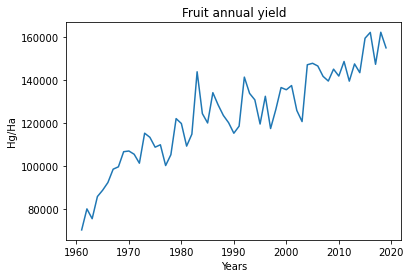

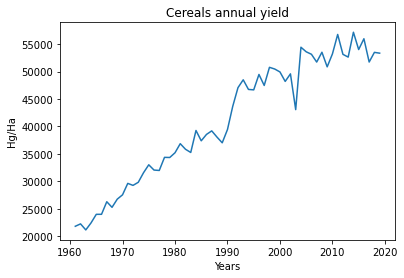

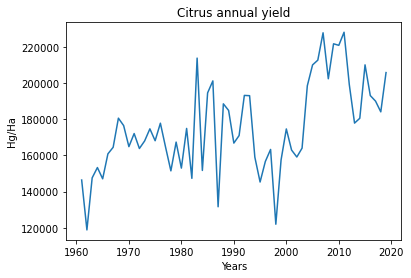

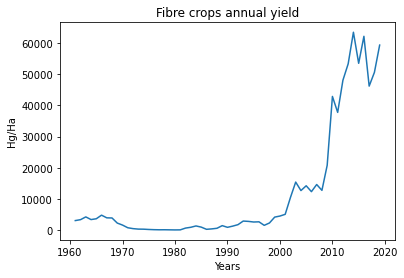

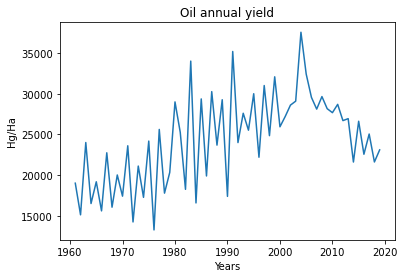

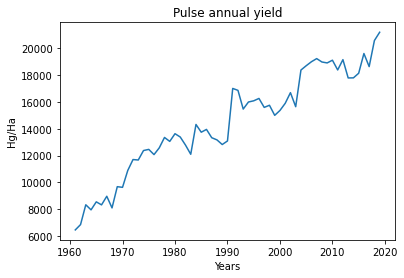

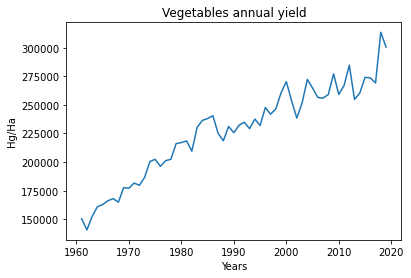

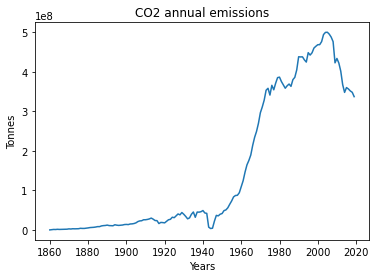

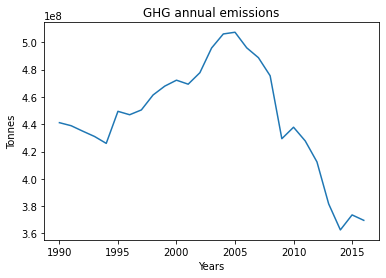

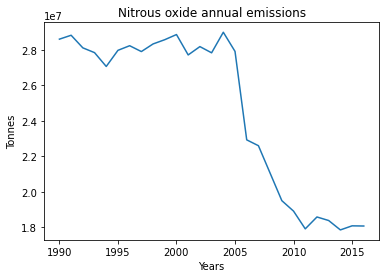

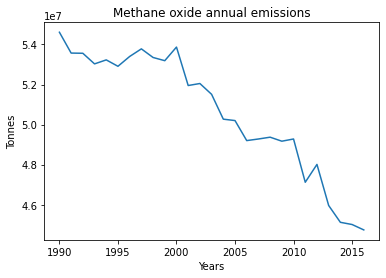

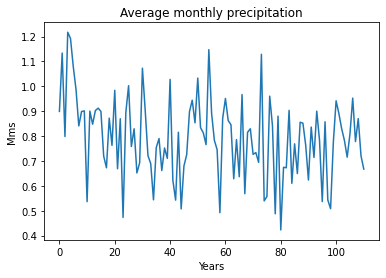

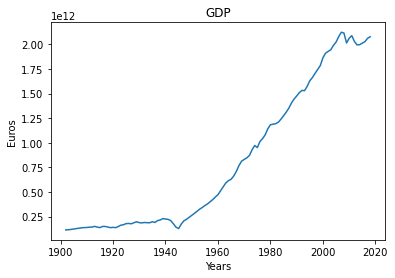

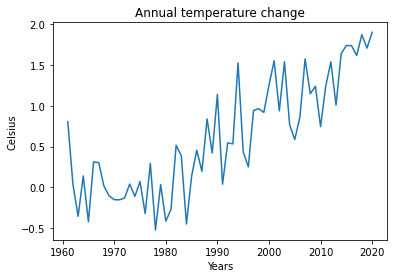

In [6]:
years=np.zeros(len(fruit_y['Value']))
years=years.astype(int)
years[0]=1961
for i in range(0,len(fruit_y['Value'])-1):
    years[i+1]=years[i]+1

plt.plot(years,fruit_y['Value'])
plt.title('Fruit annual yield')
plt.xlabel('Years')
plt.ylabel('Hg/Ha')
plt.show()
plt.plot(years,cereals_y['Value'])
plt.title('Cereals annual yield')
plt.xlabel('Years')
plt.ylabel('Hg/Ha')
plt.show()

plt.plot(years,citrus_y['Value'])
plt.title('Citrus annual yield')
plt.xlabel('Years')
plt.ylabel('Hg/Ha')
plt.show()

plt.plot(years,fibre_crops_y['Value'])
plt.title('Fibre crops annual yield')
plt.xlabel('Years')
plt.ylabel('Hg/Ha')
plt.show()

plt.plot(years,oil_crops_y['Value'])
plt.title('Oil annual yield')
plt.xlabel('Years')
plt.ylabel('Hg/Ha')
plt.show()

plt.plot(years,pulses_y['Value'])
plt.title('Pulse annual yield')
plt.xlabel('Years')
plt.ylabel('Hg/Ha')
plt.show()

plt.plot(years,veggies_y['Value'])
plt.title('Vegetables annual yield')
plt.xlabel('Years')
plt.ylabel('Hg/Ha')
plt.show()


years=np.zeros(len(co2['Annual CO2 emissions']))
years=years.astype(int)
years[0]=1860
for i in range(0,len(co2['Annual CO2 emissions'])-1):
    years[i+1]=years[i]+1

plt.plot(years,co2['Annual CO2 emissions'])
plt.title('CO2 annual emissions')
plt.xlabel('Years')
plt.ylabel('Tonnes')
plt.show()

years=np.zeros(len(ghg['Total GHG emissions including LUCF (CAIT)']))
years=years.astype(int)
years[0]=1990
for i in range(0,len(ghg['Total GHG emissions including LUCF (CAIT)'])-1):
    years[i+1]=years[i]+1


plt.plot(years,ghg['Total GHG emissions including LUCF (CAIT)'])
plt.title('GHG annual emissions')
plt.xlabel('Years')
plt.ylabel('Tonnes')
plt.show()

years=np.zeros(len(nitr_ox['Total including LUCF (N2O emissions, CAIT)']))
years=years.astype(int)
years[0]=1990
for i in range(0,len(nitr_ox['Total including LUCF (N2O emissions, CAIT)'])-1):
    years[i+1]=years[i]+1

plt.plot(years,nitr_ox['Total including LUCF (N2O emissions, CAIT)'])
plt.title('Nitrous oxide annual emissions')
plt.xlabel('Years')
plt.ylabel('Tonnes')
plt.show()

plt.plot(years,methane['Total including LUCF (CH4 emissions, CAIT)'])
plt.title('Methane oxide annual emissions')
plt.xlabel('Years')
plt.ylabel('Tonnes')
plt.show()

years=np.zeros(len(precipitation))
years=years.astype(int)
years[0]=1903
for i in range(0,len(precipitation)-3):
    years[i+1]=years[i]+1

prep=np.array(precipitation['Average monthly precipitation'])    
plt.plot(prep[:-3])
plt.title('Average monthly precipitation')
plt.xlabel('Years')
plt.ylabel('Mms')
plt.show()

years=np.zeros(len(gdp))
years=years.astype(int)
years[0]=1902
for i in range(0,len(gdp)-1):
    years[i+1]=years[i]+1

plt.plot(years,gdp['GDP'])
plt.title('GDP')
plt.xlabel('Years')
plt.ylabel('Euros')
plt.show()


years=np.zeros(len(metyear))
years=years.astype(int)
years[0]=1961
for i in range(0,len(metyear)-1):
    years[i+1]=years[i]+1


plt.plot(years,metyear['Value'])
plt.title('Annual temperature change')
plt.xlabel('Years')
plt.ylabel('Celsius')
plt.show()

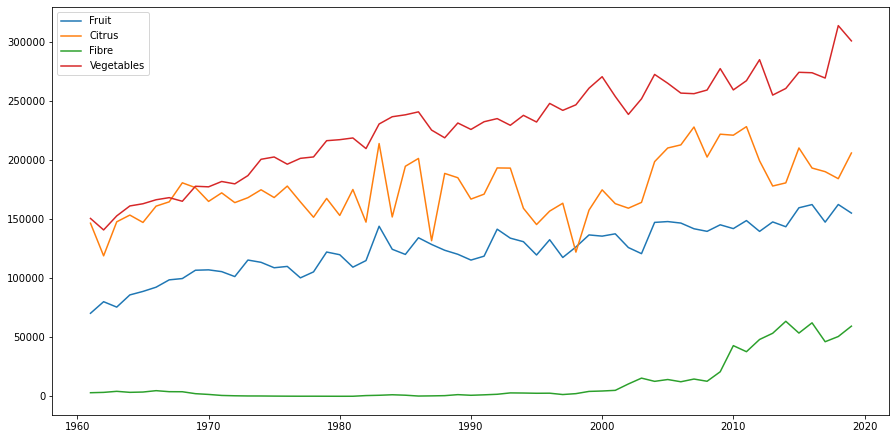

In [7]:
years=np.zeros(len(fruit_y['Value']))
years=years.astype(int)
years[0]=1961
for i in range(0,len(fruit_y['Value'])-1):
    years[i+1]=years[i]+1

    
plt.figure(figsize=(15,7.5))
plt.plot(years,fruit_y['Value'], label='Fruit')
#plt.plot(years,cereals_y['Value'], label='Cereals')
plt.plot(years,citrus_y['Value'], label='Citrus')
plt.plot(years,fibre_crops_y['Value'], label='Fibre')
#plt.plot(years,oil_crops_y['Value'], label='Oil')
#plt.plot(years,pulses_y['Value'], label='Pulses')
plt.plot(years,veggies_y['Value'], label='Vegetables')
plt.legend()
plt.show()




In [8]:
print(fruit_y['Value'].describe())
print(cereals_y['Value'].describe())
print(citrus_y['Value'].describe())
print(fibre_crops_y['Value'].describe())
print(oil_crops_y['Value'].describe())
print(pulses_y['Value'].describe())
print(veggies_y['Value'].describe())

count        59.000000
mean     123544.355932
std       21791.646663
min       70221.000000
25%      108978.000000
50%      123513.000000
75%      141523.000000
max      162228.000000
Name: Value, dtype: float64
count       59.000000
mean     41024.084746
std      11090.854580
min      21152.000000
25%      32023.500000
50%      39449.000000
75%      51304.500000
max      57175.000000
Name: Value, dtype: float64
count        59.000000
mean     175587.728814
std       25304.887315
min      118807.000000
25%      159067.000000
50%      172070.000000
75%      193105.000000
max      228064.000000
Name: Value, dtype: float64
count       59.000000
mean     11944.576271
std      18959.551300
min         33.000000
25%        799.000000
50%       2872.000000
75%      12691.500000
max      63446.000000
Name: Value, dtype: float64
count       59.000000
mean     24323.423729
std       5632.866411
min      13269.000000
25%      19954.500000
50%      24844.000000
75%      28641.000000
max      37544

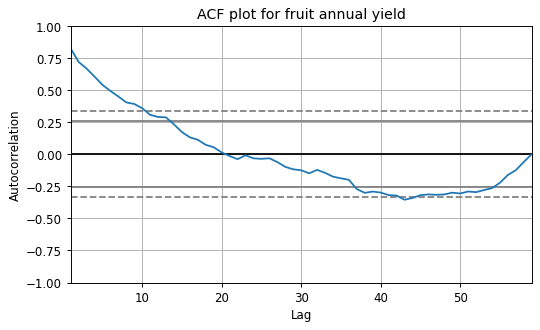

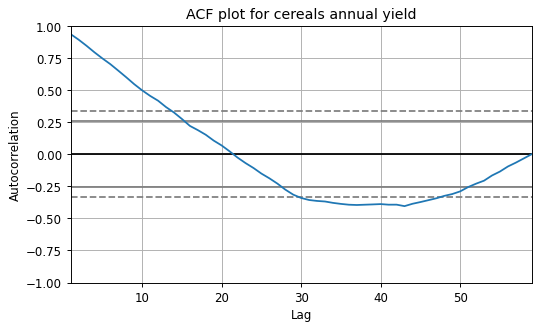

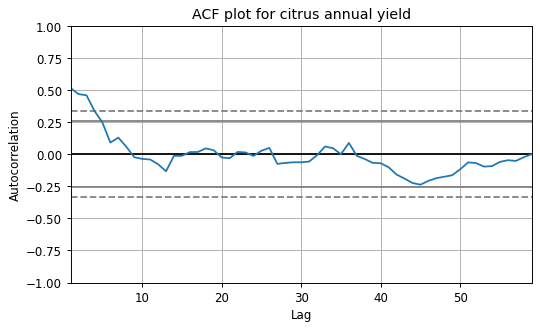

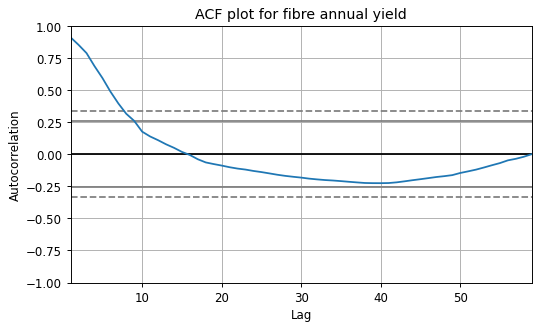

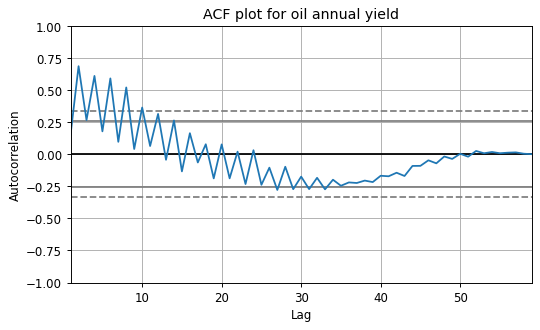

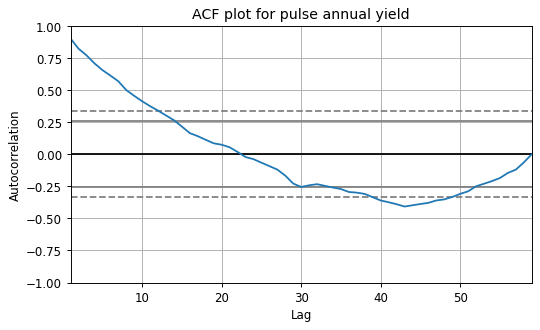

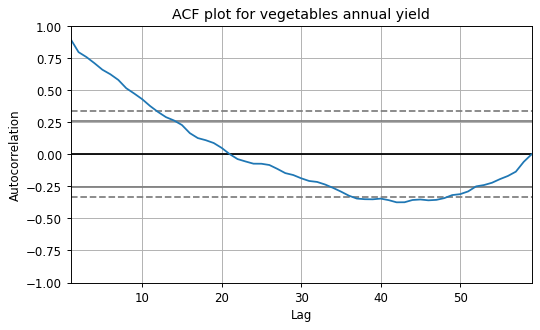

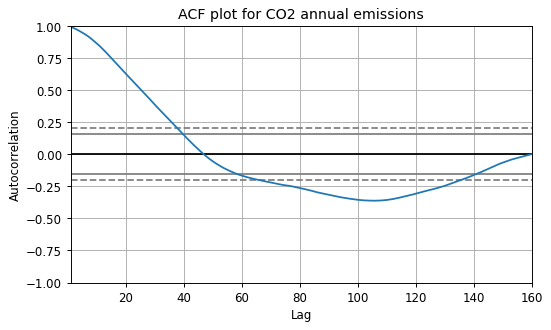

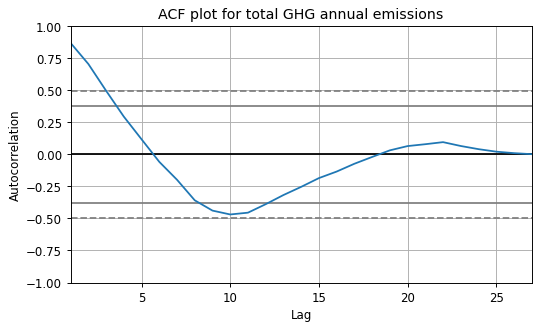

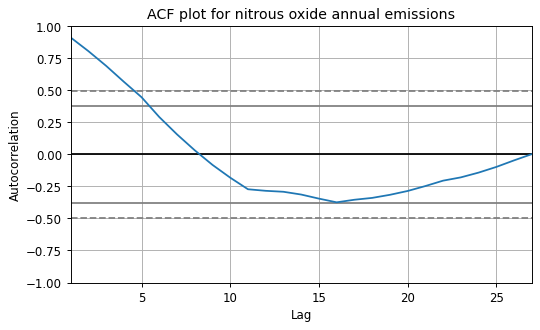

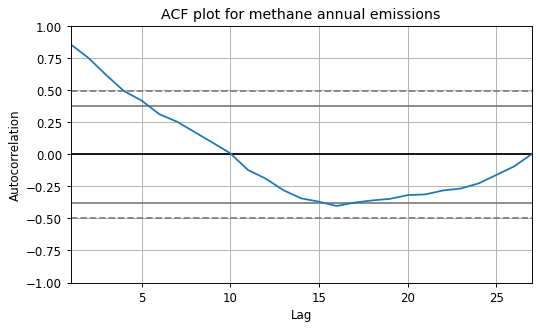

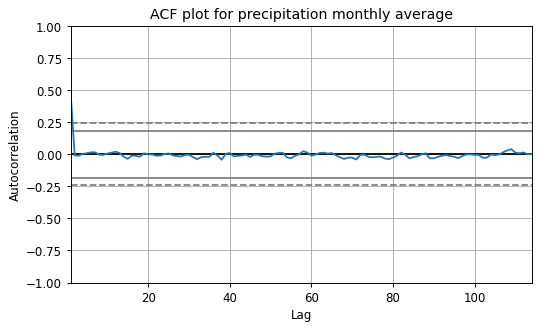

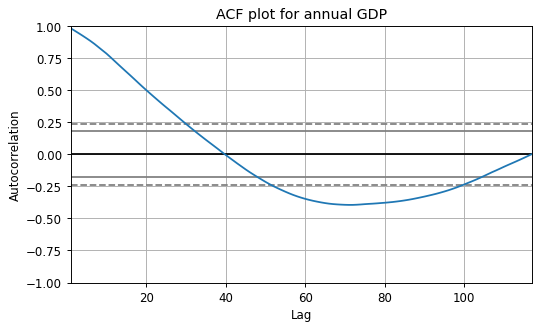

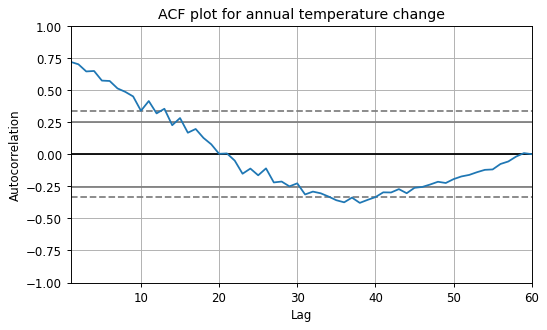

In [9]:
#Autocorrelation plots

from pandas.plotting import autocorrelation_plot
plt.rcParams.update({'figure.figsize':(7,4), 'figure.dpi':85})
autocorrelation_plot(fruit_y['Value'])
plt.title('ACF plot for fruit annual yield')
plt.show()
autocorrelation_plot(cereals_y['Value'])
plt.title('ACF plot for cereals annual yield')
plt.show()
autocorrelation_plot(citrus_y['Value'])
plt.title('ACF plot for citrus annual yield')
plt.show()
autocorrelation_plot(fibre_crops_y['Value'])
plt.title('ACF plot for fibre annual yield')
plt.show()
autocorrelation_plot(oil_crops_y['Value'])
plt.title('ACF plot for oil annual yield')
plt.show()
autocorrelation_plot(pulses_y['Value'])
plt.title('ACF plot for pulse annual yield')
plt.show()
autocorrelation_plot(veggies_y['Value'])
plt.title('ACF plot for vegetables annual yield')
plt.show()
autocorrelation_plot(co2['Annual CO2 emissions'])
plt.title('ACF plot for CO2 annual emissions')
plt.show()
autocorrelation_plot(ghg['Total GHG emissions including LUCF (CAIT)'])
plt.title('ACF plot for total GHG annual emissions')
plt.show()
autocorrelation_plot(nitr_ox['Total including LUCF (N2O emissions, CAIT)'])
plt.title('ACF plot for nitrous oxide annual emissions')
plt.show()
autocorrelation_plot(methane['Total including LUCF (CH4 emissions, CAIT)'])
plt.title('ACF plot for methane annual emissions')
plt.show()
autocorrelation_plot(precipitation['Average monthly precipitation'])
plt.title('ACF plot for precipitation monthly average')
plt.show()
autocorrelation_plot(gdp['GDP'])
plt.title('ACF plot for annual GDP')
plt.show()
autocorrelation_plot(metyear['Value'])
plt.title('ACF plot for annual temperature change')
plt.show()


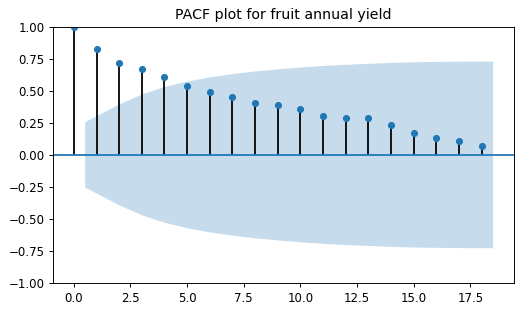

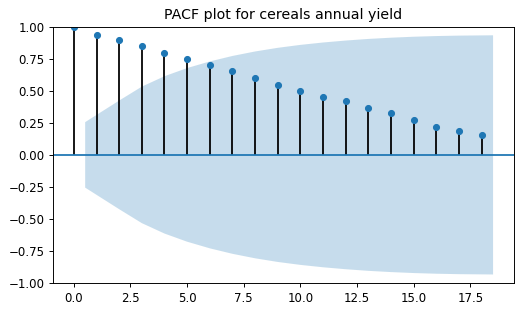

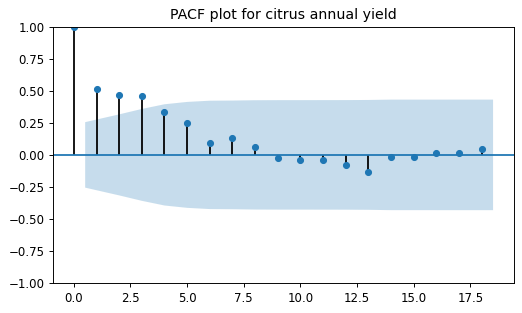

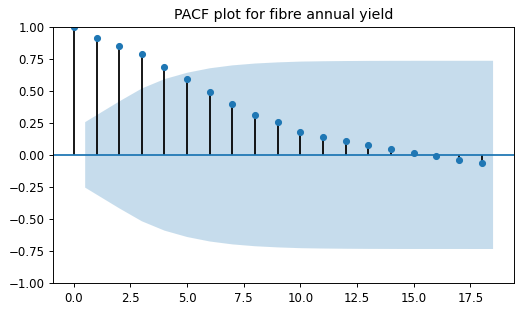

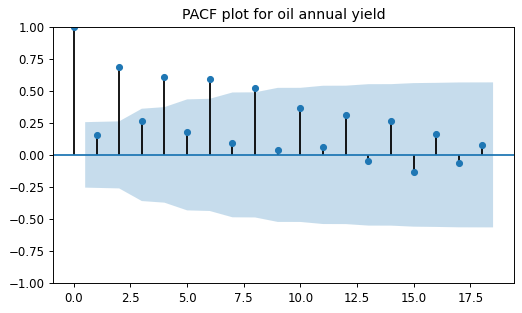

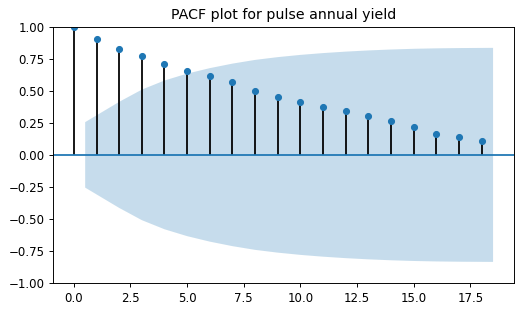

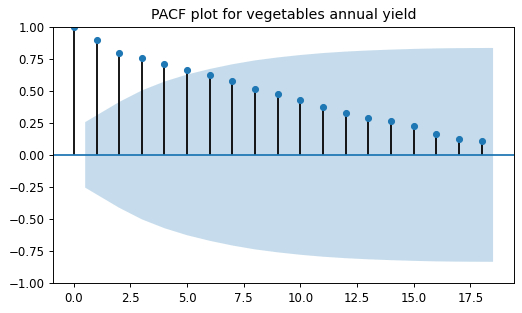

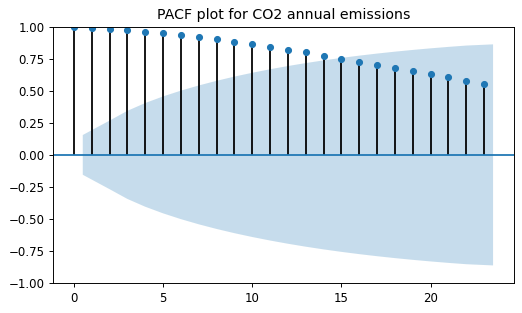

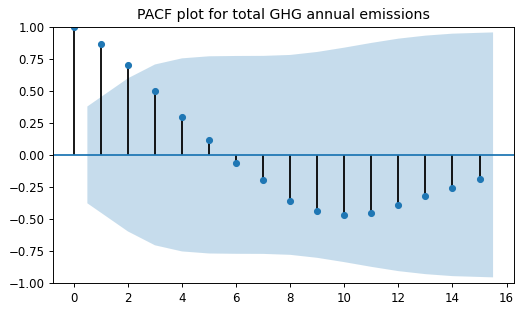

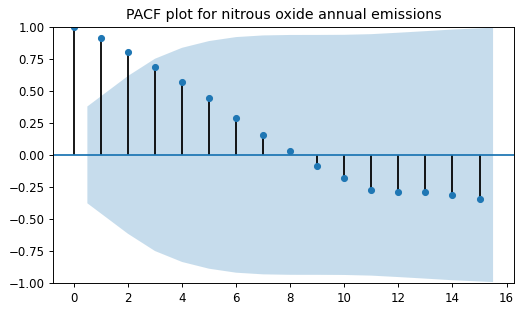

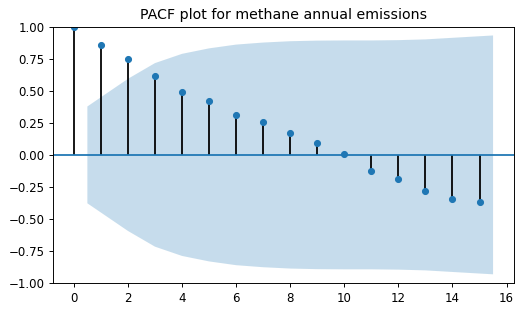

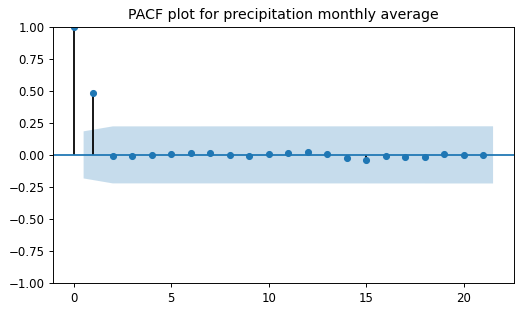

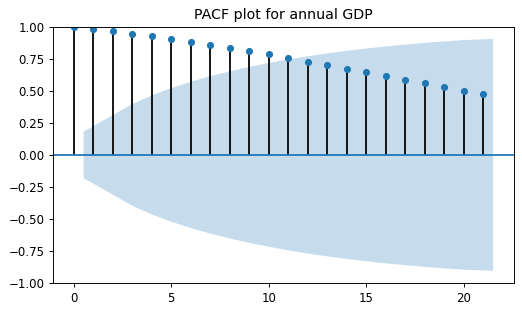

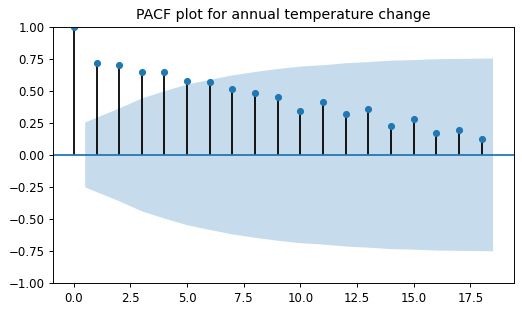

In [10]:
#Partial autocorrelation plots

from statsmodels.graphics.tsaplots import plot_acf

from pandas.plotting import autocorrelation_plot
plt.rcParams.update({'figure.figsize':(7,4), 'figure.dpi':85})
plot_acf(fruit_y['Value'])
plt.title('PACF plot for fruit annual yield')
plt.show()
plot_acf(cereals_y['Value'])
plt.title('PACF plot for cereals annual yield')
plt.show()
plot_acf(citrus_y['Value'])
plt.title('PACF plot for citrus annual yield')
plt.show()
plot_acf(fibre_crops_y['Value'])
plt.title('PACF plot for fibre annual yield')
plt.show()
plot_acf(oil_crops_y['Value'])
plt.title('PACF plot for oil annual yield')
plt.show()
plot_acf(pulses_y['Value'])
plt.title('PACF plot for pulse annual yield')
plt.show()
plot_acf(veggies_y['Value'])
plt.title('PACF plot for vegetables annual yield')
plt.show()
plot_acf(co2['Annual CO2 emissions'])
plt.title('PACF plot for CO2 annual emissions')
plt.show()
plot_acf(ghg['Total GHG emissions including LUCF (CAIT)'])
plt.title('PACF plot for total GHG annual emissions')
plt.show()
plot_acf(nitr_ox['Total including LUCF (N2O emissions, CAIT)'])
plt.title('PACF plot for nitrous oxide annual emissions')
plt.show()
plot_acf(methane['Total including LUCF (CH4 emissions, CAIT)'])
plt.title('PACF plot for methane annual emissions')
plt.show()
plot_acf(precipitation['Average monthly precipitation'])
plt.title('PACF plot for precipitation monthly average')
plt.show()
plot_acf(gdp['GDP'])
plt.title('PACF plot for annual GDP')
plt.show()
plot_acf(metyear['Value'])
plt.title('PACF plot for annual temperature change')
plt.show()


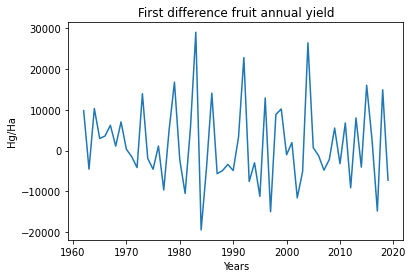

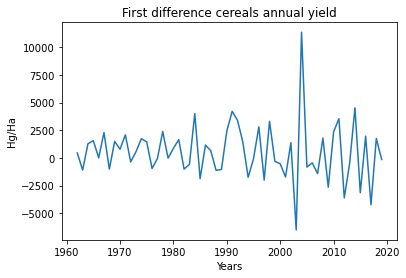

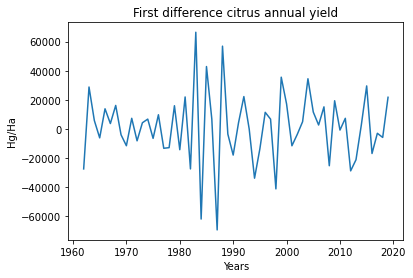

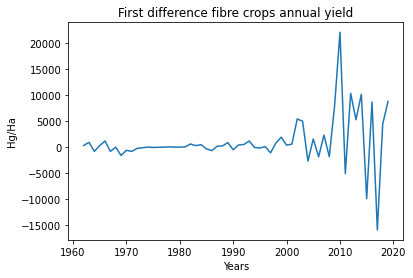

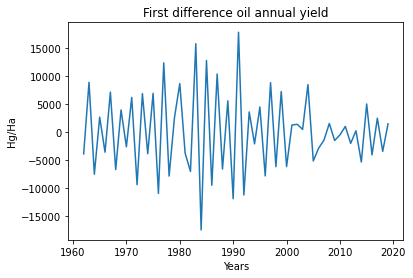

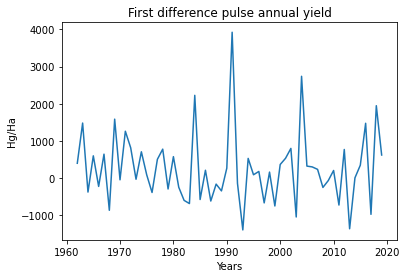

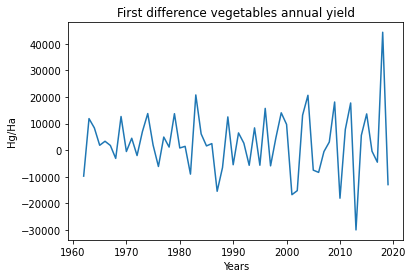

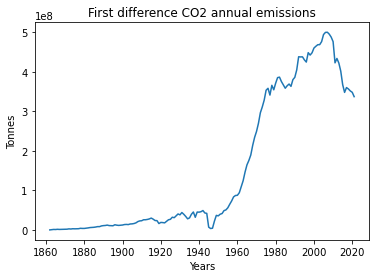

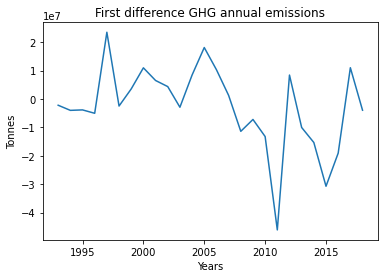

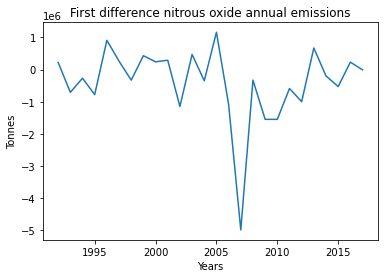

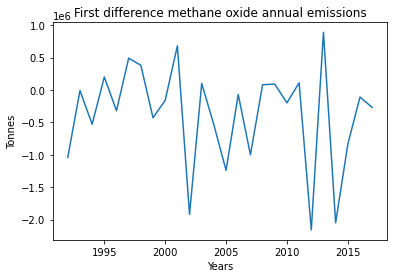

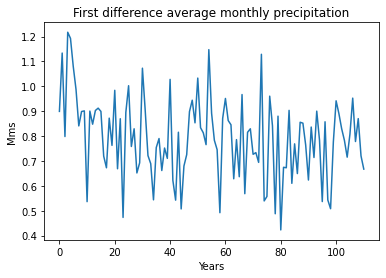

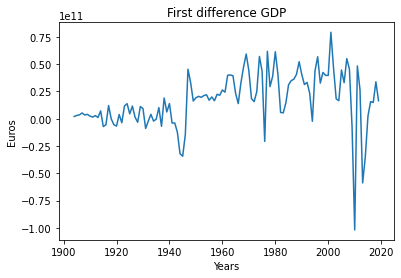

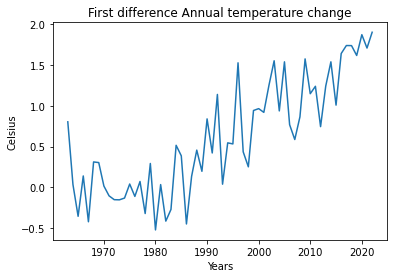

In [6]:
#Plots First Difference variables
import matplotlib.pyplot as plt
diff_fr=np.diff(fruit_y['Value'])
years=np.zeros(len(diff_fr))
years=years.astype(int)
years[0]=1962
for i in range(0,len(diff_fr)-1):
               years[i+1]=years[i]+1
years
plt.plot(years,diff_fr)
plt.title('First difference fruit annual yield')
plt.xlabel('Years')
plt.ylabel('Hg/Ha')
plt.show()

diff_cerea=np.diff(cereals_y['Value'])
plt.plot(years,diff_cerea)
plt.title('First difference cereals annual yield')
plt.xlabel('Years')
plt.ylabel('Hg/Ha')
plt.show()

diff_citru=np.diff(citrus_y['Value'])
plt.plot(years,diff_citru)
plt.title('First difference citrus annual yield')
plt.xlabel('Years')
plt.ylabel('Hg/Ha')
plt.show()

diff_fi=np.diff(fibre_crops_y['Value'])
plt.plot(years,diff_fi)
plt.title('First difference fibre crops annual yield')
plt.xlabel('Years')
plt.ylabel('Hg/Ha')
plt.show()


diff_oi=np.diff(oil_crops_y['Value'])
plt.plot(years,diff_oi)
plt.title('First difference oil annual yield')
plt.xlabel('Years')
plt.ylabel('Hg/Ha')
plt.show()

diff_pu=np.diff(pulses_y['Value'])
plt.plot(years,diff_pu)
plt.title('First difference pulse annual yield')
plt.xlabel('Years')
plt.ylabel('Hg/Ha')
plt.show()

diff_ve=np.diff(veggies_y['Value'])

plt.plot(years,diff_ve)
plt.title('First difference vegetables annual yield')
plt.xlabel('Years')
plt.ylabel('Hg/Ha')
plt.show()


years=np.zeros(len(co2['Annual CO2 emissions']))
years=years.astype(int)
years[0]=1862
for i in range(0,len(co2['Annual CO2 emissions'])-1):
    years[i+1]=years[i]+1
diffco2=np.diff(co2['Annual CO2 emissions'])
plt.plot(years,co2['Annual CO2 emissions'])
plt.title('First difference CO2 annual emissions')
plt.xlabel('Years')
plt.ylabel('Tonnes')
plt.show()

years=np.zeros(len(ghg['Total GHG emissions including LUCF (CAIT)']))
years=years.astype(int)
years[0]=1993
for i in range(0,len(ghg['Total GHG emissions including LUCF (CAIT)'])-1):
    years[i+1]=years[i]+1

    
diffghg=np.diff(ghg['Total GHG emissions including LUCF (CAIT)'])
years=np.zeros(len(diffghg))
years=years.astype(int)
years[0]=1993
for i in range(0,len(diffghg)-1):
    years[i+1]=years[i]+1

plt.plot(years,diffghg)
plt.title('First difference GHG annual emissions')
plt.xlabel('Years')
plt.ylabel('Tonnes')
plt.show()


diffnitrox=np.diff(nitr_ox['Total including LUCF (N2O emissions, CAIT)'])
years=np.zeros(len(diffnitrox))
years=years.astype(int)
years[0]=1992
for i in range(0,len(diffnitrox)-1):
    years[i+1]=years[i]+1

plt.plot(years,diffnitrox)
plt.title('First difference nitrous oxide annual emissions')
plt.xlabel('Years')
plt.ylabel('Tonnes')
plt.show()

diffmethane=np.diff(methane['Total including LUCF (CH4 emissions, CAIT)'])
plt.plot(years,diffmethane)
plt.title('First difference methane oxide annual emissions')
plt.xlabel('Years')
plt.ylabel('Tonnes')
plt.show()

years=np.zeros(len(precipitation))
years=years.astype(int)
years[0]=1904
for i in range(0,len(precipitation)-3):
    years[i+1]=years[i]+1

diffprep=np.array(precipitation['Average monthly precipitation'])    
plt.plot(diffprep[:-3])
plt.title('First difference average monthly precipitation')
plt.xlabel('Years')
plt.ylabel('Mms')
plt.show()

diffgdp=np.diff(gdp['GDP'])
years=np.zeros(len(diffgdp))
years=years.astype(int)
years[0]=1904
for i in range(0,len(diffgdp)-1):
    years[i+1]=years[i]+1

plt.plot(years,diffgdp)
plt.title('First difference GDP')
plt.xlabel('Years')
plt.ylabel('Euros')
plt.show()


years=np.zeros(len(metyear))
years=years.astype(int)
years[0]=1963
for i in range(0,len(metyear)-1):
    years[i+1]=years[i]+1

diffmetyear=np.diff(metyear['Value'])
plt.plot(years,metyear['Value'])
plt.title('First difference Annual temperature change')
plt.xlabel('Years')
plt.ylabel('Celsius')
plt.show()

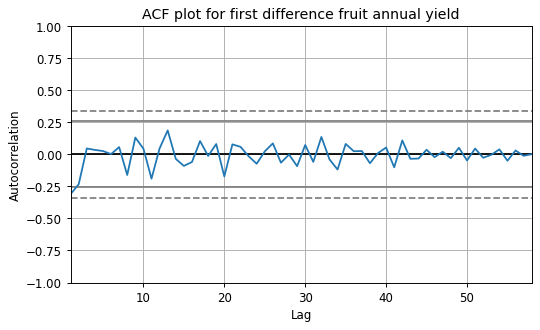

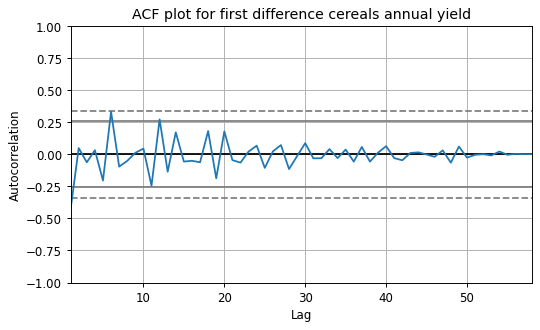

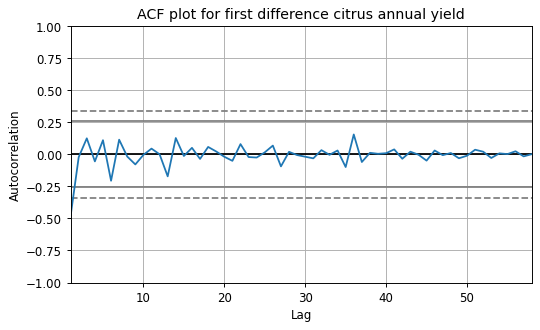

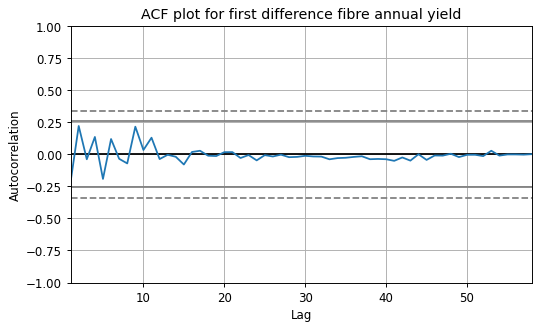

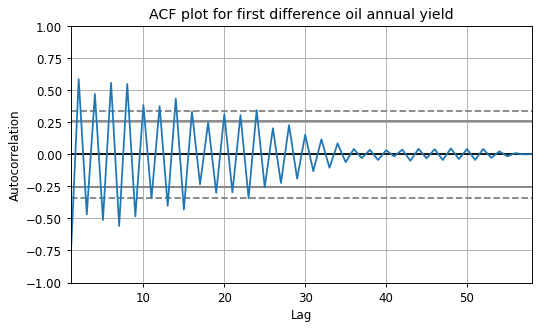

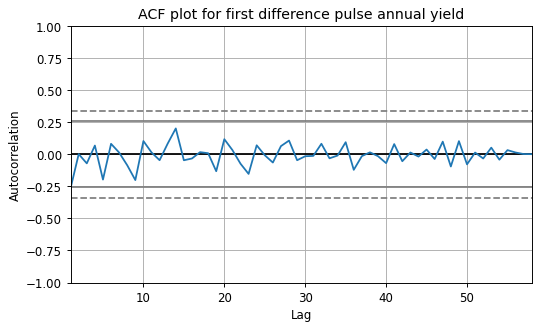

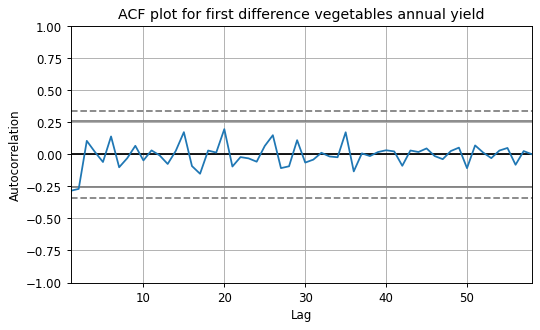

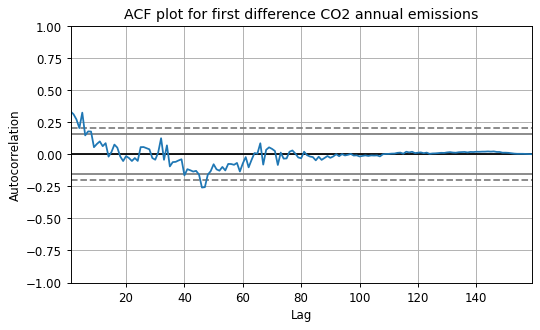

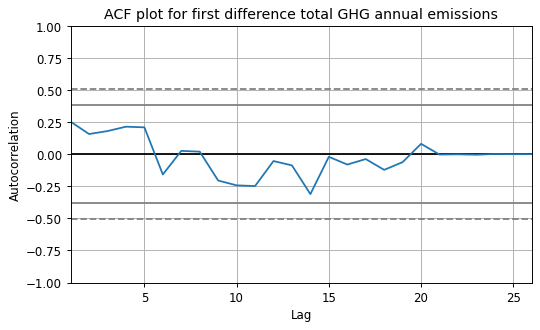

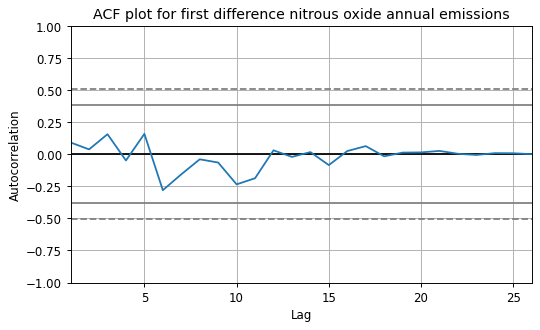

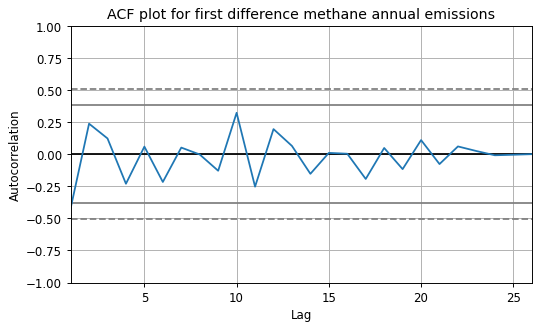

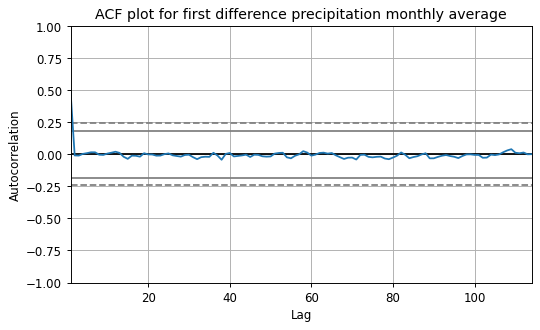

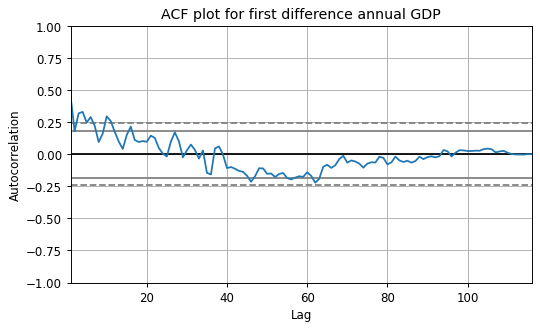

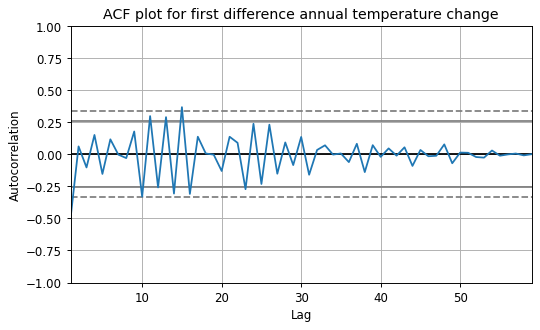

In [15]:
#Autocorrelation plots First Difference Variables

from pandas.plotting import autocorrelation_plot
plt.rcParams.update({'figure.figsize':(7,4), 'figure.dpi':85})
autocorrelation_plot(diff_fr)
plt.title('ACF plot for first difference fruit annual yield')
plt.show()
autocorrelation_plot(diff_cerea)
plt.title('ACF plot for first difference cereals annual yield')
plt.show()
autocorrelation_plot(diff_citru)
plt.title('ACF plot for first difference citrus annual yield')
plt.show()
autocorrelation_plot(diff_fi)
plt.title('ACF plot for first difference fibre annual yield')
plt.show()
autocorrelation_plot(diff_oi)
plt.title('ACF plot for first difference oil annual yield')
plt.show()
autocorrelation_plot(diff_pu)
plt.title('ACF plot for first difference pulse annual yield')
plt.show()
autocorrelation_plot(diff_ve)
plt.title('ACF plot for first difference vegetables annual yield')
plt.show()
autocorrelation_plot(diffco2)
plt.title('ACF plot for first difference CO2 annual emissions')
plt.show()
autocorrelation_plot(diffghg)
plt.title('ACF plot for first difference total GHG annual emissions')
plt.show()
autocorrelation_plot(diffnitrox)
plt.title('ACF plot for first difference nitrous oxide annual emissions')
plt.show()
autocorrelation_plot(diffmethane)
plt.title('ACF plot for first difference methane annual emissions')
plt.show()
autocorrelation_plot(diffprep)
plt.title('ACF plot for first difference precipitation monthly average')
plt.show()
autocorrelation_plot(diffgdp)
plt.title('ACF plot for first difference annual GDP')
plt.show()
autocorrelation_plot(diffmetyear)
plt.title('ACF plot for first difference annual temperature change')
plt.show()


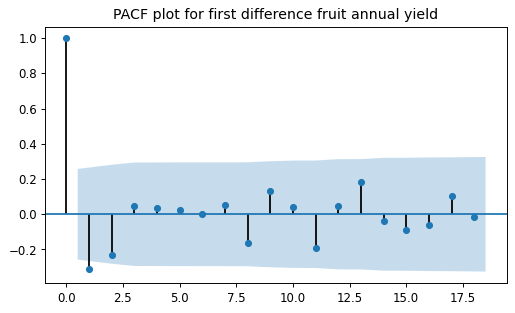

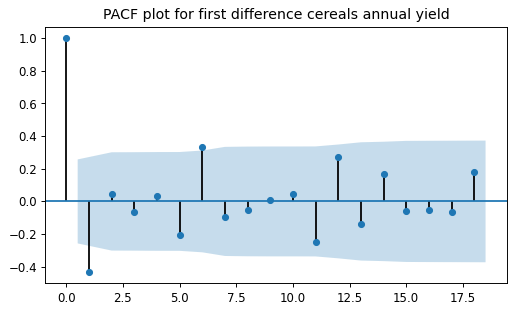

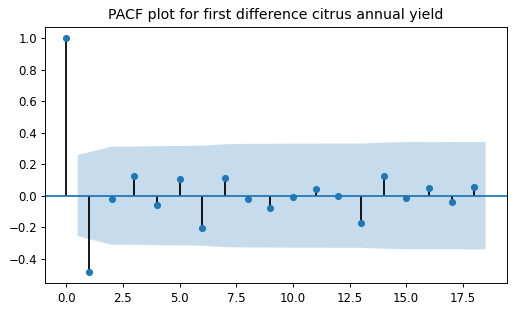

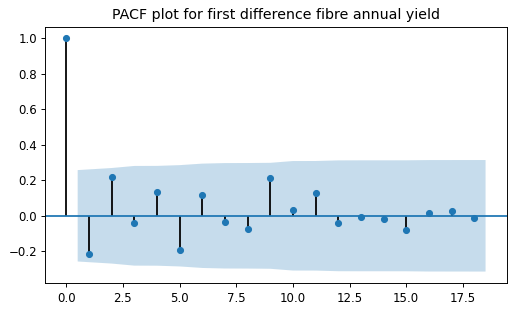

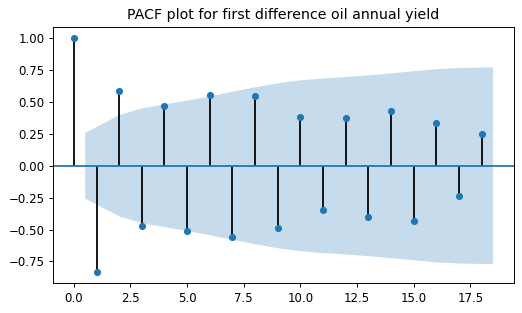

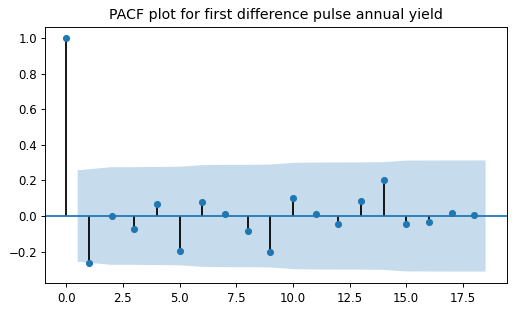

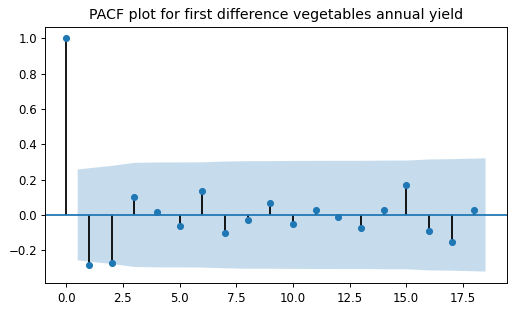

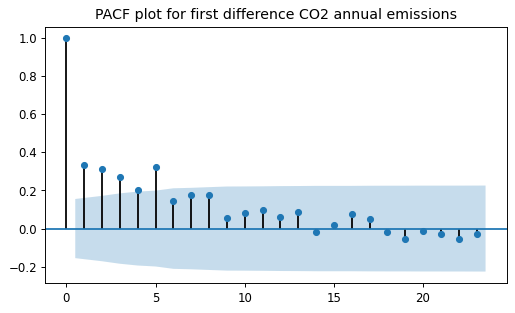

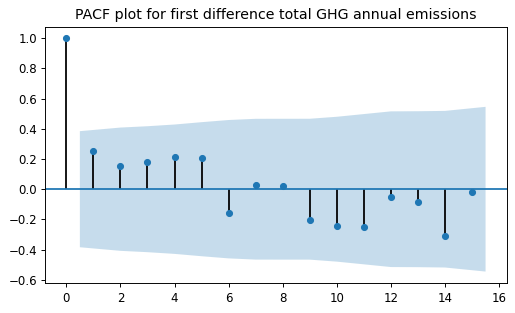

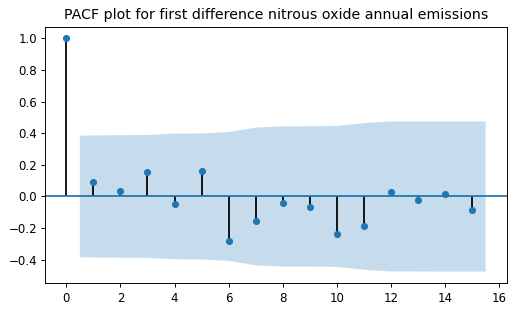

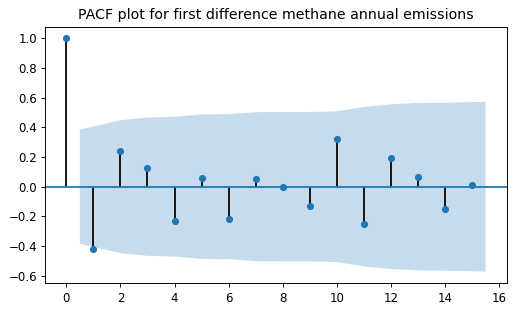

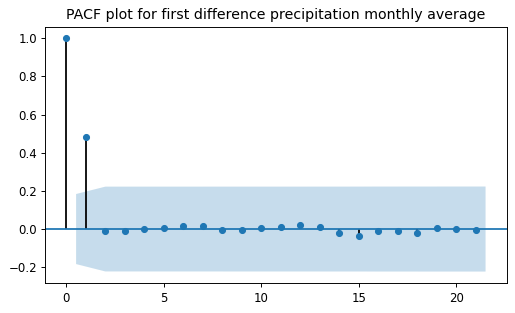

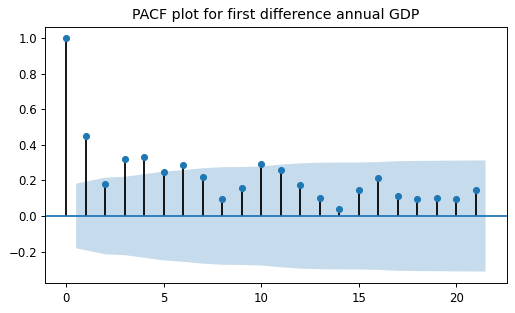

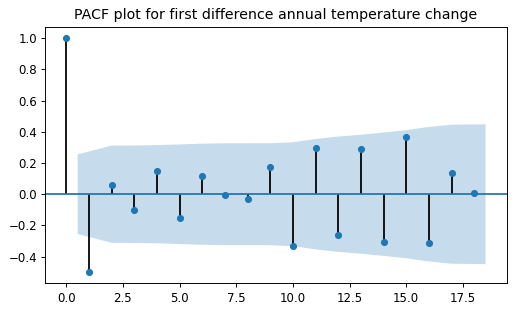

In [16]:
#Autocorrelation plots

from pandas.plotting import autocorrelation_plot
plt.rcParams.update({'figure.figsize':(7,4), 'figure.dpi':85})
plot_acf(diff_fr)
plt.title('PACF plot for first difference fruit annual yield')
plt.show()
plot_acf(diff_cerea)
plt.title('PACF plot for first difference cereals annual yield')
plt.show()
plot_acf(diff_citru)
plt.title('PACF plot for first difference citrus annual yield')
plt.show()
plot_acf(diff_fi)
plt.title('PACF plot for first difference fibre annual yield')
plt.show()
plot_acf(diff_oi)
plt.title('PACF plot for first difference oil annual yield')
plt.show()
plot_acf(diff_pu)
plt.title('PACF plot for first difference pulse annual yield')
plt.show()
plot_acf(diff_ve)
plt.title('PACF plot for first difference vegetables annual yield')
plt.show()
plot_acf(diffco2)
plt.title('PACF plot for first difference CO2 annual emissions')
plt.show()
plot_acf(diffghg)
plt.title('PACF plot for first difference total GHG annual emissions')
plt.show()
plot_acf(diffnitrox)
plt.title('PACF plot for first difference nitrous oxide annual emissions')
plt.show()
plot_acf(diffmethane)
plt.title('PACF plot for first difference methane annual emissions')
plt.show()
plot_acf(diffprep)
plt.title('PACF plot for first difference precipitation monthly average')
plt.show()
plot_acf(diffgdp)
plt.title('PACF plot for first difference annual GDP')
plt.show()
plot_acf(diffmetyear)
plt.title('PACF plot for first difference annual temperature change')
plt.show()


# Engle and Granger 

In [17]:
#fruit_new=np.array(fruit_y.iloc[29:55,'Value'])
cereals_new=np.array(cereals_y.iloc[29:56,11])
#cereals_y.iloc[29:55,11]

In [10]:
#GDP and crops production, from 1961 until 2018
#gdp.loc[7259:]
#fruit_y[:-1]
#gdp=gdp['GDP']
#gdp.loc[7259:]
ghg_new=np.array(ghg['Total GHG emissions including LUCF (CAIT)'])
fruit_new=np.array(fruit_y.iloc[29:56,11])
len(fruit_new)
#len(gdp_new)
cereals_new=np.array(cereals_y.iloc[29:56,11])
new_PI=np.array(PI.iloc[29:56,11])
citrus_new=np.array(citrus_y.iloc[29:56,11])
#crops_new=np.array(crops_primary_y.iloc[:-1,11]) per adesso lo salto perchè ci sono differenti sezioni
fibre_new=np.array(fibre_crops_y.iloc[29:56,11])
oil_new=np.array(oil_crops_y.iloc[29:56,11])
pul_new=np.array(pulses_y.iloc[29:56,11])
veg_new=np.array(veggies_y.iloc[29:56,11])
print('--------------------------------------------------------GHG and fruit---------------------------------------')

eg_testct=engle_granger(ghg_new,fruit_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(ghg_new,fruit_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(ghg_new,fruit_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())


print('-----------------------------------GHG and cereals------------------------------')

eg_testct=engle_granger(ghg_new,cereals_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(ghg_new,cereals_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(ghg_new,cereals_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())



print('-----------------------------------GHG and citrus------------------------------')

eg_testct=engle_granger(ghg_new,citrus_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(ghg_new,citrus_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(ghg_new,citrus_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())

#print('-----------------------------------GDP and crops------------------------------')
#
#eg_testct=engle_granger(gdp_new,crops_new,trend='ct')#a constant and a time trend are included
#eg_testn=engle_granger(gdp_new,crops_new,trend='n')#no constant or trend are included
#eg_testc=engle_granger(gdp_new,crops_new,trend='c')#no constant or trend are included
#print(eg_testct.summary())
#print()
#print(eg_testct.summary())
#print()
#print(eg_testn.summary())
#print()
#print(eg_testc.summary())

print('-----------------------------------GHG and fibre------------------------------')

eg_testct=engle_granger(ghg_new,fibre_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(ghg_new,fibre_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(ghg_new,fibre_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())

print('-----------------------------------GHG and oil------------------------------')

eg_testct=engle_granger(ghg_new,oil_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(ghg_new,oil_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(ghg_new,oil_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())

print('-----------------------------------GHG and pul------------------------------')

eg_testct=engle_granger(ghg_new,pul_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(ghg_new,pul_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(ghg_new,pul_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())

print('-----------------------------------GHG and veggies------------------------------')

eg_testct=engle_granger(ghg_new,veg_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(ghg_new,veg_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(ghg_new,veg_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())

print('-----------------------------------GHG and PI------------------------------')

eg_testct=engle_granger(ghg_new,new_PI,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(ghg_new,new_PI,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(ghg_new,new_PI,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())


--------------------------------------------------------GHG and fruit---------------------------------------
     Engle-Granger Cointegration Test    
Test Statistic                     -1.250
P-value                             0.957
ADF Lag length                          1
Estimated Root ρ (γ+1)              0.897
-----------------------------------------

Trend: Constant
Critical Values: -3.87 (10%), -4.27 (5%), -5.11 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 1

     Engle-Granger Cointegration Test    
Test Statistic                     -1.740
P-value                             0.347
ADF Lag length                          9
Estimated Root ρ (γ+1)              0.615
-----------------------------------------

Trend: Constant
Critical Values: -2.73 (10%), -3.13 (5%), -3.99 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 1

     Engle-Granger Cointegration Test    
Test Statistic 

     Engle-Granger Cointegration Test    
Test Statistic                     -1.389
P-value                             0.939
ADF Lag length                          0
Estimated Root ρ (γ+1)              0.830
-----------------------------------------

Trend: Constant
Critical Values: -3.85 (10%), -4.25 (5%), -5.07 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 1

     Engle-Granger Cointegration Test    
Test Statistic                     -0.681
P-value                             0.812
ADF Lag length                          0
Estimated Root ρ (γ+1)              0.925
-----------------------------------------

Trend: Constant
Critical Values: -2.64 (10%), -3.01 (5%), -3.76 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 1

     Engle-Granger Cointegration Test    
Test Statistic                     -2.886
P-value                             0.140
ADF Lag length                          

In [14]:
gdp.loc[7259:] #so GDP starts also from 1961
gdp_new=gdp['GDP']
gdp_new=np.array(gdp_new.loc[7259:])
fruit_new=np.array(fruit_y.iloc[:-1,11])
gdp_new

array([5.13214666e+11, 5.53275702e+11, 5.92671521e+11, 6.15796787e+11,
       6.29615768e+11, 6.62465724e+11, 7.09741840e+11, 7.68994526e+11,
       8.12977616e+11, 8.31317761e+11, 8.46968256e+11, 8.71751819e+11,
       9.28806489e+11, 9.72368742e+11, 9.51557541e+11, 1.01330191e+12,
       1.04264590e+12, 1.08149795e+12, 1.14285532e+12, 1.18316169e+12,
       1.18886887e+12, 1.19420224e+12, 1.20877010e+12, 1.23984919e+12,
       1.27469367e+12, 1.31089195e+12, 1.35152844e+12, 1.40377003e+12,
       1.44419706e+12, 1.47548526e+12, 1.50872324e+12, 1.53192254e+12,
       1.52954969e+12, 1.57341355e+12, 1.63019816e+12, 1.66279147e+12,
       1.70518595e+12, 1.74489775e+12, 1.78452843e+12, 1.86375050e+12,
       1.91007972e+12, 1.92825989e+12, 1.94474816e+12, 1.98936497e+12,
       2.02236195e+12, 2.07740840e+12, 2.12282261e+12, 2.11528711e+12,
       2.01334499e+12, 2.06169415e+12, 2.08811718e+12, 2.02924473e+12,
       1.99421331e+12, 1.99647867e+12, 2.01211391e+12, 2.02695505e+12,
      

In [15]:
#GDP and crops production, from 1961 until 2018
#gdp.loc[7259:]
#fruit_y[:-1]
#gdp=gdp['GDP']
#gdp.loc[7259:]

#Transform data so that they have the same indices and dimensions
#gdp=gdp['GDP']
#gdp.loc[7259:] #so GDP starts also from 1961
#gdp_new=np.array(gdp.loc[7259:])
#gdp_new
new_PI=np.array(PI.iloc[:-1,11])
fruit_new=np.array(fruit_y.iloc[:-1,11])
len(fruit_new)
len(gdp_new)
cereals_new=np.array(cereals_y.iloc[:-1,11])

citrus_new=np.array(citrus_y.iloc[:-1,11])
#crops_new=np.array(crops_primary_y.iloc[:-1,11]) per adesso lo salto perchè ci sono differenti sezioni
fibre_new=np.array(fibre_crops_y.iloc[:-1,11])
oil_new=np.array(oil_crops_y.iloc[:-1,11])
pul_new=np.array(pulses_y.iloc[:-1,11])
veg_new=np.array(veggies_y.iloc[:-1,11])





print('--------------------------------------------------------GDP and fruit---------------------------------------')

eg_testct=engle_granger(gdp_new,fruit_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(gdp_new,fruit_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(gdp_new,fruit_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())


print('-----------------------------------GDP and cereals------------------------------')

eg_testct=engle_granger(gdp_new,cereals_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(gdp_new,cereals_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(gdp_new,cereals_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())



print('-----------------------------------GDP and citrus------------------------------')

eg_testct=engle_granger(gdp_new,citrus_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(gdp_new,citrus_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(gdp_new,citrus_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())

#print('-----------------------------------GDP and crops------------------------------')
#
#eg_testct=engle_granger(gdp_new,crops_new,trend='ct')#a constant and a time trend are included
#eg_testn=engle_granger(gdp_new,crops_new,trend='n')#no constant or trend are included
#eg_testc=engle_granger(gdp_new,crops_new,trend='c')#no constant or trend are included
#print(eg_testct.summary())
#print()
#print(eg_testct.summary())
#print()
#print(eg_testn.summary())
#print()
#print(eg_testc.summary())

print('-----------------------------------GDP and fibre------------------------------')

eg_testct=engle_granger(gdp_new,fibre_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(gdp_new,fibre_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(gdp_new,fibre_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())

print('-----------------------------------GDP and oil------------------------------')

eg_testct=engle_granger(gdp_new,oil_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(gdp_new,oil_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(gdp_new,oil_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())

print('-----------------------------------GDP and pul------------------------------')

eg_testct=engle_granger(gdp_new,pul_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(gdp_new,pul_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(gdp_new,pul_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())

print('-----------------------------------GDP and veggies------------------------------')

eg_testct=engle_granger(gdp_new,veg_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(gdp_new,veg_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(gdp_new,veg_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())

print('-----------------------------------GDP and PI------------------------------')

eg_testct=engle_granger(gdp_new,new_PI,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(gdp_new,new_PI,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(gdp_new,new_PI,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())



--------------------------------------------------------GDP and fruit---------------------------------------
     Engle-Granger Cointegration Test    
Test Statistic                     -2.773
P-value                             0.376
ADF Lag length                          6
Estimated Root ρ (γ+1)              0.795
-----------------------------------------

Trend: Constant
Critical Values: -3.67 (10%), -4.01 (5%), -4.69 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 1

     Engle-Granger Cointegration Test    
Test Statistic                     -1.083
P-value                             0.671
ADF Lag length                          2
Estimated Root ρ (γ+1)              0.944
-----------------------------------------

Trend: Constant
Critical Values: -2.55 (10%), -2.88 (5%), -3.53 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 1

     Engle-Granger Cointegration Test    
Test Statistic 

In [16]:
methane_new=np.array(methane['Total including LUCF (CH4 emissions, CAIT)'])
nitr_new=np.array(nitr_ox['Total including LUCF (N2O emissions, CAIT)'])
methane_new

array([54610000., 53570000., 53560000., 53030000., 53230000., 52910000.,
       53400000., 53780000., 53350000., 53190000., 53870000., 51950000.,
       52050000., 51510000., 50270000., 50200000., 49200000., 49280000.,
       49370000., 49170000., 49280000., 47120000., 48010000., 45960000.,
       45120000., 45010000., 44740000.])

In [66]:
#Methane and crops production, from 1990 until 2016

#so all crops spans from 1990 until 2016 just as methane
fruit_new=np.array(fruit_y.iloc[29:-3,11])
len(fruit_new)
len(gdp_new)
cereals_new=np.array(cereals_y.iloc[29:-3,11])
new_PI=np.array(PI.iloc[29:-3,11])
citrus_new=np.array(citrus_y.iloc[29:-3,11])
#crops_new=np.array(crops_primary_y.iloc[29:-3,11]) per adesso lo salto perchè ci sono differenti sezioni
fibre_new=np.array(fibre_crops_y.iloc[29:-3,11])
oil_new=np.array(oil_crops_y.iloc[29:-3,11])
pul_new=np.array(pulses_y.iloc[29:-3,11])
veg_new=np.array(veggies_y.iloc[29:-3,11])

print('--------------------------------------------------------Methane and fruit---------------------------------------')

eg_testct=engle_granger(methane_new,fruit_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(methane_new,fruit_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(methane_new,fruit_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())


print('-----------------------------------Methane and cereals------------------------------')

eg_testct=engle_granger(methane_new,cereals_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(methane_new,cereals_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(methane_new,cereals_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())



print('-----------------------------------Methane and citrus------------------------------')

eg_testct=engle_granger(methane_new,citrus_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(methane_new,citrus_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(methane_new,citrus_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())

#print('-----------------------------------GDP and crops------------------------------')
#
#eg_testct=engle_granger(gdp_new,crops_new,trend='ct')#a constant and a time trend are included
#eg_testn=engle_granger(gdp_new,crops_new,trend='n')#no constant or trend are included
#eg_testc=engle_granger(gdp_new,crops_new,trend='c')#no constant or trend are included
#print(eg_testct.summary())
#print()
#print(eg_testct.summary())
#print()
#print(eg_testn.summary())
#print()
#print(eg_testc.summary())

print('-----------------------------------Methane and fibre------------------------------')

eg_testct=engle_granger(methane_new,fibre_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(methane_new,fibre_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(methane_new,fibre_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())

print('-----------------------------------Methane and oil------------------------------')

eg_testct=engle_granger(methane_new,oil_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(methane_new,oil_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(methane_new,oil_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())

print('-----------------------------------Methane and pul------------------------------')

eg_testct=engle_granger(methane_new,pul_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(methane_new,pul_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(methane_new,pul_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())

print('-----------------------------------Methane and veggies------------------------------')

eg_testct=engle_granger(methane_new,veg_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(methane_new,veg_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(methane_new,veg_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())

print('-----------------------------------Methane and PI------------------------------')

eg_testct=engle_granger(methane_new,new_PI,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(methane_new,new_PI,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(methane_new,new_PI,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())



--------------------------------------------------------Methane and fruit---------------------------------------
     Engle-Granger Cointegration Test    
Test Statistic                     -2.416
P-value                             0.569
ADF Lag length                          0
Estimated Root ρ (γ+1)              0.634
-----------------------------------------

Trend: Constant
Critical Values: -3.85 (10%), -4.25 (5%), -5.07 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 1

     Engle-Granger Cointegration Test    
Test Statistic                     -2.416
P-value                             0.569
ADF Lag length                          0
Estimated Root ρ (γ+1)              0.634
-----------------------------------------

Trend: Constant
Critical Values: -3.85 (10%), -4.25 (5%), -5.07 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 1

     Engle-Granger Cointegration Test    
Test Statis

     Engle-Granger Cointegration Test    
Test Statistic                     -1.407
P-value                             0.936
ADF Lag length                          1
Estimated Root ρ (γ+1)              0.762
-----------------------------------------

Trend: Constant
Critical Values: -3.87 (10%), -4.27 (5%), -5.11 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 1

     Engle-Granger Cointegration Test    
Test Statistic                     -1.407
P-value                             0.936
ADF Lag length                          1
Estimated Root ρ (γ+1)              0.762
-----------------------------------------

Trend: Constant
Critical Values: -3.87 (10%), -4.27 (5%), -5.11 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 1

     Engle-Granger Cointegration Test    
Test Statistic                     -1.810
P-value                             0.315
ADF Lag length                          

In [67]:
#N20 and crops production, from 1990 until 2016

print('--------------------------------------------------------N20 and fruit---------------------------------------')

eg_testct=engle_granger(nitr_new,fruit_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(nitr_new,fruit_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(nitr_new,fruit_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())


print('-----------------------------------N20 and cereals------------------------------')

eg_testct=engle_granger(nitr_new,cereals_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(nitr_new,cereals_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(nitr_new,cereals_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())



print('-----------------------------------N20 and citrus------------------------------')

eg_testct=engle_granger(nitr_new,citrus_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(nitr_new,citrus_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(nitr_new,citrus_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())

#print('-----------------------------------GDP and crops------------------------------')
#
#eg_testct=engle_granger(gdp_new,crops_new,trend='ct')#a constant and a time trend are included
#eg_testn=engle_granger(gdp_new,crops_new,trend='n')#no constant or trend are included
#eg_testc=engle_granger(gdp_new,crops_new,trend='c')#no constant or trend are included
#print(eg_testct.summary())
#print()
#print(eg_testct.summary())
#print()
#print(eg_testn.summary())
#print()
#print(eg_testc.summary())

print('-----------------------------------N20 and fibre------------------------------')

eg_testct=engle_granger(nitr_new,fibre_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(nitr_new,fibre_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(nitr_new,fibre_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())

print('-----------------------------------N20 and oil------------------------------')

eg_testct=engle_granger(nitr_new,oil_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(nitr_new,oil_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(nitr_new,oil_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())

print('-----------------------------------N20 and pul------------------------------')

eg_testct=engle_granger(nitr_new,pul_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(nitr_new,pul_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(nitr_new,pul_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())

print('-----------------------------------N20 and veggies------------------------------')

eg_testct=engle_granger(nitr_new,veg_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(nitr_new,veg_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(nitr_new,veg_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())

print('-----------------------------------N20 and PI------------------------------')

eg_testct=engle_granger(nitr_new,new_PI,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(nitr_new,new_PI,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(nitr_new,new_PI,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())



--------------------------------------------------------N20 and fruit---------------------------------------
     Engle-Granger Cointegration Test    
Test Statistic                     -1.657
P-value                             0.884
ADF Lag length                          0
Estimated Root ρ (γ+1)              0.834
-----------------------------------------

Trend: Constant
Critical Values: -3.85 (10%), -4.25 (5%), -5.07 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 1

     Engle-Granger Cointegration Test    
Test Statistic                     -1.657
P-value                             0.884
ADF Lag length                          0
Estimated Root ρ (γ+1)              0.834
-----------------------------------------

Trend: Constant
Critical Values: -3.85 (10%), -4.25 (5%), -5.07 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 1

     Engle-Granger Cointegration Test    
Test Statistic 

Distribution Order: 1

     Engle-Granger Cointegration Test    
Test Statistic                     -1.947
P-value                             0.791
ADF Lag length                          0
Estimated Root ρ (γ+1)              0.787
-----------------------------------------

Trend: Constant
Critical Values: -3.85 (10%), -4.25 (5%), -5.07 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 1

     Engle-Granger Cointegration Test    
Test Statistic                     -0.906
P-value                             0.736
ADF Lag length                          0
Estimated Root ρ (γ+1)              0.946
-----------------------------------------

Trend: Constant
Critical Values: -2.64 (10%), -3.01 (5%), -3.76 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 1

     Engle-Granger Cointegration Test    
Test Statistic                     -2.565
P-value                             0.251
ADF Lag length   

In [68]:
#CO2 starts from much earlier in time than methane and nitrous oxide
co22=co2.loc[10939:] #so it starts from 1961 until 2019
co2_new=np.array(co22['Annual CO2 emissions'])
fruit_new=np.array(fruit_y['Value'])
cereals_new=np.array(cereals_y['Value'])
citrus_new=np.array(citrus_y['Value'])
#crops_new=np.array(crops_primary_y.iloc[29:-3,11]) per adesso lo salto perchè ci sono differenti sezioni
fibre_new=np.array(fibre_crops_y['Value'])
oil_new=np.array(oil_crops_y['Value'])
pul_new=np.array(pulses_y['Value'])
veg_new=np.array(veggies_y['Value'])
new_PI=np.array(PI['Value'])

#CO2 and crops production, from 1961 until 2019


print('--------------------------------------------------------CO2 and fruit---------------------------------------')

eg_testct=engle_granger(co2_new,fruit_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(co2_new,fruit_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(co2_new,fruit_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())


print('-----------------------------------CO2 and cereals------------------------------')

eg_testct=engle_granger(co2_new,cereals_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(co2_new,cereals_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(co2_new,cereals_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())



print('-----------------------------------CO2 and citrus------------------------------')

eg_testct=engle_granger(co2_new,citrus_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(co2_new,citrus_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(co2_new,citrus_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())

#print('-----------------------------------GDP and crops------------------------------')
#
#eg_testct=engle_granger(gdp_new,crops_new,trend='ct')#a constant and a time trend are included
#eg_testn=engle_granger(gdp_new,crops_new,trend='n')#no constant or trend are included
#eg_testc=engle_granger(gdp_new,crops_new,trend='c')#no constant or trend are included
#print(eg_testct.summary())
#print()
#print(eg_testct.summary())
#print()
#print(eg_testn.summary())
#print()
#print(eg_testc.summary())

print('-----------------------------------CO2 and fibre------------------------------')

eg_testct=engle_granger(co2_new,fibre_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(co2_new,fibre_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(co2_new,fibre_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())

print('-----------------------------------CO2 and oil------------------------------')

eg_testct=engle_granger(co2_new,oil_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(co2_new,oil_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(co2_new,oil_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())

print('-----------------------------------CO2 and pul------------------------------')

eg_testct=engle_granger(co2_new,pul_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(co2_new,pul_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(co2_new,pul_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())

print('-----------------------------------CO2 and veggies------------------------------')

eg_testct=engle_granger(co2_new,veg_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(co2_new,veg_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(co2_new,veg_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())

print('-----------------------------------CO2 and PI------------------------------')

eg_testct=engle_granger(co2_new,new_PI,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(co2_new,new_PI,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(co2_new,new_PI,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())



--------------------------------------------------------CO2 and fruit---------------------------------------
     Engle-Granger Cointegration Test    
Test Statistic                     -1.077
P-value                             0.973
ADF Lag length                          0
Estimated Root ρ (γ+1)              0.947
-----------------------------------------

Trend: Constant
Critical Values: -3.65 (10%), -3.98 (5%), -4.64 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 1

     Engle-Granger Cointegration Test    
Test Statistic                     -1.077
P-value                             0.973
ADF Lag length                          0
Estimated Root ρ (γ+1)              0.947
-----------------------------------------

Trend: Constant
Critical Values: -3.65 (10%), -3.98 (5%), -4.64 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 1

     Engle-Granger Cointegration Test    
Test Statistic 

Distribution Order: 1

     Engle-Granger Cointegration Test    
Test Statistic                     -1.600
P-value                             0.898
ADF Lag length                          1
Estimated Root ρ (γ+1)              0.875
-----------------------------------------

Trend: Constant
Critical Values: -3.66 (10%), -3.99 (5%), -4.65 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 1

     Engle-Granger Cointegration Test    
Test Statistic                     -3.323
P-value                             0.011
ADF Lag length                          1
Estimated Root ρ (γ+1)              0.494
-----------------------------------------

Trend: Constant
Critical Values: -2.55 (10%), -2.88 (5%), -3.53 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 1

     Engle-Granger Cointegration Test    
Test Statistic                     -2.953
P-value                             0.122
ADF Lag length   

In [10]:
met_new=metyear[:-1] # so that it starts in 1961 and it ends in 2019
met_new=np.array(met_new['Value'])

#Metereological year temperature change and crops, from 1961 until 2019
fruit_new=np.array(fruit_y['Value'])
cereals_new=np.array(cereals_y['Value'])
citrus_new=np.array(citrus_y['Value'])
#crops_new=np.array(crops_primary_y.iloc[29:-3,11]) per adesso lo salto perchè ci sono differenti sezioni
fibre_new=np.array(fibre_crops_y['Value'])
oil_new=np.array(oil_crops_y['Value'])
pul_new=np.array(pulses_y['Value'])
veg_new=np.array(veggies_y['Value'])


#Metyear and crops production, from 1961 until 2019


print('--------------------------------------------------------Temp. change and fruit---------------------------------------')

eg_testct=engle_granger(met_new,fruit_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(met_new,fruit_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(met_new,fruit_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())


print('-----------------------------------Temp. change and cereals------------------------------')

eg_testct=engle_granger(met_new,cereals_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(met_new,cereals_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(met_new,cereals_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())



print('-----------------------------------Temp. change and citrus------------------------------')

eg_testct=engle_granger(met_new,citrus_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(met_new,citrus_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(met_new,citrus_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())

#print('-----------------------------------GDP and crops------------------------------')
#
#eg_testct=engle_granger(gdp_new,crops_new,trend='ct')#a constant and a time trend are included
#eg_testn=engle_granger(gdp_new,crops_new,trend='n')#no constant or trend are included
#eg_testc=engle_granger(gdp_new,crops_new,trend='c')#no constant or trend are included
#print(eg_testct.summary())
#print()
#print(eg_testct.summary())
#print()
#print(eg_testn.summary())
#print()
#print(eg_testc.summary())

print('-----------------------------------Temp.change and fibre------------------------------')

eg_testct=engle_granger(met_new,fibre_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(met_new,fibre_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(met_new,fibre_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())

print('-----------------------------------Temp. change and oil------------------------------')

eg_testct=engle_granger(met_new,oil_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(met_new,oil_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(met_new,oil_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())

print('-----------------------------------Temp. change and pul------------------------------')

eg_testct=engle_granger(met_new,pul_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(met_new,pul_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(met_new,pul_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())

print('-----------------------------------Temp. change and veggies------------------------------')

eg_testct=engle_granger(met_new,veg_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(met_new,veg_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(met_new,veg_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())

print('--------------------------------------------------------Temp. change and PI---------------------------------------')

eg_testct=engle_granger(met_new,PI['Value'],trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(met_new,PI['Value'],trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(met_new,PI['Value'],trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())

--------------------------------------------------------Temp. change and fruit---------------------------------------
     Engle-Granger Cointegration Test    
Test Statistic                     -8.079
P-value                             0.000
ADF Lag length                          0
Estimated Root ρ (γ+1)             -0.014
-----------------------------------------

Trend: Constant
Critical Values: -3.65 (10%), -3.98 (5%), -4.64 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 1

     Engle-Granger Cointegration Test    
Test Statistic                     -8.079
P-value                             0.000
ADF Lag length                          0
Estimated Root ρ (γ+1)             -0.014
-----------------------------------------

Trend: Constant
Critical Values: -3.65 (10%), -3.98 (5%), -4.64 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 1

     Engle-Granger Cointegration Test    
Test S

In [91]:
fruit_y.loc[:53]

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QC,Crops,106,Italy,5419,Yield,1738,Fruit Primary,1961,1961,hg/ha,70221,Fc,Calculated data
1,QC,Crops,106,Italy,5419,Yield,1738,Fruit Primary,1962,1962,hg/ha,80009,Fc,Calculated data
2,QC,Crops,106,Italy,5419,Yield,1738,Fruit Primary,1963,1963,hg/ha,75440,Fc,Calculated data
3,QC,Crops,106,Italy,5419,Yield,1738,Fruit Primary,1964,1964,hg/ha,85752,Fc,Calculated data
4,QC,Crops,106,Italy,5419,Yield,1738,Fruit Primary,1965,1965,hg/ha,88708,Fc,Calculated data
5,QC,Crops,106,Italy,5419,Yield,1738,Fruit Primary,1966,1966,hg/ha,92285,Fc,Calculated data
6,QC,Crops,106,Italy,5419,Yield,1738,Fruit Primary,1967,1967,hg/ha,98493,Fc,Calculated data
7,QC,Crops,106,Italy,5419,Yield,1738,Fruit Primary,1968,1968,hg/ha,99591,Fc,Calculated data
8,QC,Crops,106,Italy,5419,Yield,1738,Fruit Primary,1969,1969,hg/ha,106624,Fc,Calculated data
9,QC,Crops,106,Italy,5419,Yield,1738,Fruit Primary,1970,1970,hg/ha,106951,Fc,Calculated data


In [12]:
#from 1961 until 2014

prep_new=precipitation.loc[291:344] #so it starts from 1961 and it ends in 2014
prep_new=np.array(prep_new['Average monthly precipitation'])
#so that they all end in 2014
fruit_new=fruit_y.loc[:53]
fruit_new=np.array(fruit_new['Value'])
cereals_new=cereals_y.loc[:53]
cereals_new=np.array(cereals_new['Value'])
citrus_new=citrus_y.loc[:53]
citrus_new=np.array(citrus_new['Value'])
#crops_new=np.array(crops_primary_y.iloc[29:-3,11]) per adesso lo salto perchè ci sono differenti sezioni
fibre_new=fibre_crops_y.loc[:53]
fibre_new=np.array(fibre_new['Value'])
oil_new=oil_crops_y.loc[:53]
oil_new=np.array(oil_new['Value'])
pul_new=pulses_y.loc[:53]
pul_new=np.array(pul_new['Value'])
veg_new=veggies_y.loc[:53]
veg_new=np.array(veg_new['Value'])
PI_new=PI.loc[:53]
PI_new=np.array(PI_new['Value'])
#Precipitations and crops production, from 1961 until 2014


print('--------------------------------------------------------Precipitations and fruit---------------------------------------')

eg_testct=engle_granger(prep_new,fruit_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(prep_new,fruit_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(prep_new,fruit_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())


print('-----------------------------------Precipitations and cereals------------------------------')

eg_testct=engle_granger(prep_new,cereals_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(prep_new,cereals_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(prep_new,cereals_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())



print('-----------------------------------Precipitations and citrus------------------------------')

eg_testct=engle_granger(prep_new,citrus_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(prep_new,citrus_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(prep_new,citrus_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())

#print('-----------------------------------GDP and crops------------------------------')
#
#eg_testct=engle_granger(gdp_new,crops_new,trend='ct')#a constant and a time trend are included
#eg_testn=engle_granger(gdp_new,crops_new,trend='n')#no constant or trend are included
#eg_testc=engle_granger(gdp_new,crops_new,trend='c')#no constant or trend are included
#print(eg_testct.summary())
#print()
#print(eg_testct.summary())
#print()
#print(eg_testn.summary())
#print()
#print(eg_testc.summary())

print('-----------------------------------Precipitations and fibre------------------------------')

eg_testct=engle_granger(prep_new,fibre_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(prep_new,fibre_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(prep_new,fibre_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())

print('-----------------------------------Precipitations and oil------------------------------')

eg_testct=engle_granger(prep_new,oil_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(prep_new,oil_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(prep_new,oil_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())

print('-----------------------------------Precipitations and pul------------------------------')

eg_testct=engle_granger(prep_new,pul_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(prep_new,pul_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(prep_new,pul_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())

print('-----------------------------------Precipitations and veggies------------------------------')

eg_testct=engle_granger(prep_new,veg_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(prep_new,veg_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(prep_new,veg_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())

print('-----------------------------------Precipitations and PI------------------------------')

eg_testct=engle_granger(prep_new,PI_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(prep_new,PI_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(prep_new,PI_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())


--------------------------------------------------------Precipitations and fruit---------------------------------------
     Engle-Granger Cointegration Test    
Test Statistic                     -9.136
P-value                             0.000
ADF Lag length                          0
Estimated Root ρ (γ+1)             -0.200
-----------------------------------------

Trend: Constant
Critical Values: -3.67 (10%), -4.00 (5%), -4.68 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 1

     Engle-Granger Cointegration Test    
Test Statistic                     -9.136
P-value                             0.000
ADF Lag length                          0
Estimated Root ρ (γ+1)             -0.200
-----------------------------------------

Trend: Constant
Critical Values: -3.67 (10%), -4.00 (5%), -4.68 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 1

     Engle-Granger Cointegration Test    
Test

Distribution Order: 1

     Engle-Granger Cointegration Test    
Test Statistic                     -2.120
P-value                             0.193
ADF Lag length                          3
Estimated Root ρ (γ+1)              0.603
-----------------------------------------

Trend: Constant
Critical Values: -2.56 (10%), -2.89 (5%), -3.55 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 1

     Engle-Granger Cointegration Test    
Test Statistic                     -8.695
P-value                             0.000
ADF Lag length                          0
Estimated Root ρ (γ+1)             -0.152
-----------------------------------------

Trend: Constant
Critical Values: -3.16 (10%), -3.49 (5%), -4.15 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 1
-----------------------------------Precipitations and pul------------------------------
     Engle-Granger Cointegration Test    
Test Statistic

In [ ]:
#From the results obtained, it looks like only the climate variables are cointegrated together with the fruit production

In [115]:
prep_new=precipitation.loc[320:344]
prep_new=np.array(prep_new['Average monthly precipitation'])
meth=methane.loc[2268:2292]
meth=meth['Total including LUCF (CH4 emissions, CAIT)']
meth=np.array(meth) #methane from 1990 until 2014

co2_new=co2.loc[10968:10992]
co2_new=co2_new['Annual CO2 emissions']
co2_new=np.array(co2_new) #co2 from 1990 until 2014
#nitr_ox=nitr_ox.loc[:-2]
#nitr_ox=nitr_ox['Total including LUCF (N2O emissions, CAIT)']
#nitr_ox=np.array(nitr_ox)
ghg = pd.read_csv('GHG log.csv')
ghg=pd.DataFrame(ghg)
ghg=ghg.loc[2268:2292]
#ghg
#ghg['Total GHG emissions including LUCF (CAIT)']
ghg_new=ghg.loc[2268:2292]
ghg_new=ghg_new['Total GHG emissions including LUCF (CAIT)']
ghg_new=np.array(ghg_new) #all GHG from 1990 until 2014

nitr_ox = pd.read_csv('nitrous oxide.csv')
nitr_ox=pd.DataFrame(nitr_ox)
nitr_ox=nitr_ox.loc[2268:2292]
nitr_ox=nitr_ox['Total including LUCF (N2O emissions, CAIT)']
nitr_ox=np.array(nitr_ox) #N20 from 1990 until 2014


In [114]:
#GHG and precipitation
print('--------------------------------------------------------Methane and precipitation---------------------------------------')

eg_testct=engle_granger(meth,prep_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(meth,prep_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(meth,prep_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())


print('-----------------------------------CO2 and precipitation------------------------------')

eg_testct=engle_granger(co2_new,prep_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(co2_new,prep_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(co2_new,prep_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())



print('-----------------------------------GHG and precipitation------------------------------')

eg_testct=engle_granger(ghg_new,prep_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(ghg_new,prep_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(ghg_new,prep_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())


print('-----------------------------------N20 and precipitation------------------------------')

eg_testct=engle_granger(nitr_ox,prep_new,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(nitr_ox,prep_new,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(nitr_ox,prep_new,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())


--------------------------------------------------------Methane and precipitation---------------------------------------
     Engle-Granger Cointegration Test    
Test Statistic                     -1.921
P-value                             0.801
ADF Lag length                          0
Estimated Root ρ (γ+1)              0.649
-----------------------------------------

Trend: Constant
Critical Values: -3.88 (10%), -4.29 (5%), -5.14 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 1

     Engle-Granger Cointegration Test    
Test Statistic                     -1.921
P-value                             0.801
ADF Lag length                          0
Estimated Root ρ (γ+1)              0.649
-----------------------------------------

Trend: Constant
Critical Values: -3.88 (10%), -4.29 (5%), -5.14 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 1

     Engle-Granger Cointegration Test    
Tes

In [20]:
metyear=pd.read_csv('FAOSTAT_data_10-17-2021.csv')
met=metyear.loc[29:55]
met=np.array(met['Value'])
met

array([1.14 , 0.039, 0.546, 0.533, 1.528, 0.436, 0.252, 0.943, 0.966,
       0.92 , 1.254, 1.553, 0.938, 1.54 , 0.769, 0.587, 0.865, 1.576,
       1.149, 1.24 , 0.745, 1.242, 1.54 , 1.009, 1.642, 1.74 , 1.739])

In [38]:
#GHG and precipitation
print('--------------------------------------------------------Methane and temperature change---------------------------------------')

eg_testct=engle_granger(meth,met,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(meth,met,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(meth,met,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())


print('--------------------------------------------CO2 and temperature change-----------------------------------------------')

eg_testct=engle_granger(co2_new,met,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(co2_new,met,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(co2_new,met,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())



print('-----------------------------------GHG and temperature change------------------------------')

eg_testct=engle_granger(ghg_new,met,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(ghg_new,met,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(ghg_new,met,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())

print('-----------------------------------N20 and temperature change------------------------------')

eg_testct=engle_granger(nitr_ox,met,trend='ct', method='aic')#a constant and a time trend are included
eg_testn=engle_granger(nitr_ox,met,trend='n', method='aic')#no constant or trend are included
eg_testc=engle_granger(nitr_ox,met,trend='c', method='aic')#no constant or trend are included
print(eg_testct.summary())
print()
print(eg_testn.summary())
print()
print(eg_testc.summary())


--------------------------------------------------------Methane and temperature change---------------------------------------
     Engle-Granger Cointegration Test    
Test Statistic                     -2.092
P-value                             0.731
ADF Lag length                          0
Estimated Root ρ (γ+1)              0.690
-----------------------------------------

Trend: Constant
Critical Values: -3.85 (10%), -4.25 (5%), -5.07 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 1

     Engle-Granger Cointegration Test    
Test Statistic                     -2.716
P-value                             0.056
ADF Lag length                          0
Estimated Root ρ (γ+1)              0.524
-----------------------------------------

Trend: Constant
Critical Values: -2.64 (10%), -3.01 (5%), -3.76 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 1

     Engle-Granger Cointegration Test   

# Phillips Ouliaris

In [11]:
ghg_new=np.array(ghg['Total GHG emissions including LUCF (CAIT)'])
fruit_new=np.array(fruit_y.iloc[29:56,11])
len(fruit_new)
#len(gdp_new)
cereals_new=np.array(cereals_y.iloc[29:56,11])
new_PI=np.array(PI.iloc[29:56,11])
citrus_new=np.array(citrus_y.iloc[29:56,11])
#crops_new=np.array(crops_primary_y.iloc[:-1,11]) per adesso lo salto perchè ci sono differenti sezioni
fibre_new=np.array(fibre_crops_y.iloc[29:56,11])
oil_new=np.array(oil_crops_y.iloc[29:56,11])
pul_new=np.array(pulses_y.iloc[29:56,11])
veg_new=np.array(veggies_y.iloc[29:56,11])


In [12]:
#GDP and crops production, from 1961 until 2018
#gdp.loc[7259:]
#fruit_y[:-1]
#gdp=gdp['GDP']
#gdp.loc[7259:]
ghg_new=np.array(ghg['Total GHG emissions including LUCF (CAIT)'])
fruit_new=np.array(fruit_y.iloc[29:56,11])
len(fruit_new)
#len(gdp_new)
cereals_new=np.array(cereals_y.iloc[29:56,11])
new_PI=np.array(PI.iloc[29:56,11])
citrus_new=np.array(citrus_y.iloc[29:56,11])
#crops_new=np.array(crops_primary_y.iloc[:-1,11]) per adesso lo salto perchè ci sono differenti sezioni
fibre_new=np.array(fibre_crops_y.iloc[29:56,11])
oil_new=np.array(oil_crops_y.iloc[29:56,11])
pul_new=np.array(pulses_y.iloc[29:56,11])
veg_new=np.array(veggies_y.iloc[29:56,11])
print('--------------------------------------------------------GHG and fruit---------------------------------------')

po_zt_test = phillips_ouliaris(ghg_new,fruit_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(ghg_new,fruit_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(ghg_new,fruit_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(ghg_new,fruit_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(ghg_new,fruit_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(ghg_new,fruit_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()



print('-----------------------------------GHG and cereals------------------------------')

po_zt_test = phillips_ouliaris(ghg_new,cereals_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(ghg_new,cereals_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(ghg_new,cereals_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(ghg_new,cereals_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(ghg_new,cereals_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(ghg_new,cereals_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()




print('-----------------------------------GHG and citrus------------------------------')

po_zt_test = phillips_ouliaris(ghg_new,citrus_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(ghg_new,citrus_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(ghg_new,citrus_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(ghg_new,citrus_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(ghg_new,citrus_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(ghg_new,citrus_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()


#print('-----------------------------------GDP and crops------------------------------')
#
#eg_testct=engle_granger(gdp_new,crops_new,trend='ct')#a constant and a time trend are included
#eg_testn=engle_granger(gdp_new,crops_new,trend='n')#no constant or trend are included
#eg_testc=engle_granger(gdp_new,crops_new,trend='c')#no constant or trend are included
#print(eg_testct.summary())
#print()
#print(eg_testct.summary())
#print()
#print(eg_testn.summary())
#print()
#print(eg_testc.summary())

print('-----------------------------------GHG and fibre------------------------------')

po_zt_test = phillips_ouliaris(ghg_new,fibre_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(ghg_new,fibre_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(ghg_new,fibre_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(ghg_new,fibre_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(ghg_new,fibre_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(ghg_new,fibre_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()


print('-----------------------------------GHG and oil------------------------------')

po_zt_test = phillips_ouliaris(ghg_new,oil_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(ghg_new,oil_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(ghg_new,oil_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(ghg_new,oil_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(ghg_new,oil_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(ghg_new,oil_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()


print('-----------------------------------GHG and pul------------------------------')

po_zt_test = phillips_ouliaris(ghg_new,pul_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(ghg_new,pul_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(ghg_new,pul_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(ghg_new,pul_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(ghg_new,pul_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(ghg_new,pul_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()


print('-----------------------------------GHG and veggies------------------------------')

po_zt_test = phillips_ouliaris(ghg_new,veg_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(ghg_new,veg_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(ghg_new,veg_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(ghg_new,veg_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(ghg_new,veg_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(ghg_new,veg_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()

print('-----------------------------------GHG and PI------------------------------')

po_zt_test = phillips_ouliaris(ghg_new,new_PI, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(ghg_new,new_PI, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(ghg_new,new_PI, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(ghg_new,new_PI, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(ghg_new,new_PI, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(ghg_new,new_PI, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()



--------------------------------------------------------GHG and fruit---------------------------------------
Phillips-Ouliaris zt Cointegration Test
Test Statistic                 -1.224
P-value                         0.966
Kernel                       Bartlett
Bandwidth                       3.419
-------------------------------------

Trend: Constant
Critical Values: -3.92 (10%), -4.32 (5%), -5.16 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 4

Phillips-Ouliaris za Cointegration Test
Test Statistic                 -3.381
P-value                         0.836
Kernel                       Bartlett
Bandwidth                       3.419
-------------------------------------

Trend: Constant
Critical Values: -19.10 (10%), -21.60 (5%), -26.23 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 4

Phillips-Ouliaris zt Cointegration Test
Test Statistic                 -1.224
P-value             

Phillips-Ouliaris zt Cointegration Test
Test Statistic                 -2.871
P-value                         0.323
Kernel                       Bartlett
Bandwidth                       2.009
-------------------------------------

Trend: Constant
Critical Values: -3.92 (10%), -4.32 (5%), -5.16 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 4

Phillips-Ouliaris za Cointegration Test
Test Statistic                -13.441
P-value                         0.402
Kernel                       Bartlett
Bandwidth                       2.009
-------------------------------------

Trend: Constant
Critical Values: -19.10 (10%), -21.60 (5%), -26.23 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 4

Phillips-Ouliaris zt Cointegration Test
Test Statistic                 -2.871
P-value                         0.323
Kernel                       Bartlett
Bandwidth                       2.009
---------------

In [72]:
print('--------------------------------------------------------GHG and fruit---------------------------------------')

po_zt_test = phillips_ouliaris(ghg_new,fruit_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(ghg_new,fruit_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(ghg_new,fruit_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(ghg_new,fruit_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(ghg_new,fruit_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(ghg_new,fruit_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()




--------------------------------------------------------GHG and fruit---------------------------------------
Phillips-Ouliaris zt Cointegration Test
Test Statistic                 -1.224
P-value                         0.966
Kernel                       Bartlett
Bandwidth                       3.419
-------------------------------------

Trend: Constant
Critical Values: -3.92 (10%), -4.32 (5%), -5.16 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 4

Phillips-Ouliaris za Cointegration Test
Test Statistic                 -3.381
P-value                         0.836
Kernel                       Bartlett
Bandwidth                       3.419
-------------------------------------

Trend: Constant
Critical Values: -19.10 (10%), -21.60 (5%), -26.23 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 4

Phillips-Ouliaris zt Cointegration Test
Test Statistic                 -1.224
P-value             

In [78]:
#GDP and crops production, from 1961 until 2018
gdp=(pd.read_csv('gdp-world-regions-stacked-area.csv'))
gdp=pd.DataFrame(gdp)
gdp=gdp.loc[7200:7316]


#Transform data so that they have the same indices and dimensions
#gdp=gdp['GDP']
gdp=gdp['GDP']
#gdp.loc[7259:] #so GDP starts also from 1961
gdp_new=np.array(gdp.loc[7259:])
#gdp_new
new_PI=np.array(PI.iloc[:-1,11])
fruit_new=np.array(fruit_y.iloc[:-1,11])
len(fruit_new)
len(gdp_new)
cereals_new=np.array(cereals_y.iloc[:-1,11])

citrus_new=np.array(citrus_y.iloc[:-1,11])
#crops_new=np.array(crops_primary_y.iloc[:-1,11]) per adesso lo salto perchè ci sono differenti sezioni
fibre_new=np.array(fibre_crops_y.iloc[:-1,11])
oil_new=np.array(oil_crops_y.iloc[:-1,11])
pul_new=np.array(pulses_y.iloc[:-1,11])
veg_new=np.array(veggies_y.iloc[:-1,11])





print('--------------------------------------------------------GDP and fruit---------------------------------------')
po_zt_test = phillips_ouliaris(gdp_new,fruit_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(gdp_new,fruit_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(gdp_new,fruit_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(gdp_new,fruit_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(gdp_new,fruit_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(gdp_new,fruit_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()





print('-----------------------------------GDP and cereals------------------------------')

po_zt_test = phillips_ouliaris(gdp_new,cereals_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(gdp_new,cereals_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(gdp_new,cereals_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(gdp_new,cereals_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(gdp_new,cereals_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(gdp_new,cereals_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()



print('-----------------------------------GDP and citrus------------------------------')


po_zt_test = phillips_ouliaris(gdp_new,citrus_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(gdp_new,citrus_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(gdp_new,citrus_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(gdp_new,citrus_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(gdp_new,citrus_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(gdp_new,citrus_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
#print('-----------------------------------GDP and crops------------------------------')
#
#eg_testct=engle_granger(gdp_new,crops_new,trend='ct')#a constant and a time trend are included
#eg_testn=engle_granger(gdp_new,crops_new,trend='n')#no constant or trend are included
#eg_testc=engle_granger(gdp_new,crops_new,trend='c')#no constant or trend are included
#print(eg_testct.summary())
#print()
#print(eg_testct.summary())
#print()
#print(eg_testn.summary())
#print()
#print(eg_testc.summary())

print('-----------------------------------GDP and fibre------------------------------')

po_zt_test = phillips_ouliaris(gdp_new,fibre_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(gdp_new,fibre_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(gdp_new,fibre_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(gdp_new,fibre_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(gdp_new,fibre_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(gdp_new,fibre_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()

print('-----------------------------------GDP and oil------------------------------')

po_zt_test = phillips_ouliaris(gdp_new,oil_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(gdp_new,oil_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(gdp_new,oil_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(gdp_new,oil_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(gdp_new,oil_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(gdp_new,oil_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()

print('-----------------------------------GDP and pul------------------------------')

po_zt_test = phillips_ouliaris(gdp_new,pul_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(gdp_new,pul_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(gdp_new,pul_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(gdp_new,pul_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(gdp_new,pul_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(gdp_new,pul_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print('-----------------------------------GDP and veggies------------------------------')

po_zt_test = phillips_ouliaris(gdp_new,veg_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(gdp_new,veg_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(gdp_new,veg_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(gdp_new,veg_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(gdp_new,veg_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(gdp_new,veg_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print('-----------------------------------GDP and PI------------------------------')

po_zt_test = phillips_ouliaris(gdp_new,new_PI, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(gdp_new,new_PI, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(gdp_new,new_PI, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(gdp_new,new_PI, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(gdp_new,new_PI, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(gdp_new,new_PI, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()

--------------------------------------------------------GDP and fruit---------------------------------------
Phillips-Ouliaris zt Cointegration Test
Test Statistic                 -1.039
P-value                         0.982
Kernel                       Bartlett
Bandwidth                       5.558
-------------------------------------

Trend: Constant
Critical Values: -3.69 (10%), -4.02 (5%), -4.69 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 4

Phillips-Ouliaris za Cointegration Test
Test Statistic                 -3.878
P-value                         0.820
Kernel                       Bartlett
Bandwidth                       5.558
-------------------------------------

Trend: Constant
Critical Values: -21.20 (10%), -24.36 (5%), -30.80 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 4

Phillips-Ouliaris zt Cointegration Test
Test Statistic                 -1.039
P-value             

Phillips-Ouliaris zt Cointegration Test
Test Statistic                 -4.294
P-value                         0.012
Kernel                       Bartlett
Bandwidth                       6.858
-------------------------------------

Trend: Constant
Critical Values: -3.69 (10%), -4.02 (5%), -4.69 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 4

Phillips-Ouliaris za Cointegration Test
Test Statistic                -33.054
P-value                         0.016
Kernel                       Bartlett
Bandwidth                       6.858
-------------------------------------

Trend: Constant
Critical Values: -21.20 (10%), -24.36 (5%), -30.80 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 4

Phillips-Ouliaris zt Cointegration Test
Test Statistic                 -4.294
P-value                         0.012
Kernel                       Bartlett
Bandwidth                       6.858
---------------

In [80]:
#Methane and crops production, from 1990 until 2016

#so all crops spans from 1990 until 2016 just as methane
fruit_new=np.array(fruit_y.iloc[29:-3,11])
len(fruit_new)
len(gdp_new)
cereals_new=np.array(cereals_y.iloc[29:-3,11])
new_PI=np.array(PI.iloc[29:-3,11])
citrus_new=np.array(citrus_y.iloc[29:-3,11])
#crops_new=np.array(crops_primary_y.iloc[29:-3,11]) per adesso lo salto perchè ci sono differenti sezioni
fibre_new=np.array(fibre_crops_y.iloc[29:-3,11])
oil_new=np.array(oil_crops_y.iloc[29:-3,11])
pul_new=np.array(pulses_y.iloc[29:-3,11])
veg_new=np.array(veggies_y.iloc[29:-3,11])

print('--------------------------------------------------------Methane and fruit---------------------------------------')
po_zt_test = phillips_ouliaris(methane_new,fruit_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(methane_new,fruit_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(methane_new,fruit_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(methane_new,fruit_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(methane_new,fruit_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(methane_new,fruit_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()


print('-----------------------------------Methane and cereals------------------------------')

po_zt_test = phillips_ouliaris(methane_new,cereals_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(methane_new,cereals_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(methane_new,cereals_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(methane_new,cereals_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(methane_new,cereals_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(methane_new,cereals_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()


print('-----------------------------------Methane and citrus------------------------------')

po_zt_test = phillips_ouliaris(methane_new,citrus_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(methane_new,citrus_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(methane_new,citrus_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(methane_new,citrus_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(methane_new,citrus_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(methane_new,citrus_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()


#print('-----------------------------------GDP and crops------------------------------')
#
#eg_testct=engle_granger(gdp_new,crops_new,trend='ct')#a constant and a time trend are included
#eg_testn=engle_granger(gdp_new,crops_new,trend='n')#no constant or trend are included
#eg_testc=engle_granger(gdp_new,crops_new,trend='c')#no constant or trend are included
#print(eg_testct.summary())
#print()
#print(eg_testct.summary())
#print()
#print(eg_testn.summary())
#print()
#print(eg_testc.summary())

print('-----------------------------------Methane and fibre------------------------------')

po_zt_test = phillips_ouliaris(methane_new,fibre_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(methane_new,fibre_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(methane_new,fibre_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(methane_new,fibre_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(methane_new,fibre_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(methane_new,fibre_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()


print('-----------------------------------Methane and oil------------------------------')

po_zt_test = phillips_ouliaris(methane_new,oil_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(methane_new,oil_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(methane_new,oil_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(methane_new,oil_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(methane_new,oil_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(methane_new,oil_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()



print('-----------------------------------Methane and pul------------------------------')

po_zt_test = phillips_ouliaris(methane_new,pul_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(methane_new,pul_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(methane_new,pul_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(methane_new,pul_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(methane_new,pul_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(methane_new,pul_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()



print('-----------------------------------Methane and veggies------------------------------')

po_zt_test = phillips_ouliaris(methane_new,veg_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(methane_new,veg_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(methane_new,veg_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(methane_new,veg_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(methane_new,veg_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(methane_new,veg_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()



print('-----------------------------------Methane and PI------------------------------')

po_zt_test = phillips_ouliaris(methane_new,new_PI, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(methane_new,new_PI, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(methane_new,new_PI, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(methane_new,new_PI, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(methane_new,new_PI, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(methane_new,new_PI, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()




--------------------------------------------------------Methane and fruit---------------------------------------
Phillips-Ouliaris zt Cointegration Test
Test Statistic                 -2.453
P-value                         0.540
Kernel                       Bartlett
Bandwidth                       2.030
-------------------------------------

Trend: Constant
Critical Values: -3.92 (10%), -4.32 (5%), -5.16 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 4

Phillips-Ouliaris za Cointegration Test
Test Statistic                 -9.257
P-value                         0.595
Kernel                       Bartlett
Bandwidth                       2.030
-------------------------------------

Trend: Constant
Critical Values: -19.10 (10%), -21.60 (5%), -26.23 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 4

Phillips-Ouliaris zt Cointegration Test
Test Statistic                 -2.453
P-value         

Phillips-Ouliaris zt Cointegration Test
Test Statistic                 -2.738
P-value                         0.389
Kernel                       Bartlett
Bandwidth                       3.157
-------------------------------------

Trend: Constant
Critical Values: -3.92 (10%), -4.32 (5%), -5.16 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 4

Phillips-Ouliaris za Cointegration Test
Test Statistic                -12.466
P-value                         0.445
Kernel                       Bartlett
Bandwidth                       3.157
-------------------------------------

Trend: Constant
Critical Values: -19.10 (10%), -21.60 (5%), -26.23 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 4

Phillips-Ouliaris zt Cointegration Test
Test Statistic                 -2.738
P-value                         0.389
Kernel                       Bartlett
Bandwidth                       3.157
---------------

In [81]:
#N20 and crops production, from 1990 until 2016

print('--------------------------------------------------------N20 and fruit---------------------------------------')
po_zt_test = phillips_ouliaris(nitr_new,fruit_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(nitr_new,fruit_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(nitr_new,fruit_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(nitr_new,fruit_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(nitr_new,fruit_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(nitr_new,fruit_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()

print('-----------------------------------N20 and cereals------------------------------')

po_zt_test = phillips_ouliaris(nitr_new,cereals_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(nitr_new,cereals_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(nitr_new,cereals_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(nitr_new,cereals_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(nitr_new,cereals_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(nitr_new,cereals_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()



print('-----------------------------------N20 and citrus------------------------------')

po_zt_test = phillips_ouliaris(nitr_new,citrus_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(nitr_new,citrus_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(nitr_new,citrus_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(nitr_new,citrus_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(nitr_new,citrus_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(nitr_new,citrus_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()

#print('-----------------------------------GDP and crops------------------------------')
#
#eg_testct=engle_granger(gdp_new,crops_new,trend='ct')#a constant and a time trend are included
#eg_testn=engle_granger(gdp_new,crops_new,trend='n')#no constant or trend are included
#eg_testc=engle_granger(gdp_new,crops_new,trend='c')#no constant or trend are included
#print(eg_testct.summary())
#print()
#print(eg_testct.summary())
#print()
#print(eg_testn.summary())
#print()
#print(eg_testc.summary())

print('-----------------------------------N20 and fibre------------------------------')

po_zt_test = phillips_ouliaris(nitr_new,fibre_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(nitr_new,fibre_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(nitr_new,fibre_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(nitr_new,fibre_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(nitr_new,fibre_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(nitr_new,fibre_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()


print('-----------------------------------N20 and oil------------------------------')

po_zt_test = phillips_ouliaris(nitr_new,oil_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(nitr_new,oil_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(nitr_new,oil_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(nitr_new,oil_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(nitr_new,oil_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(nitr_new,oil_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()


print('-----------------------------------N20 and pul------------------------------')

po_zt_test = phillips_ouliaris(nitr_new,pul_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(nitr_new,pul_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(nitr_new,pul_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(nitr_new,pul_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(nitr_new,pul_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(nitr_new,pul_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()

print('-----------------------------------N20 and veggies------------------------------')

po_zt_test = phillips_ouliaris(nitr_new,veg_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(nitr_new,veg_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(nitr_new,veg_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(nitr_new,veg_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(nitr_new,veg_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(nitr_new,veg_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()


print('-----------------------------------N20 and PI------------------------------')

po_zt_test = phillips_ouliaris(nitr_new,new_PI, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(nitr_new,new_PI, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(nitr_new,new_PI, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(nitr_new,new_PI, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(nitr_new,new_PI, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(nitr_new,new_PI, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()


--------------------------------------------------------N20 and fruit---------------------------------------
Phillips-Ouliaris zt Cointegration Test
Test Statistic                 -1.902
P-value                         0.805
Kernel                       Bartlett
Bandwidth                       3.188
-------------------------------------

Trend: Constant
Critical Values: -3.92 (10%), -4.32 (5%), -5.16 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 4

Phillips-Ouliaris za Cointegration Test
Test Statistic                 -5.901
P-value                         0.744
Kernel                       Bartlett
Bandwidth                       3.188
-------------------------------------

Trend: Constant
Critical Values: -19.10 (10%), -21.60 (5%), -26.23 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 4

Phillips-Ouliaris zt Cointegration Test
Test Statistic                 -1.902
P-value             

Phillips-Ouliaris za Cointegration Test
Test Statistic                 -7.969
P-value                         0.655
Kernel                       Bartlett
Bandwidth                       3.099
-------------------------------------

Trend: Constant
Critical Values: -19.10 (10%), -21.60 (5%), -26.23 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 4

Phillips-Ouliaris zt Cointegration Test
Test Statistic                 -2.076
P-value                         0.731
Kernel                       Bartlett
Bandwidth                       3.099
-------------------------------------

Trend: Constant
Critical Values: -3.92 (10%), -4.32 (5%), -5.16 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 4

Phillips-Ouliaris za Cointegration Test
Test Statistic                 -7.969
P-value                         0.655
Kernel                       Bartlett
Bandwidth                       3.099
---------------

In [82]:
#CO2 starts from much earlier in time than methane and nitrous oxide
co22=co2.loc[10939:] #so it starts from 1961 until 2019
co2_new=np.array(co22['Annual CO2 emissions'])
fruit_new=np.array(fruit_y['Value'])
cereals_new=np.array(cereals_y['Value'])
citrus_new=np.array(citrus_y['Value'])
#crops_new=np.array(crops_primary_y.iloc[29:-3,11]) per adesso lo salto perchè ci sono differenti sezioni
fibre_new=np.array(fibre_crops_y['Value'])
oil_new=np.array(oil_crops_y['Value'])
pul_new=np.array(pulses_y['Value'])
veg_new=np.array(veggies_y['Value'])
new_PI=np.array(PI['Value'])

#CO2 and crops production, from 1961 until 2019


print('--------------------------------------------------------CO2 and fruit---------------------------------------')

po_zt_test = phillips_ouliaris(co2_new,fruit_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(co2_new,fruit_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(co2_new,fruit_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(co2_new,fruit_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(co2_new,fruit_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(co2_new,fruit_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()


print('-----------------------------------CO2 and cereals------------------------------')

po_zt_test = phillips_ouliaris(co2_new,cereals_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(co2_new,cereals_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(co2_new,cereals_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(co2_new,cereals_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(co2_new,cereals_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(co2_new,cereals_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()


print('-----------------------------------CO2 and citrus------------------------------')

po_zt_test = phillips_ouliaris(co2_new,citrus_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(co2_new,citrus_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(co2_new,citrus_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(co2_new,citrus_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(co2_new,citrus_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(co2_new,citrus_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()


#print('-----------------------------------GDP and crops------------------------------')
#
#eg_testct=engle_granger(gdp_new,crops_new,trend='ct')#a constant and a time trend are included
#eg_testn=engle_granger(gdp_new,crops_new,trend='n')#no constant or trend are included
#eg_testc=engle_granger(gdp_new,crops_new,trend='c')#no constant or trend are included
#print(eg_testct.summary())
#print()
#print(eg_testct.summary())
#print()
#print(eg_testn.summary())
#print()
#print(eg_testc.summary())

print('-----------------------------------CO2 and fibre------------------------------')

po_zt_test = phillips_ouliaris(co2_new,fibre_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(co2_new,fibre_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(co2_new,fibre_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(co2_new,fibre_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(co2_new,fibre_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(co2_new,fibre_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()


print('-----------------------------------CO2 and oil------------------------------')

po_zt_test = phillips_ouliaris(co2_new,oil_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(co2_new,oil_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(co2_new,oil_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(co2_new,oil_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(co2_new,oil_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(co2_new,oil_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()


print('-----------------------------------CO2 and pul------------------------------')

po_zt_test = phillips_ouliaris(co2_new,pul_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(co2_new,pul_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(co2_new,pul_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(co2_new,pul_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(co2_new,pul_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(co2_new,pul_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()


print('-----------------------------------CO2 and veggies------------------------------')

po_zt_test = phillips_ouliaris(co2_new,veg_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(co2_new,veg_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(co2_new,veg_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(co2_new,veg_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(co2_new,veg_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(co2_new,veg_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()

print('-----------------------------------CO2 and PI------------------------------')

po_zt_test = phillips_ouliaris(co2_new,new_PI, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(co2_new,new_PI, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(co2_new,new_PI, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(co2_new,new_PI, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(co2_new,new_PI, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(co2_new,new_PI, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()



--------------------------------------------------------CO2 and fruit---------------------------------------
Phillips-Ouliaris zt Cointegration Test
Test Statistic                 -1.341
P-value                         0.951
Kernel                       Bartlett
Bandwidth                       5.156
-------------------------------------

Trend: Constant
Critical Values: -3.68 (10%), -4.02 (5%), -4.68 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 4

Phillips-Ouliaris za Cointegration Test
Test Statistic                 -4.375
P-value                         0.802
Kernel                       Bartlett
Bandwidth                       5.156
-------------------------------------

Trend: Constant
Critical Values: -21.24 (10%), -24.40 (5%), -30.88 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 4

Phillips-Ouliaris zt Cointegration Test
Test Statistic                 -1.341
P-value             

Distribution Order: 4

Phillips-Ouliaris za Cointegration Test
Test Statistic                 -5.277
P-value                         0.769
Kernel                       Bartlett
Bandwidth                       3.746
-------------------------------------

Trend: Constant
Critical Values: -21.24 (10%), -24.40 (5%), -30.88 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 4

Phillips-Ouliaris zt Cointegration Test
Test Statistic                 -1.303
P-value                         0.956
Kernel                       Bartlett
Bandwidth                       3.746
-------------------------------------

Trend: Constant
Critical Values: -3.68 (10%), -4.02 (5%), -4.68 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 4

Phillips-Ouliaris za Cointegration Test
Test Statistic                 -5.277
P-value                         0.769
Kernel                       Bartlett
Bandwidth                     

In [84]:
met_new=metyear[:-1] # so that it starts in 1961 and it ends in 2019
met_new=np.array(met_new['Value'])

#Metereological year temperature change and crops, from 1961 until 2019
fruit_new=np.array(fruit_y['Value'])
cereals_new=np.array(cereals_y['Value'])
citrus_new=np.array(citrus_y['Value'])
#crops_new=np.array(crops_primary_y.iloc[29:-3,11]) per adesso lo salto perchè ci sono differenti sezioni
fibre_new=np.array(fibre_crops_y['Value'])
oil_new=np.array(oil_crops_y['Value'])
pul_new=np.array(pulses_y['Value'])
veg_new=np.array(veggies_y['Value'])


#Metyear and crops production, from 1961 until 2019


print('--------------------------------------------------------Temp. change and fruit---------------------------------------')

po_zt_test = phillips_ouliaris(met_new,fruit_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(met_new,fruit_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(met_new,fruit_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(met_new,fruit_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(met_new,fruit_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(met_new,fruit_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()


print('-----------------------------------Temp. change and cereals------------------------------')

po_zt_test = phillips_ouliaris(met_new,cereals_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(met_new,cereals_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(met_new,cereals_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(met_new,cereals_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(met_new,cereals_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(met_new,cereals_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()




print('-----------------------------------Temp. change and citrus------------------------------')

po_zt_test = phillips_ouliaris(met_new,citrus_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(met_new,citrus_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(met_new,citrus_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(met_new,citrus_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(met_new,citrus_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(met_new,citrus_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()



#print('-----------------------------------GDP and crops------------------------------')
#
#eg_testct=engle_granger(gdp_new,crops_new,trend='ct')#a constant and a time trend are included
#eg_testn=engle_granger(gdp_new,crops_new,trend='n')#no constant or trend are included
#eg_testc=engle_granger(gdp_new,crops_new,trend='c')#no constant or trend are included
#print(eg_testct.summary())
#print()
#print(eg_testct.summary())
#print()
#print(eg_testn.summary())
#print()
#print(eg_testc.summary())

print('-----------------------------------Temp.change and fibre------------------------------')

po_zt_test = phillips_ouliaris(met_new,fibre_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(met_new,fibre_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(met_new,fibre_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(met_new,fibre_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(met_new,fibre_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(met_new,fibre_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()




print('-----------------------------------Temp. change and oil------------------------------')

po_zt_test = phillips_ouliaris(met_new,oil_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(met_new,oil_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(met_new,oil_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(met_new,oil_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(met_new,oil_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(met_new,oil_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()




print('-----------------------------------Temp. change and pul------------------------------')

po_zt_test = phillips_ouliaris(met_new,pul_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(met_new,pul_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(met_new,pul_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(met_new,pul_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(met_new,pul_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(met_new,pul_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()



print('-----------------------------------Temp. change and veggies------------------------------')

po_zt_test = phillips_ouliaris(met_new,veg_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(met_new,veg_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(met_new,veg_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(met_new,veg_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(met_new,veg_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(met_new,veg_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()




print('--------------------------------------------------------Temp. change and PI---------------------------------------')

po_zt_test = phillips_ouliaris(met_new,PI['Value'], trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(met_new,PI['Value'], trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(met_new,PI['Value'], trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(met_new,PI['Value'], trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(met_new,PI['Value'], trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(met_new,PI['Value'], trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()




--------------------------------------------------------Temp. change and fruit---------------------------------------
Phillips-Ouliaris zt Cointegration Test
Test Statistic                 -8.181
P-value                         0.000
Kernel                       Bartlett
Bandwidth                       4.374
-------------------------------------

Trend: Constant
Critical Values: -3.68 (10%), -4.02 (5%), -4.68 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 4

Phillips-Ouliaris za Cointegration Test
Test Statistic                -62.810
P-value                         0.000
Kernel                       Bartlett
Bandwidth                       4.374
-------------------------------------

Trend: Constant
Critical Values: -21.24 (10%), -24.40 (5%), -30.88 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 4

Phillips-Ouliaris zt Cointegration Test
Test Statistic                 -8.181
P-value    

Phillips-Ouliaris zt Cointegration Test
Test Statistic                 -7.815
P-value                         0.000
Kernel                       Bartlett
Bandwidth                       5.165
-------------------------------------

Trend: Constant
Critical Values: -3.68 (10%), -4.02 (5%), -4.68 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 4

Phillips-Ouliaris za Cointegration Test
Test Statistic                -61.104
P-value                         0.000
Kernel                       Bartlett
Bandwidth                       5.165
-------------------------------------

Trend: Constant
Critical Values: -21.24 (10%), -24.40 (5%), -30.88 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 4

Phillips-Ouliaris zt Cointegration Test
Test Statistic                 -7.815
P-value                         0.000
Kernel                       Bartlett
Bandwidth                       5.165
---------------

In [85]:
#from 1961 until 2014

prep_new=precipitation.loc[291:344] #so it starts from 1961 and it ends in 2014
prep_new=np.array(prep_new['Average monthly precipitation'])
#so that they all end in 2014
fruit_new=fruit_y.loc[:53]
fruit_new=np.array(fruit_new['Value'])
cereals_new=cereals_y.loc[:53]
cereals_new=np.array(cereals_new['Value'])
citrus_new=citrus_y.loc[:53]
citrus_new=np.array(citrus_new['Value'])
#crops_new=np.array(crops_primary_y.iloc[29:-3,11]) per adesso lo salto perchè ci sono differenti sezioni
fibre_new=fibre_crops_y.loc[:53]
fibre_new=np.array(fibre_new['Value'])
oil_new=oil_crops_y.loc[:53]
oil_new=np.array(oil_new['Value'])
pul_new=pulses_y.loc[:53]
pul_new=np.array(pul_new['Value'])
veg_new=veggies_y.loc[:53]
veg_new=np.array(veg_new['Value'])
PI_new=PI.loc[:53]
PI_new=np.array(PI_new['Value'])
#Precipitations and crops production, from 1961 until 2014


print('--------------------------------------------------------Precipitations and fruit---------------------------------------')


po_zt_test = phillips_ouliaris(prep_new,fruit_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(prep_new,fruit_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(prep_new,fruit_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(prep_new,fruit_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(prep_new,fruit_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(prep_new,fruit_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()


print('-----------------------------------Precipitations and cereals------------------------------')

po_zt_test = phillips_ouliaris(prep_new,cereals_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(prep_new,cereals_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(prep_new,cereals_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(prep_new,cereals_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(prep_new,cereals_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(prep_new,cereals_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()


print('-----------------------------------Precipitations and citrus------------------------------')

po_zt_test = phillips_ouliaris(prep_new,citrus_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(prep_new,citrus_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(prep_new,citrus_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(prep_new,citrus_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(prep_new,citrus_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(prep_new,citrus_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()

#print('-----------------------------------GDP and crops------------------------------')
#
#eg_testct=engle_granger(gdp_new,crops_new,trend='ct')#a constant and a time trend are included
#eg_testn=engle_granger(gdp_new,crops_new,trend='n')#no constant or trend are included
#eg_testc=engle_granger(gdp_new,crops_new,trend='c')#no constant or trend are included
#print(eg_testct.summary())
#print()
#print(eg_testct.summary())
#print()
#print(eg_testn.summary())
#print()
#print(eg_testc.summary())

print('-----------------------------------Precipitations and fibre------------------------------')

po_zt_test = phillips_ouliaris(prep_new,fibre_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(prep_new,fibre_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(prep_new,fibre_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(prep_new,fibre_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(prep_new,fibre_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(prep_new,fibre_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()


print('-----------------------------------Precipitations and oil------------------------------')

po_zt_test = phillips_ouliaris(prep_new,oil_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(prep_new,oil_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(prep_new,oil_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(prep_new,oil_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(prep_new,oil_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(prep_new,oil_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()

print('-----------------------------------Precipitations and pul------------------------------')

po_zt_test = phillips_ouliaris(prep_new,pul_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(prep_new,pul_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(prep_new,pul_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(prep_new,pul_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(prep_new,pul_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(prep_new,pul_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()


print('-----------------------------------Precipitations and veggies------------------------------')

po_zt_test = phillips_ouliaris(prep_new,veg_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(prep_new,veg_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(prep_new,veg_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(prep_new,veg_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(prep_new,veg_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(prep_new,veg_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()


print('-----------------------------------Precipitations and PI------------------------------')

po_zt_test = phillips_ouliaris(prep_new,PI_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(prep_new,PI_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(prep_new,PI_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(prep_new,PI_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(prep_new,PI_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(prep_new,PI_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()



--------------------------------------------------------Precipitations and fruit---------------------------------------
Phillips-Ouliaris zt Cointegration Test
Test Statistic                 -9.411
P-value                         0.000
Kernel                       Bartlett
Bandwidth                       2.191
-------------------------------------

Trend: Constant
Critical Values: -3.70 (10%), -4.04 (5%), -4.72 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 4

Phillips-Ouliaris za Cointegration Test
Test Statistic                -62.981
P-value                         0.000
Kernel                       Bartlett
Bandwidth                       2.191
-------------------------------------

Trend: Constant
Critical Values: -21.05 (10%), -24.16 (5%), -30.47 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 4

Phillips-Ouliaris zt Cointegration Test
Test Statistic                 -9.411
P-value  

Phillips-Ouliaris za Cointegration Test
Test Statistic                -62.166
P-value                         0.000
Kernel                       Bartlett
Bandwidth                       2.924
-------------------------------------

Trend: Constant
Critical Values: -21.05 (10%), -24.16 (5%), -30.47 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 4

-----------------------------------Precipitations and oil------------------------------
Phillips-Ouliaris zt Cointegration Test
Test Statistic                 -8.796
P-value                         0.000
Kernel                       Bartlett
Bandwidth                       4.539
-------------------------------------

Trend: Constant
Critical Values: -3.70 (10%), -4.04 (5%), -4.72 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 4

Phillips-Ouliaris za Cointegration Test
Test Statistic                -57.211
P-value                         0.000
Ker

In [100]:
prep_new=precipitation.loc[320:344]
prep_new=np.array(prep_new['Average monthly precipitation'])
meth=methane.loc[2268:2292]
meth=meth['Total including LUCF (CH4 emissions, CAIT)']
meth=np.array(meth) #methane from 1990 until 2014

co2_new=co2.loc[10968:10992]
co2_new=co2_new['Annual CO2 emissions']
co2_new=np.array(co2_new) #co2 from 1990 until 2014
#nitr_ox=nitr_ox.loc[:-2]
#nitr_ox=nitr_ox['Total including LUCF (N2O emissions, CAIT)']
#nitr_ox=np.array(nitr_ox)
ghg = pd.read_csv('GHG log.csv')
ghg=pd.DataFrame(ghg)
ghg=ghg.loc[2268:2292]
#ghg
#ghg['Total GHG emissions including LUCF (CAIT)']
ghg_new=ghg.loc[2268:2292]
ghg_new=ghg_new['Total GHG emissions including LUCF (CAIT)']
ghg_new=np.array(ghg_new) #all GHG from 1990 until 2014

nitr_ox = pd.read_csv('nitrous oxide.csv')
nitr_ox=pd.DataFrame(nitr_ox)
nitr_ox=nitr_ox.loc[2268:2292]
nitr_ox=nitr_ox['Total including LUCF (N2O emissions, CAIT)']
nitr_ox=np.array(nitr_ox) #N20 from 1990 until 2014
gdp=(pd.read_csv('gdp-world-regions-stacked-area.csv'))
gdp=pd.DataFrame(gdp)
gdp=gdp.loc[7289:7313]
gdp=gdp['GDP']
gdp_new=np.array(gdp)

In [101]:
#GHG and precipitation
print('--------------------------------------------------------Methane and precipitation---------------------------------------')

po_zt_test = phillips_ouliaris(meth,prep_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(meth,prep_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(meth,prep_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(meth,prep_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(meth,prep_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(meth,prep_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()

print('-----------------------------------CO2 and precipitation------------------------------')
po_zt_test = phillips_ouliaris(co2_new,prep_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(co2_new,prep_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(co2_new,prep_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(co2_new,prep_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(co2_new,prep_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(co2_new,prep_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()


print('-----------------------------------GHG and precipitation------------------------------')

po_zt_test = phillips_ouliaris(ghg_new,prep_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(ghg_new,prep_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(ghg_new,prep_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(ghg_new,prep_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(ghg_new,prep_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(ghg_new,prep_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()



print('-----------------------------------N20 and precipitation------------------------------')

po_zt_test = phillips_ouliaris(nitr_ox,prep_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(nitr_ox,prep_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(nitr_ox,prep_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(nitr_ox,prep_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(nitr_ox,prep_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(nitr_ox,prep_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()


print('-----------------------------------GDP and precipitation------------------------------')

po_zt_test = phillips_ouliaris(gdp_new,prep_new, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(gdp_new,prep_new, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(gdp_new,prep_new, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(gdp_new,prep_new, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(gdp_new,prep_new, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(gdp_new,prep_new, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()


--------------------------------------------------------Methane and precipitation---------------------------------------
Phillips-Ouliaris zt Cointegration Test
Test Statistic                 -2.112
P-value                         0.714
Kernel                       Bartlett
Bandwidth                       3.415
-------------------------------------

Trend: Constant
Critical Values: -3.96 (10%), -4.37 (5%), -5.24 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 4

Phillips-Ouliaris za Cointegration Test
Test Statistic                 -9.692
P-value                         0.575
Kernel                       Bartlett
Bandwidth                       3.415
-------------------------------------

Trend: Constant
Critical Values: -18.82 (10%), -21.25 (5%), -25.64 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 4

Phillips-Ouliaris zt Cointegration Test
Test Statistic                 -2.112
P-value 

Phillips-Ouliaris zt Cointegration Test
Test Statistic                 -1.683
P-value                         0.878
Kernel                       Bartlett
Bandwidth                       2.666
-------------------------------------

Trend: Constant
Critical Values: -3.96 (10%), -4.37 (5%), -5.24 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 4

Phillips-Ouliaris za Cointegration Test
Test Statistic                 -4.870
P-value                         0.784
Kernel                       Bartlett
Bandwidth                       2.666
-------------------------------------

Trend: Constant
Critical Values: -18.82 (10%), -21.25 (5%), -25.64 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 4

Phillips-Ouliaris zt Cointegration Test
Test Statistic                 -1.683
P-value                         0.878
Kernel                       Bartlett
Bandwidth                       2.666
---------------

In [105]:
len(meth)

25

In [107]:
metyear=pd.read_csv('FAOSTAT_data_10-17-2021.csv')
met=metyear.loc[31:55]
met=np.array(met['Value'])
met

#GHG and precipitation
print('--------------------------------------------------------Methane and temperature change---------------------------------------')

po_zt_test = phillips_ouliaris(meth,met, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(meth,met, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(meth,met, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(meth,met, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(meth,met, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(meth,met, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()

print('--------------------------------------------CO2 and temperature change-----------------------------------------------')
po_zt_test = phillips_ouliaris(co2_new,met, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(co2_new,met, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(co2_new,met, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(co2_new,met, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(co2_new,met, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(co2_new,met, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()


print('-----------------------------------GHG and temperature change------------------------------')

po_zt_test = phillips_ouliaris(ghg_new,met, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(ghg_new,met, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(ghg_new,met, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(ghg_new,met, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(ghg_new,met, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(ghg_new,met, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()

print('-----------------------------------N20 and temperature change------------------------------')
po_zt_test = phillips_ouliaris(nitr_ox,met, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(nitr_ox,met, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(nitr_ox,met, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(nitr_ox,met, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(nitr_ox,met, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(nitr_ox,met, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()

print('-----------------------------------GDP and temperature change------------------------------')
po_zt_test = phillips_ouliaris(gdp_new,met, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(gdp_new,met, trend="c", test_type="Za")
po_zt_test = phillips_ouliaris(gdp_new,met, trend="n", test_type="Zt")
po_za_test = phillips_ouliaris(gdp_new,met, trend="n", test_type="Za")
po_zt_test = phillips_ouliaris(gdp_new,met, trend="ct", test_type="Zt")
po_za_test = phillips_ouliaris(gdp_new,met, trend="ct", test_type="Za")

print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()
print(po_zt_test.summary())
print()
print(po_za_test.summary())
print()



--------------------------------------------------------Methane and temperature change---------------------------------------
Phillips-Ouliaris zt Cointegration Test
Test Statistic                 -2.104
P-value                         0.718
Kernel                       Bartlett
Bandwidth                       3.459
-------------------------------------

Trend: Constant
Critical Values: -3.96 (10%), -4.37 (5%), -5.24 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 4

Phillips-Ouliaris za Cointegration Test
Test Statistic                 -9.509
P-value                         0.583
Kernel                       Bartlett
Bandwidth                       3.459
-------------------------------------

Trend: Constant
Critical Values: -18.82 (10%), -21.25 (5%), -25.64 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 4

Phillips-Ouliaris zt Cointegration Test
Test Statistic                 -2.104
P-v

Phillips-Ouliaris zt Cointegration Test
Test Statistic                 -1.678
P-value                         0.879
Kernel                       Bartlett
Bandwidth                       3.000
-------------------------------------

Trend: Constant
Critical Values: -3.96 (10%), -4.37 (5%), -5.24 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 4

Phillips-Ouliaris za Cointegration Test
Test Statistic                 -4.802
P-value                         0.787
Kernel                       Bartlett
Bandwidth                       3.000
-------------------------------------

Trend: Constant
Critical Values: -18.82 (10%), -21.25 (5%), -25.64 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 4

Phillips-Ouliaris zt Cointegration Test
Test Statistic                 -1.678
P-value                         0.879
Kernel                       Bartlett
Bandwidth                       3.000
---------------

In [ ]:
po_zt_test = phillips_ouliaris(log_price.WTI, log_price.Brent, trend="c", test_type="Zt")
po_za_test = phillips_ouliaris(log_price.WTI, log_price.Brent, trend="c", test_type="Za")
po_pu_test = phillips_ouliaris(log_price.WTI, log_price.Brent, trend="c", test_type="Pu")
po_pz_test = phillips_ouliaris(log_price.WTI, log_price.Brent, trend="c", test_type="Pz")

# Johansen cointegration tests

In [39]:
#!/usr/bin/env python
# coding: utf-8

# In[101]:


import pandas as pd
import numpy as np
from scipy import signal
import statsmodels
import statsmodels.tsa.stattools as cointtest
from statsmodels.tsa.vector_ar.vecm import coint_johansen as co_joh
from statsmodels.regression.linear_model import OLS
import asmpy
#from printtex import *


# In[100]:


#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
printtex.py

Purpose:
    Print a latex matrix

Version:
    1       First start
    2       Allowing for complex values

Date:
    2017/9/29, 2018/11/13

Author:
    Charles Bos
"""
###########################################################
### Imports
import numpy as np
import pandas as pd

###########################################################
### printtex_error(mX, index=None, columns=None, formats=None):
def printtex_error(mX, index=None, columns=None, formats=None):
    """
    Purpose:
        Print a latex matrix, with column formatting

    Inputs:
        mX      iN x iK matrix of data
        index   iN array of row names
        columns iK array of column names
        formats iK array of column formats
    """

    asF1= None
    if (not formats is None):
        # asF1= [ lambda x: sForm % x for sForm in formats]
        iK= len(formats)
        asF1= []
        for i in range(iK):
            fn= lambda x: formats[i] % x
            asF1= asF1 + [fn]
            print ("Testing format %i: %s" % (i, fn(np.random.randn())))

    df= pd.DataFrame(mX, index=index, columns=columns)
    print (df.to_latex(formatters=asF1, escape=False))

    print ("Not functioning... Something weird is going on with python memory?")

###########################################################
### printtex(mX, index=None, columns=None, formats="%.6g"):
def printtex(mX, index=None, columns=None, formats="%.6g", bTex=True):
    """
    Purpose:
        Print a latex matrix, with column formatting

    Inputs:
        mX      iN x iK matrix of data; a iK vector is considered a row vector
        index   iN array of row names
        columns iK array of column names
        formats single format string, or iK array of column formats, default= "%.6g"
        bTex    boolean, default= True. If False, print without LaTeX markers

    Author:
        Charles Bos
    """
    sSep= " & "
    sLine= " \\\\\n"
    if (not bTex):
        sSep= " "
        sLine= " \n"
    if (mX.ndim == 1):
        mX.shape= (1, len(mX))
    [iN, iK]= mX.shape

    if (isinstance(formats, str)):
        formats= [formats]*iK
    if (isinstance(columns, str)):
        columns= [columns]*iK
    if (isinstance(index, str)):
        index= [index]*iN
    # if (not index == None)
    #     index= list(index)

    bInd= (not index == None) and (len(index) >= iN)
    bCol= (not columns == None) and (len(columns) >= iK)

    bFor= len(formats) >= iK

    iWl= 0
    if (bInd):
        vWl= [len(index[i]) for i in range(iN)]
        iWl= max(vWl)

    if (bCol):
        if (bInd):
            print (" "*iWl, sSep, end='')
        for j in range(iK):
            print (columns[j], sSep if j < iK-1 else sLine, end='')

    sFmt= "%" + "%is" % iWl
    for i in range (iN):
        if (bInd):
            print (sFmt % index[i], sSep, end= "")
#            print ("Printint index in format %is..." % iWL)
        for j in range(iK):
            if (np.logical_or(np.isnan(mX[i,j]), mX[i,j] is None)):
                print (" ", end='')
            else:
                if (np.iscomplex(mX[i,j])):
                    sFmtI= '+'+formats[j]+'j' if (mX[i,j].imag > 0) else formats[j]+'j'
                    print (formats[j] % mX[i,j].real, sFmtI % mX[i,j].imag, end='', sep='')
                else:
                    print (formats[j] % mX[i,j].real, end='')
            print (sSep if j < iK-1 else sLine, end='')

###########################################################
### printmat(mX, index=None, columns=None, formats="%.6g"):
def printmat(mX, index=None, columns=None, formats="%.6g"):
    """
    Purpose:
        Print a matrix, with column formatting, without LaTeX

    Inputs:
        mX      iN x iK matrix of data; a iK vector is considered a row vector
        index   iN array of row names
        columns iK array of column names
        formats single format string, or iK array of column formats, default= "%.6g"

    Author:
        Charles Bos
    """
    printtex(mX, index=index, columns=columns, formats=formats, bTex=False)

###########################################################
### main
def main():
    #in this part there are only some tests to see how to print in a well formatted way the data?
    # Test, create fake data
    iN= 4
    mX= np.hstack([np.random.randn(iN, 1), np.fabs(np.random.randn(iN, 1))])
    mX= np.hstack([mX, mX[:,0:1]/mX[:,1:2], np.random.rand(iN, 1)])

    asCol= ["beta", "s(beta)", "t(beta)", "p-val"]
    asRow= list("ABCD")

    asFmt= ["%6.3f", "(%.2f)", "%6.3f", "[%.4f]"]

    print ("No formatting:")
    printtex(mX)
    print ("With formatting:")
    printtex(mX, formats= asFmt, columns= asCol, index= asRow)
    print ("With formatting, no latex:")
    printtex(mX, formats= asFmt, columns= asCol, index= asRow, bTex=False)

###########################################################
### start main
if __name__ == "__main__":
    main()



No formatting:
-1.3975 & 0.222187 & -6.28974 & 0.845844 \\
1.47424 & 1.53386 & 0.961132 & 0.579145 \\
1.14144 & 0.946658 & 1.20576 & 0.890668 \\
-1.312 & 1.02113 & -1.28485 & 0.511364 \\
With formatting:
   & beta  & s(beta)  & t(beta)  & p-val  \\
A  & -1.397 & (0.22) & -6.290 & [0.8458] \\
B  &  1.474 & (1.53) &  0.961 & [0.5791] \\
C  &  1.141 & (0.95) &  1.206 & [0.8907] \\
D  & -1.312 & (1.02) & -1.285 & [0.5114] \\
With formatting, no latex:
   beta  s(beta)  t(beta)  p-val  
A  -1.397 (0.22) -6.290 [0.8458] 
B   1.474 (1.53)  0.961 [0.5791] 
C   1.141 (0.95)  1.206 [0.8907] 
D  -1.312 (1.02) -1.285 [0.5114] 


In [41]:
### Norway
#df_NO = pd.read_excel('dfNO_adjust.xlsx')


# In[137]:

#in this part it is only defined a function that performs the Johansen cointegration test for no constant, constant and 
#constant + trend 
def Johansen_coint(df_NO, string):
    print('\n\nJohansen Cointegration test no deterministic part', string, 'nc')
    JohansenTestResult = co_joh(df_NO, -1, 1) 
   # print('\n\nJohansen Cointegration test no deterministic part', string, 'nc')
    #JohansenTestResult = co_joh(df_NO, -1, 1)
    print('Max eig stat')
    print(JohansenTestResult.lr2)
    printtex(JohansenTestResult.cvm, index=['r=0', 'r=1', 'r=2', 'r=3', 'r=4'], columns=['crit-90\\%', 'crit-95\\%' , 'crit-99\\%'], formats="%.4g")
    #print(JohansenTestResult.cvm)#, ['r=0', 'r=1', 'r=2', 'r=3'], ['crit-90\\%', 'crit-95\\%' ,  'crit-99\\%'], "%.4g")
    print('Trace stat')
    print(JohansenTestResult.lr1)
    print('Tract crit value')
    printtex(JohansenTestResult.cvt, index=['r=0', 'r=1', 'r=2', 'r=3', 'r=4'], columns=['crit-90\\%', 'crit-95\\%' ,  'crit-99\\%'], formats="%.4g")
   # print(JohansenTestResult.cvt)##, ['r=0', 'r=1', 'r=2', 'r=3'], ['crit-90\\%', 'crit-95\\%' ,  'crit-99\\%'], "%.4g")
    
    print('\nJohansen Cointegration test with constant term', string, 'c')
    JohansenTestResult = co_joh(df_NO, 0, 1)
    print('Max eig stat')
    print(JohansenTestResult.lr2)
    print('Max eig critical value')
    printtex(JohansenTestResult.cvm, index=['r=0', 'r=1', 'r=2', 'r=3', 'r=4'], columns=['crit-90\\%', 'crit-95\\%' ,  'crit-99\\%'], formats="%.4g")
    #print(JohansenTestResult.cvt, ['r=0', 'r=1', 'r=2', 'r=3'], ['crit-90\\%', 'crit-95\\%' ,  'crit-99\\%'], "%.4g")
    print('Trace stat')
    print(JohansenTestResult.lr1)
    print('Tract crit value')
    printtex(JohansenTestResult.cvt, index=['r=0', 'r=1', 'r=2', 'r=3', 'r=4'], columns=['crit-90\\%', 'crit-95\\%' ,  'crit-99\\%'], formats="%.4g")
    #print(JohansenTestResult.cvt, ['r=0', 'r=1', 'r=2', 'r=3'], ['crit-90\\%', 'crit-95\\%' ,  'crit-99\\%'], "%.4g")
    
    print('\nJohansen Cointegration test with constant term plus time trend', string, 'ct')
    JohansenTestResult = co_joh(df_NO, 1, 1)  
    print('Max eig stat')
    print(JohansenTestResult.lr2)
    print('Max eig critical value')
    printtex(JohansenTestResult.cvm, index=['r=0', 'r=1', 'r=2', 'r=3', 'r=4'], columns=['crit-90\\%', 'crit-95\\%' ,  'crit-99\\%'], formats="%.4g")
    #print(JohansenTestResult.cvt, ['r=0', 'r=1', 'r=2', 'r=3'], ['crit-90\\%', 'crit-95\\%' ,  'crit-99\\%'], "%.4g")
    print('Trace stat')
    print(JohansenTestResult.lr1)
    print('Tract crit value')
    printtex(JohansenTestResult.cvt, index=['r=0', 'r=1', 'r=2', 'r=3', 'r=4'], columns=['crit-90\\%', 'crit-95\\%' ,  'crit-99\\%'], formats="%.4g")
    #print(JohansenTestResult.cvt, ['r=0', 'r=1', 'r=2', 'r=3'], ['crit-90\\%', 'crit-95\\%' ,  'crit-99\\%'], "%.4g")


#df_NO

In [35]:
# In[112]:


#Y2=np.transpose(df_NO)
#df_NO
#print(Y2)
#print(df_NO)


# In[133]:
print('--------------------------------------------------Alpha and Beta in the VECM---------------------------------------')
#this is the Johansesn MLE, used to estimate alpha and beta in the VECM for cointegration
JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(df_NO, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=1, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(df_NO, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=2, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


# In[136]:
print('------------------------------------------Max Eigen statistics----------------------------------------------------')
#in this way it is printed the max eigen statistics, which is used to test the amount of cointegrating vectors 
#print(Y2[0:58])
print(Johansen_coint(df_NO, 'LFD_Mean_pre_NOay'))




--------------------------------------------------Alpha and Beta in the VECM---------------------------------------


NameError: name 'df_NO' is not defined

In [10]:
# In[140]:

### Norway: different arrays
df_NO = pd.read_excel('dfNO_adjust.xlsx')


# In[157]:


df_NO= np.array(df_NO)

Y5= np.transpose(np.array([df_NO[::,0], df_NO[::,1], df_NO[::,2], df_NO[::,3], df_NO[::,4]])) #pre,rad,tmp,gdp,crop
Y2345= np.transpose(np.array([df_NO[::,1], df_NO[::,2], df_NO[::,3], df_NO[::,4]])) #rad, tmp, GDP, crop
Y1345= np.transpose(np.array([df_NO[::,0], df_NO[::,2], df_NO[::,3], df_NO[::,4]])) #pre, tmp, GDP, crop 
Y1245= np.transpose(np.array([df_NO[::,0], df_NO[::,1], df_NO[::,3], df_NO[::,4]])) #pre, rad, GDP, crop
Y1235= np.transpose(np.array([df_NO[::,0], df_NO[::,1], df_NO[::,2], df_NO[::,4]])) #pre, rad, tmp, crop

Y15= np.transpose(np.array([df_NO[::,0], df_NO[::,4]])) #pre, crop
Y25= np.transpose(np.array([df_NO[::,1], df_NO[::,4]])) #rad, crop
Y35= np.transpose(np.array([df_NO[::,2], df_NO[::,4]])) #tmp, crop
Y45= np.transpose(np.array([df_NO[::,3], df_NO[::,4]])) #gdp, crop 

print(Johansen_coint(Y5, "pre-rad-tmp-gdp-crop"))
print(Johansen_coint(Y2345, "rad-tmp-gdp-crop"))
print(Johansen_coint(Y1345, "pre-tmp-gdp-crop"))
print(Johansen_coint(Y1245, "pre-rad-gdp-crop"))
print(Johansen_coint(Y1235, "pre-rad-tmp-crop"))

print(Johansen_coint(Y15, "pre-crop"))
print(Johansen_coint(Y25, "rad-crop"))
print(Johansen_coint(Y35, "tmp-crop"))
print(Johansen_coint(Y45, "gdp-crop"))


# In[ ]:



Johansen Cointegration test no deterministic part pre-rad-tmp-gdp-crop nc
Max eig stat
[62.85919977 55.54011574 44.33319295 34.45852815  2.19372298]
     & crit-90\%  & crit-95\%  & crit-99\%  \\
r=0  & 27.92 & 30.44 & 35.74 \\
r=1  & 21.84 & 24.16 & 29.06 \\
r=2  & 15.72 & 17.8 & 22.25 \\
r=3  & 9.475 & 11.22 & 15.09 \\
r=4  & 2.976 & 4.13 & 6.941 \\
Trace stat
[199.3847596  136.52555982  80.98544408  36.65225113   2.19372298]
Tract crit value
     & crit-90\%  & crit-95\%  & crit-99\%  \\
r=0  & 56.28 & 60.06 & 67.64 \\
r=1  & 37.03 & 40.17 & 46.57 \\
r=2  & 21.78 & 24.28 & 29.51 \\
r=3  & 10.47 & 12.32 & 16.36 \\
r=4  & 2.976 & 4.13 & 6.941 \\

Johansen Cointegration test with constant term pre-rad-tmp-gdp-crop c
Max eig stat
[63.36746993 56.63530244 44.33323758 35.60278315  8.21218789]
Max eig critical value
     & crit-90\%  & crit-95\%  & crit-99\%  \\
r=0  & 31.24 & 33.88 & 39.37 \\
r=1  & 25.12 & 27.59 & 32.72 \\
r=2  & 18.89 & 21.13 & 25.86 \\
r=3  & 12.3 & 14.26 & 18.52 \\


     & crit-90\%  & crit-95\%  & crit-99\%  \\
r=0  & 13.43 & 15.49 & 19.93 \\
r=1  & 2.705 & 3.841 & 6.635 \\

Johansen Cointegration test with constant term plus time trend tmp-crop ct
Max eig stat
[57.08850935 35.03453393]
Max eig critical value
     & crit-90\%  & crit-95\%  & crit-99\%  \\
r=0  & 15 & 17.15 & 21.75 \\
r=1  & 2.705 & 3.841 & 6.635 \\
Trace stat
[92.12304328 35.03453393]
Tract crit value
     & crit-90\%  & crit-95\%  & crit-99\%  \\
r=0  & 16.16 & 18.4 & 23.15 \\
r=1  & 2.705 & 3.841 & 6.635 \\
None


Johansen Cointegration test no deterministic part gdp-crop nc
Max eig stat
[49.41590157  2.21706123]
     & crit-90\%  & crit-95\%  & crit-99\%  \\
r=0  & 9.475 & 11.22 & 15.09 \\
r=1  & 2.976 & 4.13 & 6.941 \\
Trace stat
[51.63296281  2.21706123]
Tract crit value
     & crit-90\%  & crit-95\%  & crit-99\%  \\
r=0  & 10.47 & 12.32 & 16.36 \\
r=1  & 2.976 & 4.13 & 6.941 \\

Johansen Cointegration test with constant term gdp-crop c
Max eig stat
[49.44337185  8.21910348]

In [166]:
# In[112]:


#Y2=np.transpose(df_NO)
#df_NO
#print(Y2)
#print(df_NO)


# In[133]:
#print('--------------------------------------------------Alpha and Beta in the VECM---------------------------------------')
##this is the Johansesn MLE, used to estimate alpha and beta in the VECM for cointegration
#JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(df_NO, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=1, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
#JohansenMLalpha = JohansenML.alpha
#print('\n Johansen ML alpha\n', JohansenMLalpha)
#JohansenMLalphaPVal = JohansenML.pvalues_alpha
#print('alpha p-values\n', JohansenMLalphaPVal)
#
#JohansenMLbeta = JohansenML.beta
#print('\n Johansen ML beta\n', JohansenMLbeta)
#JohansenMLbetaPVal = JohansenML.pvalues_beta
#print('beta p-values\n', JohansenMLbetaPVal)
#
#
#JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(df_NO, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=2, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
#JohansenMLalpha = JohansenML.alpha
#print('\n Johansen ML alpha\n', JohansenMLalpha)
#JohansenMLalphaPVal = JohansenML.pvalues_alpha
#print('alpha p-values\n', JohansenMLalphaPVal)
#
#JohansenMLbeta = JohansenML.beta
#print('\n Johansen ML beta\n', JohansenMLbeta)
#JohansenMLbetaPVal = JohansenML.pvalues_beta
#print('beta p-values\n', JohansenMLbetaPVal)
#
#
## In[136]:
#print('------------------------------------------Max Eigen statistics----------------------------------------------------')
##in this way it is printed the max eigen statistics, which is used to test the amount of cointegrating vectors 
##print(Y2[0:58])
#print(Johansen_coint(df_NO, 'LFD_Mean_pre_NOay'))
#
#
#

In [164]:
# In[136]:
#print('------------------------------------------Max Eigen statistics----------------------------------------------------')
#in this way it is printed the max eigen statistics, which is used to test the amount of cointegrating vectors 
#print(Y2[0:58])
#print(Johansen_coint(df_Oil, 'LFD_Mean_oil_NOay'))


Crops and climatic variables

In [7]:
#Quelli di prima erano delle prove, iniziare da questo punto

prep_new=precipitation.loc[291:344] #so it starts from 1961 and it ends in 2014
prep_new=pd.DataFrame(prep_new['Average monthly precipitation'])

#so that they all end in 2014
fruit_new=fruit_y.loc[:53]
fruit_new=pd.DataFrame(fruit_new['Value'])

met_new=metyear[:-6] # so that it starts in 1961 and it ends in 2014
met_new=pd.DataFrame(met_new['Value'])
cereals_new=cereals_y.loc[:53]
cereals_new=pd.DataFrame(cereals_new['Value'])
citrus_new=citrus_y.loc[:53]
citrus_new=pd.DataFrame(citrus_new['Value'])
#crops_new=np.array(crops_primary_y.iloc[29:-3,11]) per adesso lo salto perchè ci sono differenti sezioni
fibre_new=fibre_crops_y.loc[:53]
fibre_new=pd.DataFrame(fibre_new['Value'])
oil_new=oil_crops_y.loc[:53]
oil_new=pd.DataFrame(oil_new['Value'])
pul_new=pulses_y.loc[:53]
pul_new=pd.DataFrame(pul_new['Value'])
veg_new=veggies_y.loc[:53]
veg_new=pd.DataFrame(veg_new['Value'])
PI_new=PI.loc[:53]
PI_new=pd.DataFrame(PI_new['Value'])

In [111]:
#diff_met6114 =np.diff(met_new['Value'])
met6114=pd.DataFrame(met_new)
writer = pd.ExcelWriter('met6114.xlsx')
## write dataframe to excel
met6114.to_excel(writer)
## save the excel
writer.save()

prep6114 =pd.DataFrame(prep_new)
writer = pd.ExcelWriter('prep6114.xlsx')
prep6114.to_excel(writer)
writer.save()

cer6114 =pd.DataFrame(cereals_new)
writer = pd.ExcelWriter('cer6114.xlsx')
cer6114.to_excel(writer)
writer.save()

cit6114 =pd.DataFrame(citrus_new)
writer = pd.ExcelWriter('cit6114.xlsx')
cit6114.to_excel(writer)
writer.save()

fib6114 =pd.DataFrame(fibre_new)
writer = pd.ExcelWriter('fib6114.xlsx')
fib6114.to_excel(writer)
writer.save()

oil6114 =pd.DataFrame(oil_new)
writer = pd.ExcelWriter('oil6114.xlsx')
oil6114.to_excel(writer)
writer.save()

pul6114 =pd.DataFrame(pul_new)
writer = pd.ExcelWriter('pul6114.xlsx')
pul6114.to_excel(writer)
writer.save()

veg6114 =pd.DataFrame(veg_new)
writer = pd.ExcelWriter('veg6114.xlsx')
veg6114.to_excel(writer)
writer.save()

fruit6114 =pd.DataFrame(fruit_new)
writer = pd.ExcelWriter('fruit6114.xlsx')
fruit6114.to_excel(writer)
writer.save()


In [112]:
PI6114 =pd.DataFrame(PI_new)
writer = pd.ExcelWriter('PI6114.xlsx')
PI6114.to_excel(writer)
writer.save()


In [4]:
#Read the prepared files, which contain the first difference of the variables used
diff_prep_metyear_fruit_1961_2014=pd.read_excel('diff_prep_metyear_fruit_1961_2014.xlsx')
diff_prep_metyear_fruit_1961_2014=np.array(diff_prep_metyear_fruit_1961_2014.iloc[:,1:])
diff_prep_metyear_cereals_1961_2014=pd.read_excel('diff_prep_metyear_cereals_1961_2014.xlsx')
diff_prep_metyear_cereals_1961_2014=np.array(diff_prep_metyear_cereals_1961_2014.iloc[:,1:])
diff_prep_metyear_citrus_1961_2014=pd.read_excel('diff_prep_metyear_citrus_1961_2014.xlsx')
diff_prep_metyear_citrus_1961_2014=np.array(diff_prep_metyear_citrus_1961_2014.iloc[:,1:])
diff_prep_metyear_fibre_1961_2014=pd.read_excel('diff_prep_metyear_fibre_1961_2014.xlsx')
diff_prep_metyear_fibre_1961_2014=np.array(diff_prep_metyear_fibre_1961_2014.iloc[:,1:])
diff_prep_metyear_oil_1961_2014=pd.read_excel('diff_prep_metyear_oil_1961_2014.xlsx')
diff_prep_metyear_oil_1961_2014=np.array(diff_prep_metyear_oil_1961_2014.iloc[:,1:])
diff_prep_metyear_pul_1961_2014=pd.read_excel('diff_prep_metyear_pul_1961_2014.xlsx')
diff_prep_metyear_pul_1961_2014=np.array(diff_prep_metyear_pul_1961_2014.iloc[:,1:])
diff_prep_metyear_veg_1961_2014=pd.read_excel('diff_prep_metyear_veg_1961_2014.xlsx')
diff_prep_metyear_veg_1961_2014=np.array(diff_prep_metyear_veg_1961_2014.iloc[:,1:])
diff_prep_metyear_PI_1961_2014=pd.read_excel('diff_prep_metyear_PI_1961_2014.xlsx')
diff_prep_metyear_PI_1961_2014=np.array(diff_prep_metyear_PI_1961_2014)
met_prep_PI_1961_2014=pd.read_excel('met_prep_PI_1961_2014.xlsx')
met_prep_PI_1961_2014=np.array(met_prep_PI_1961_2014)
met_prep_fruit_1961_2014=pd.read_excel('met_prep_fruit_1961_2014.xlsx')
met_prep_fruit_1961_2014=np.array(met_prep_fruit_1961_2014)
met_prep_cereals_1961_2014=pd.read_excel('met_prep_cereals_1961_2014.xlsx')
met_prep_cereals_1961_2014=np.array(met_prep_cereals_1961_2014)
met_prep_citrus_1961_2014=pd.read_excel('met_prep_citrus_1961_2014.xlsx')
met_prep_citrus_1961_2014=np.array(met_prep_citrus_1961_2014)
met_prep_fibre_1961_2014=pd.read_excel('met_prep_fibre_1961_2014.xlsx')
met_prep_fibre_1961_2014=np.array(met_prep_fibre_1961_2014)
met_prep_oil_1961_2014=pd.read_excel('met_prep_oil_1961_2014.xlsx')
met_prep_oil_1961_2014=np.array(met_prep_oil_1961_2014)
met_prep_pul_1961_2014=pd.read_excel('met_prep_pul_1961_2014.xlsx')
met_prep_pul_1961_2014=np.array(met_prep_pul_1961_2014)
met_prep_veggies_1961_2014=pd.read_excel('met_prep_veggies_1961_2014.xlsx')
met_prep_veggies_1961_2014=np.array(met_prep_veggies_1961_2014)

In [9]:
#!/usr/bin/env python
# coding: utf-8

# In[101]:


import pandas as pd
import numpy as np
from scipy import signal
import statsmodels
import statsmodels.tsa.stattools as cointtest
from statsmodels.tsa.vector_ar.vecm import coint_johansen as co_joh
from statsmodels.regression.linear_model import OLS
import asmpy
#from printtex import *


# In[100]:


#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
printtex.py

Purpose:
    Print a latex matrix

Version:
    1       First start
    2       Allowing for complex values

Date:
    2017/9/29, 2018/11/13

Author:
    Charles Bos
"""
###########################################################
### Imports
import numpy as np
import pandas as pd

###########################################################
### printtex_error(mX, index=None, columns=None, formats=None):
def printtex_error(mX, index=None, columns=None, formats=None):
    """
    Purpose:
        Print a latex matrix, with column formatting

    Inputs:
        mX      iN x iK matrix of data
        index   iN array of row names
        columns iK array of column names
        formats iK array of column formats
    """

    asF1= None
    if (not formats is None):
        # asF1= [ lambda x: sForm % x for sForm in formats]
        iK= len(formats)
        asF1= []
        for i in range(iK):
            fn= lambda x: formats[i] % x
            asF1= asF1 + [fn]
            print ("Testing format %i: %s" % (i, fn(np.random.randn())))

    df= pd.DataFrame(mX, index=index, columns=columns)
    print (df.to_latex(formatters=asF1, escape=False))

    print ("Not functioning... Something weird is going on with python memory?")

###########################################################
### printtex(mX, index=None, columns=None, formats="%.6g"):
def printtex(mX, index=None, columns=None, formats="%.6g", bTex=True):
    """
    Purpose:
        Print a latex matrix, with column formatting

    Inputs:
        mX      iN x iK matrix of data; a iK vector is considered a row vector
        index   iN array of row names
        columns iK array of column names
        formats single format string, or iK array of column formats, default= "%.6g"
        bTex    boolean, default= True. If False, print without LaTeX markers

    Author:
        Charles Bos
    """
    sSep= " & "
    sLine= " \\\\\n"
    if (not bTex):
        sSep= " "
        sLine= " \n"
    if (mX.ndim == 1):
        mX.shape= (1, len(mX))
    [iN, iK]= mX.shape

    if (isinstance(formats, str)):
        formats= [formats]*iK
    if (isinstance(columns, str)):
        columns= [columns]*iK
    if (isinstance(index, str)):
        index= [index]*iN
    # if (not index == None)
    #     index= list(index)

    bInd= (not index == None) and (len(index) >= iN)
    bCol= (not columns == None) and (len(columns) >= iK)

    bFor= len(formats) >= iK

    iWl= 0
    if (bInd):
        vWl= [len(index[i]) for i in range(iN)]
        iWl= max(vWl)

    if (bCol):
        if (bInd):
            print (" "*iWl, sSep, end='')
        for j in range(iK):
            print (columns[j], sSep if j < iK-1 else sLine, end='')

    sFmt= "%" + "%is" % iWl
    for i in range (iN):
        if (bInd):
            print (sFmt % index[i], sSep, end= "")
#            print ("Printint index in format %is..." % iWL)
        for j in range(iK):
            if (np.logical_or(np.isnan(mX[i,j]), mX[i,j] is None)):
                print (" ", end='')
            else:
                if (np.iscomplex(mX[i,j])):
                    sFmtI= '+'+formats[j]+'j' if (mX[i,j].imag > 0) else formats[j]+'j'
                    print (formats[j] % mX[i,j].real, sFmtI % mX[i,j].imag, end='', sep='')
                else:
                    print (formats[j] % mX[i,j].real, end='')
            print (sSep if j < iK-1 else sLine, end='')

###########################################################
### printmat(mX, index=None, columns=None, formats="%.6g"):
def printmat(mX, index=None, columns=None, formats="%.6g"):
    """
    Purpose:
        Print a matrix, with column formatting, without LaTeX

    Inputs:
        mX      iN x iK matrix of data; a iK vector is considered a row vector
        index   iN array of row names
        columns iK array of column names
        formats single format string, or iK array of column formats, default= "%.6g"

    Author:
        Charles Bos
    """
    printtex(mX, index=index, columns=columns, formats=formats, bTex=False)

###########################################################
### main
def main():
    # Test, create fake data
    iN= 4
    mX= np.hstack([np.random.randn(iN, 1), np.fabs(np.random.randn(iN, 1))])
    mX= np.hstack([mX, mX[:,0:1]/mX[:,1:2], np.random.rand(iN, 1)])

    asCol= ["beta", "s(beta)", "t(beta)", "p-val"]
    asRow= list("ABCD")

    asFmt= ["%6.3f", "(%.2f)", "%6.3f", "[%.4f]"]

    print ("No formatting:")
    printtex(mX)
    print ("With formatting:")
    printtex(mX, formats= asFmt, columns= asCol, index= asRow)
    print ("With formatting, no latex:")
    printtex(mX, formats= asFmt, columns= asCol, index= asRow, bTex=False)

###########################################################
### start main
if __name__ == "__main__":
    main()


# In[108]:


No formatting:
-0.0644637 & 1.25872 & -0.0512138 & 0.17271 \\
0.620094 & 1.40072 & 0.442696 & 0.979776 \\
-0.665693 & 0.246397 & -2.70171 & 0.0538478 \\
1.51126 & 1.95314 & 0.773762 & 0.224909 \\
With formatting:
   & beta  & s(beta)  & t(beta)  & p-val  \\
A  & -0.064 & (1.26) & -0.051 & [0.1727] \\
B  &  0.620 & (1.40) &  0.443 & [0.9798] \\
C  & -0.666 & (0.25) & -2.702 & [0.0538] \\
D  &  1.511 & (1.95) &  0.774 & [0.2249] \\
With formatting, no latex:
   beta  s(beta)  t(beta)  p-val  
A  -0.064 (1.26) -0.051 [0.1727] 
B   0.620 (1.40)  0.443 [0.9798] 
C  -0.666 (0.25) -2.702 [0.0538] 
D   1.511 (1.95)  0.774 [0.2249] 


In [11]:
#df_NO = pd.read_excel('/Users/irinotto/Documents/VU master/Multivariate Econometrics/dfNO_adjust.xlsx')


# In[137]:


def Johansen_coint(df_NO, string):
    print('\n\nJohansen Cointegration test no deterministic part', string, 'nc')
    JohansenTestResult = co_joh(df_NO, -1, 1) 
   # print('\n\nJohansen Cointegration test no deterministic part', string, 'nc')
    #JohansenTestResult = co_joh(df_NO, -1, 1)
    print('Max eig stat')
    print(JohansenTestResult.lr2)
    printtex(JohansenTestResult.cvm, index=['r=0', 'r=1', 'r=2', 'r=3', 'r=4'], columns=['crit-90\\%', 'crit-95\\%' , 'crit-99\\%'], formats="%.4g")
    #print(JohansenTestResult.cvm)#, ['r=0', 'r=1', 'r=2', 'r=3'], ['crit-90\\%', 'crit-95\\%' ,  'crit-99\\%'], "%.4g")
    print('Trace stat')
    print(JohansenTestResult.lr1)
    print('Tract crit value')
    printtex(JohansenTestResult.cvt, index=['r=0', 'r=1', 'r=2', 'r=3', 'r=4'], columns=['crit-90\\%', 'crit-95\\%' ,  'crit-99\\%'], formats="%.4g")
   # print(JohansenTestResult.cvt)##, ['r=0', 'r=1', 'r=2', 'r=3'], ['crit-90\\%', 'crit-95\\%' ,  'crit-99\\%'], "%.4g")
    
    print('\nJohansen Cointegration test with constant term', string, 'c')
    JohansenTestResult = co_joh(df_NO, 0, 1)
    print('Max eig stat')
    print(JohansenTestResult.lr2)
    print('Max eig critical value')
    printtex(JohansenTestResult.cvm, index=['r=0', 'r=1', 'r=2', 'r=3', 'r=4'], columns=['crit-90\\%', 'crit-95\\%' ,  'crit-99\\%'], formats="%.4g")
    #print(JohansenTestResult.cvt, ['r=0', 'r=1', 'r=2', 'r=3'], ['crit-90\\%', 'crit-95\\%' ,  'crit-99\\%'], "%.4g")
    print('Trace stat')
    print(JohansenTestResult.lr1)
    print('Tract crit value')
    printtex(JohansenTestResult.cvt, index=['r=0', 'r=1', 'r=2', 'r=3', 'r=4'], columns=['crit-90\\%', 'crit-95\\%' ,  'crit-99\\%'], formats="%.4g")
    #print(JohansenTestResult.cvt, ['r=0', 'r=1', 'r=2', 'r=3'], ['crit-90\\%', 'crit-95\\%' ,  'crit-99\\%'], "%.4g")
    
    print('\nJohansen Cointegration test with constant term plus time trend', string, 'ct')
    JohansenTestResult = co_joh(df_NO, 1, 1)  
    print('Max eig stat')
    print(JohansenTestResult.lr2)
    print('Max eig critical value')
    printtex(JohansenTestResult.cvm, index=['r=0', 'r=1', 'r=2', 'r=3', 'r=4'], columns=['crit-90\\%', 'crit-95\\%' ,  'crit-99\\%'], formats="%.4g")
    #print(JohansenTestResult.cvt, ['r=0', 'r=1', 'r=2', 'r=3'], ['crit-90\\%', 'crit-95\\%' ,  'crit-99\\%'], "%.4g")
    print('Trace stat')
    print(JohansenTestResult.lr1)
    print('Tract crit value')
    printtex(JohansenTestResult.cvt, index=['r=0', 'r=1', 'r=2', 'r=3', 'r=4'], columns=['crit-90\\%', 'crit-95\\%' ,  'crit-99\\%'], formats="%.4g")
    #print(JohansenTestResult.cvt, ['r=0', 'r=1', 'r=2', 'r=3'], ['crit-90\\%', 'crit-95\\%' ,  'crit-99\\%'], "%.4g")


# In[112]:


#Y2=np.transpose(df_NO)
#df_NO
#print(Y2)
#print(df_NO)


# In[133]:




In [12]:
print(Johansen_coint(met_prep_PI_1961_2014, ''))
#Sotto Max eig stat ci sono le test statistic per i rispettivi cointegrating ranks, perciò tipo r=0, r=1 ed r=2



Johansen Cointegration test no deterministic part  nc
Max eig stat
[20.00278548  8.02143561  0.03422193]
     & crit-90\%  & crit-95\%  & crit-99\%  \\
r=0  & 15.72 & 17.8 & 22.25 \\
r=1  & 9.475 & 11.22 & 15.09 \\
r=2  & 2.976 & 4.13 & 6.941 \\
Trace stat
[28.05844302  8.05565754  0.03422193]
Tract crit value
     & crit-90\%  & crit-95\%  & crit-99\%  \\
r=0  & 21.78 & 24.28 & 29.51 \\
r=1  & 10.47 & 12.32 & 16.36 \\
r=2  & 2.976 & 4.13 & 6.941 \\

Johansen Cointegration test with constant term  c
Max eig stat
[34.53198787  7.37137315  6.57481121]
Max eig critical value
     & crit-90\%  & crit-95\%  & crit-99\%  \\
r=0  & 18.89 & 21.13 & 25.86 \\
r=1  & 12.3 & 14.26 & 18.52 \\
r=2  & 2.705 & 3.841 & 6.635 \\
Trace stat
[48.47817223 13.94618435  6.57481121]
Tract crit value
     & crit-90\%  & crit-95\%  & crit-99\%  \\
r=0  & 27.07 & 29.8 & 35.46 \\
r=1  & 13.43 & 15.49 & 19.93 \\
r=2  & 2.705 & 3.841 & 6.635 \\

Johansen Cointegration test with constant term plus time trend  ct
M

In [16]:
# In[112]:
#AT LEVEL

#Y2=np.transpose(df_NO)
#df_NO
#print(Y2)
#print(df_NO)

print('------------------------------------------------METYEAR,PRECIPITATION AND PI------------------------------------')
# In[133]:
print('--------------------------------------------------Alpha and Beta in the VECM---------------------------------------')
#this is the Johansesn MLE, used to estimate alpha and beta in the VECM for cointegration

#JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(df_NO, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=1, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(met_prep_PI_1961_2014, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=1, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(met_prep_PI_1961_2014, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=2, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


# In[136]:
print('------------------------------------------Max Eigen statistics----------------------------------------------------')
#in this way it is printed the max eigen statistics, which is used to test the amount of cointegrating vectors 
#print(Y2[0:58])
print(Johansen_coint(met_prep_PI_1961_2014, ''))




------------------------------------------------METYEAR,PRECIPITATION AND PI------------------------------------
--------------------------------------------------Alpha and Beta in the VECM---------------------------------------

 Johansen ML alpha
 [[-0.02371289]
 [-0.11907451]
 [ 0.52798739]]
alpha p-values
 [[6.78188235e-01]
 [1.50091051e-11]
 [3.52675721e-01]]

 Johansen ML beta
 [[ 1.        ]
 [12.89460631]
 [ 0.07676558]]
beta p-values
 [[0.00000000e+00]
 [1.55431223e-14]
 [1.92319567e-03]]

 Johansen ML alpha
 [[-0.09859173]
 [ 0.11901814]
 [-0.64612784]]
alpha p-values
 [[1.10708638e-01]
 [2.43861997e-09]
 [3.37374662e-01]]

 Johansen ML beta
 [[  1.        ]
 [-12.53824991]
 [ -0.0261583 ]]
beta p-values
 [[0.00000000e+00]
 [1.19590357e-07]
 [3.57742346e-01]]
------------------------------------------Max Eigen statistics----------------------------------------------------


Johansen Cointegration test no deterministic part  nc
Max eig stat
[20.00278548  8.02143561  0.03422193

In [27]:
# In[112]:
#CON FIRST DIFFERENCE

#Y2=np.transpose(df_NO)
#df_NO
#print(Y2)
#print(df_NO)

print('------------------------------------------------METYEAR,PRECIPITATION AND PI------------------------------------')
# In[133]:
print('--------------------------------------------------Alpha and Beta in the VECM---------------------------------------')
#this is the Johansesn MLE, used to estimate alpha and beta in the VECM for cointegration
JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(diff_prep_metyear_PI_1961_2014, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=1, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(diff_prep_metyear_PI_1961_2014, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=2, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


# In[136]:
print('------------------------------------------Max Eigen statistics----------------------------------------------------')
#in this way it is printed the max eigen statistics, which is used to test the amount of cointegrating vectors 
#print(Y2[0:58])
print(Johansen_coint(diff_prep_metyear_PI_1961_2014, ''))




------------------------------------------------METYEAR,PRECIPITATION AND PI------------------------------------
--------------------------------------------------Alpha and Beta in the VECM---------------------------------------

 Johansen ML alpha
 [[-1.67791147]
 [-2.77462489]
 [ 8.42984088]]
alpha p-values
 [[9.67093072e-12]
 [2.80358354e-05]
 [2.46534706e-01]]

 Johansen ML beta
 [[1.        ]
 [0.33785073]
 [0.01134056]]
beta p-values
 [[0.       ]
 [0.       ]
 [0.0016844]]

 Johansen ML alpha
 [[-0.95712007]
 [-4.9784454 ]
 [24.75337092]]
alpha p-values
 [[2.66858968e-02]
 [2.48102450e-09]
 [1.98404792e-02]]

 Johansen ML beta
 [[ 1.        ]
 [ 0.40972832]
 [-0.00342626]]
beta p-values
 [[0.        ]
 [0.        ]
 [0.39439585]]
------------------------------------------Max Eigen statistics----------------------------------------------------


Johansen Cointegration test no deterministic part  nc
Max eig stat
[69.42812288 42.48509979 30.56328503]
     & crit-90\%  & crit-95\%  

In [51]:
# In[112]:
#AT LEVEL

#Y2=np.transpose(df_NO)
#df_NO
#print(Y2)
#print(df_NO)

print('------------------------------------------------METYEAR,PRECIPITATION AND FRUIT------------------------------------')
# In[133]:
print('--------------------------------------------------Alpha and Beta in the VECM---------------------------------------')
#this is the Johansesn MLE, used to estimate alpha and beta in the VECM for cointegration
JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(met_prep_fruit_1961_2014, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=1, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(met_prep_fruit_1961_2014, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=2, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


# In[136]:
print('------------------------------------------Max Eigen statistics----------------------------------------------------')
#in this way it is printed the max eigen statistics, which is used to test the amount of cointegrating vectors 
#print(Y2[0:58])
print(Johansen_coint(met_prep_fruit_1961_2014, ''))




------------------------------------------------METYEAR,PRECIPITATION AND FRUIT------------------------------------
--------------------------------------------------Alpha and Beta in the VECM---------------------------------------

 Johansen ML alpha
 [[-1.52468733e-02]
 [ 6.79460853e-02]
 [ 3.72079165e+01]]
alpha p-values
 [[6.50247395e-01]
 [4.56255034e-11]
 [8.91962167e-01]]

 Johansen ML beta
 [[ 1.00000000e+00]
 [-1.90327899e+01]
 [ 1.19670719e-05]]
beta p-values
 [[0.00000000e+00]
 [2.60497623e-10]
 [7.29419838e-01]]

 Johansen ML alpha
 [[ -0.10495081]
 [  0.17185167]
 [-45.26588655]]
alpha p-values
 [[2.33227918e-01]
 [2.53236521e-09]
 [9.55497053e-01]]

 Johansen ML beta
 [[ 1.00000000e+00]
 [-8.11743373e+00]
 [-5.70061555e-07]]
beta p-values
 [[0.00000000e+00]
 [2.91408341e-07]
 [9.72678159e-01]]
------------------------------------------Max Eigen statistics----------------------------------------------------


Johansen Cointegration test no deterministic part  nc
Max eig st

In [184]:
# In[112]:

#FIRST DIFFERENCE

#Y2=np.transpose(df_NO)
#df_NO
#print(Y2)
#print(df_NO)

print('------------------------------------------------METYEAR,PRECIPITATION AND FRUIT------------------------------------')
# In[133]:
print('--------------------------------------------------Alpha and Beta in the VECM---------------------------------------')
#this is the Johansesn MLE, used to estimate alpha and beta in the VECM for cointegration
JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(diff_prep_metyear_fruit_1961_2014, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=1, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(diff_prep_metyear_fruit_1961_2014, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=2, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


# In[136]:
print('------------------------------------------Max Eigen statistics----------------------------------------------------')
#in this way it is printed the max eigen statistics, which is used to test the amount of cointegrating vectors 
#print(Y2[0:58])
print(Johansen_coint(diff_prep_metyear_fruit_1961_2014, ''))




------------------------------------------------METYEAR,PRECIPITATION AND FRUIT------------------------------------
--------------------------------------------------Alpha and Beta in the VECM---------------------------------------

 Johansen ML alpha
 [[-1.79959244e+00]
 [-2.04655791e+00]
 [-2.30764420e+04]]
alpha p-values
 [[0.        ]
 [0.0025852 ]
 [0.13538631]]

 Johansen ML beta
 [[1.00000000e+00]
 [2.69967333e-01]
 [8.74816206e-06]]
beta p-values
 [[0.00000000e+00]
 [7.99360578e-13]
 [9.66328735e-08]]

 Johansen ML alpha
 [[-1.27815797e+00]
 [-5.40438696e+00]
 [-4.09485249e+04]]
alpha p-values
 [[2.39108539e-03]
 [3.47457663e-09]
 [8.27305544e-02]]

 Johansen ML beta
 [[1.00000000e+00]
 [4.01489776e-01]
 [6.09766292e-06]]
beta p-values
 [[0.        ]
 [0.        ]
 [0.00019611]]
------------------------------------------Max Eigen statistics----------------------------------------------------


Johansen Cointegration test no deterministic part  nc
Max eig stat
[70.60336075 49.53

In [29]:
# In[112]:
#AT LEVEL

#Y2=np.transpose(df_NO)
#df_NO
#print(Y2)
#print(df_NO)

print('------------------------------------------------METYEAR,PRECIPITATION AND CEREALS------------------------------------')
# In[133]:
print('--------------------------------------------------Alpha and Beta in the VECM---------------------------------------')
#this is the Johansesn MLE, used to estimate alpha and beta in the VECM for cointegration
JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(met_prep_cereals_1961_2014, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=1, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(met_prep_cereals_1961_2014, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=2, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


# In[136]:
print('------------------------------------------Max Eigen statistics----------------------------------------------------')
#in this way it is printed the max eigen statistics, which is used to test the amount of cointegrating vectors 
#print(Y2[0:58])
print(Johansen_coint(met_prep_cereals_1961_2014, ''))




------------------------------------------------METYEAR,PRECIPITATION AND CEREALS------------------------------------
--------------------------------------------------Alpha and Beta in the VECM---------------------------------------

 Johansen ML alpha
 [[-7.54178377e-02]
 [ 1.38723605e-01]
 [-6.80921959e+02]]
alpha p-values
 [[2.74935585e-01]
 [1.43993262e-10]
 [5.24333596e-02]]

 Johansen ML beta
 [[ 1.00000000e+00]
 [-8.56777867e+00]
 [ 6.26112085e-08]]
beta p-values
 [[0.00000000e+00]
 [9.76865255e-11]
 [9.99274429e-01]]

 Johansen ML alpha
 [[-1.69036113e-01]
 [ 1.97363828e-01]
 [-4.17141831e+02]]
alpha p-values
 [[9.48443137e-02]
 [3.96266464e-09]
 [4.64668306e-01]]

 Johansen ML beta
 [[ 1.00000000e+00]
 [-7.32490974e+00]
 [-5.54049856e-05]]
beta p-values
 [[0.00000000e+00]
 [2.09098501e-08]
 [3.24425054e-01]]
------------------------------------------Max Eigen statistics----------------------------------------------------


Johansen Cointegration test no deterministic part  nc

In [183]:
# In[112]:


#Y2=np.transpose(df_NO)
#df_NO
#print(Y2)
#print(df_NO)

print('------------------------------------------------METYEAR,PRECIPITATION AND CEREALS------------------------------------')
# In[133]:
print('--------------------------------------------------Alpha and Beta in the VECM---------------------------------------')
#this is the Johansesn MLE, used to estimate alpha and beta in the VECM for cointegration
JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(diff_prep_metyear_cereals_1961_2014, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=1, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(diff_prep_metyear_cereals_1961_2014, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=2, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


# In[136]:
print('------------------------------------------Max Eigen statistics----------------------------------------------------')
#in this way it is printed the max eigen statistics, which is used to test the amount of cointegrating vectors 
#print(Y2[0:58])
print(Johansen_coint(diff_prep_metyear_cereals_1961_2014, ''))




------------------------------------------------METYEAR,PRECIPITATION AND CEREALS------------------------------------
--------------------------------------------------Alpha and Beta in the VECM---------------------------------------

 Johansen ML alpha
 [[-1.45478004e+00]
 [-3.02664755e+00]
 [ 5.38450822e+03]]
alpha p-values
 [[5.08226705e-09]
 [8.44208058e-07]
 [1.28999647e-01]]

 Johansen ML beta
 [[1.00000000e+00]
 [3.82877322e-01]
 [1.56243887e-05]]
beta p-values
 [[0.        ]
 [0.        ]
 [0.05917395]]

 Johansen ML alpha
 [[-1.65853627e+00]
 [-5.51576314e+00]
 [ 1.76012832e+04]]
alpha p-values
 [[1.57418169e-04]
 [1.85351245e-09]
 [1.56836517e-03]]

 Johansen ML beta
 [[ 1.00000000e+00]
 [ 3.52606095e-01]
 [-1.26876053e-06]]
beta p-values
 [[0.        ]
 [0.        ]
 [0.85718032]]
------------------------------------------Max Eigen statistics----------------------------------------------------


Johansen Cointegration test no deterministic part  nc
Max eig stat
[64.39085538 

In [13]:
# In[112]:
#AT LEVEL
import statsmodels
#Y2=np.transpose(df_NO)
#df_NO
#print(Y2)
#print(df_NO)

print('------------------------------------------------METYEAR,PRECIPITATION AND CITRUS------------------------------------')
# In[133]:
print('--------------------------------------------------Alpha and Beta in the VECM---------------------------------------')
#this is the Johansesn MLE, used to estimate alpha and beta in the VECM for cointegration
JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(met_prep_citrus_1961_2014, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=1, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(met_prep_citrus_1961_2014, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=2, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


# In[136]:
print('------------------------------------------Max Eigen statistics----------------------------------------------------')
#in this way it is printed the max eigen statistics, which is used to test the amount of cointegrating vectors 
#print(Y2[0:58])
print(Johansen_coint(met_prep_citrus_1961_2014, ''))




------------------------------------------------METYEAR,PRECIPITATION AND CITRUS------------------------------------
--------------------------------------------------Alpha and Beta in the VECM---------------------------------------

 Johansen ML alpha
 [[-3.70892655e-02]
 [ 1.08432061e-01]
 [-2.37410006e+03]]
alpha p-values
 [[4.96191833e-01]
 [1.27783562e-10]
 [3.46259399e-01]]

 Johansen ML beta
 [[ 1.00000000e+00]
 [-1.17474277e+01]
 [ 1.58578964e-05]]
beta p-values
 [[0.00000000e+00]
 [1.40235157e-10]
 [9.88272583e-02]]

 Johansen ML alpha
 [[-1.86348481e-01]
 [ 2.29029439e-01]
 [-2.96891486e+03]]
alpha p-values
 [[1.05713137e-01]
 [3.78861165e-10]
 [6.00742879e-01]]

 Johansen ML beta
 [[ 1.00000000e+00]
 [-6.09328218e+00]
 [ 1.11897820e-05]]
beta p-values
 [[0.00000000e+00]
 [1.74906623e-08]
 [1.49993133e-02]]
------------------------------------------Max Eigen statistics----------------------------------------------------


Johansen Cointegration test no deterministic part  nc


In [185]:
# In[112]:


#Y2=np.transpose(df_NO)
#df_NO
#print(Y2)
#print(df_NO)

print('------------------------------------------------METYEAR,PRECIPITATION AND CITRUS------------------------------------')
# In[133]:
print('--------------------------------------------------Alpha and Beta in the VECM---------------------------------------')
#this is the Johansesn MLE, used to estimate alpha and beta in the VECM for cointegration
JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(diff_prep_metyear_citrus_1961_2014, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=1, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(diff_prep_metyear_citrus_1961_2014, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=2, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


# In[136]:
print('------------------------------------------Max Eigen statistics----------------------------------------------------')
#in this way it is printed the max eigen statistics, which is used to test the amount of cointegrating vectors 
#print(Y2[0:58])
print(Johansen_coint(diff_prep_metyear_citrus_1961_2014, ''))




------------------------------------------------METYEAR,PRECIPITATION AND CITRUS------------------------------------
--------------------------------------------------Alpha and Beta in the VECM---------------------------------------

 Johansen ML alpha
 [[-1.23833529e+00]
 [-2.33043104e+00]
 [-8.83890788e+04]]
alpha p-values
 [[1.06369327e-08]
 [2.41328828e-05]
 [1.49246132e-03]]

 Johansen ML beta
 [[1.00000000e+00]
 [3.73754150e-01]
 [4.29449859e-06]]
beta p-values
 [[0.00000000e+00]
 [2.88657986e-15]
 [1.15055983e-05]]

 Johansen ML alpha
 [[-1.21290078e+00]
 [-5.52603708e+00]
 [-1.59878945e+04]]
alpha p-values
 [[2.08573759e-03]
 [7.97140132e-14]
 [7.16958365e-01]]

 Johansen ML beta
 [[1.00000000e+00]
 [4.33058202e-01]
 [4.25475739e-07]]
beta p-values
 [[0.        ]
 [0.        ]
 [0.65081128]]
------------------------------------------Max Eigen statistics----------------------------------------------------


Johansen Cointegration test no deterministic part  nc
Max eig stat
[66.9

In [30]:
# In[112]:
#AT LEVEL

#Y2=np.transpose(df_NO)
#df_NO
#print(Y2)
#print(df_NO)

print('------------------------------------------------METYEAR,PRECIPITATION AND FIBRE------------------------------------')
# In[133]:
print('--------------------------------------------------Alpha and Beta in the VECM---------------------------------------')
#this is the Johansesn MLE, used to estimate alpha and beta in the VECM for cointegration
JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(met_prep_fibre_1961_2014, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=1, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(met_prep_fibre_1961_2014, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=2, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


# In[136]:
print('------------------------------------------Max Eigen statistics----------------------------------------------------')
#in this way it is printed the max eigen statistics, which is used to test the amount of cointegrating vectors 
#print(Y2[0:58])
print(Johansen_coint(met_prep_fibre_1961_2014, ''))




------------------------------------------------METYEAR,PRECIPITATION AND FIBRE------------------------------------
--------------------------------------------------Alpha and Beta in the VECM---------------------------------------

 Johansen ML alpha
 [[-1.52468733e-02]
 [ 6.79460853e-02]
 [ 3.72079165e+01]]
alpha p-values
 [[6.50247395e-01]
 [4.56255034e-11]
 [8.91962167e-01]]

 Johansen ML beta
 [[ 1.00000000e+00]
 [-1.90327899e+01]
 [ 1.19670719e-05]]
beta p-values
 [[0.00000000e+00]
 [2.60497623e-10]
 [7.29419838e-01]]

 Johansen ML alpha
 [[ -0.10495081]
 [  0.17185167]
 [-45.26588655]]
alpha p-values
 [[2.33227918e-01]
 [2.53236521e-09]
 [9.55497053e-01]]

 Johansen ML beta
 [[ 1.00000000e+00]
 [-8.11743373e+00]
 [-5.70061555e-07]]
beta p-values
 [[0.00000000e+00]
 [2.91408341e-07]
 [9.72678159e-01]]
------------------------------------------Max Eigen statistics----------------------------------------------------


Johansen Cointegration test no deterministic part  nc
Max eig st

In [186]:
# In[112]:


#Y2=np.transpose(df_NO)
#df_NO
#print(Y2)
#print(df_NO)

print('------------------------------------------------METYEAR,PRECIPITATION AND FIBRE------------------------------------')
# In[133]:
print('--------------------------------------------------Alpha and Beta in the VECM---------------------------------------')
#this is the Johansesn MLE, used to estimate alpha and beta in the VECM for cointegration
JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(diff_prep_metyear_fibre_1961_2014, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=1, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(diff_prep_metyear_fibre_1961_2014, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=2, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


# In[136]:
print('------------------------------------------Max Eigen statistics----------------------------------------------------')
#in this way it is printed the max eigen statistics, which is used to test the amount of cointegrating vectors 
#print(Y2[0:58])
print(Johansen_coint(diff_prep_metyear_fibre_1961_2014, ''))




------------------------------------------------METYEAR,PRECIPITATION AND FIBRE------------------------------------
--------------------------------------------------Alpha and Beta in the VECM---------------------------------------

 Johansen ML alpha
 [[-1.45316987e+00]
 [-2.85731856e+00]
 [ 1.45798731e+03]]
alpha p-values
 [[1.49858059e-09]
 [2.44759114e-06]
 [7.59110273e-01]]

 Johansen ML beta
 [[1.00000000e+00]
 [3.47832242e-01]
 [1.64680536e-06]]
beta p-values
 [[0.00000000e+00]
 [2.88657986e-15]
 [7.33777380e-01]]

 Johansen ML alpha
 [[-1.39583031e+00]
 [-5.46747598e+00]
 [ 2.69310372e+03]]
alpha p-values
 [[9.43991272e-04]
 [3.70503628e-12]
 [7.22687996e-01]]

 Johansen ML beta
 [[1.00000000e+00]
 [4.02043551e-01]
 [5.27312167e-06]]
beta p-values
 [[0.        ]
 [0.        ]
 [0.12676621]]
------------------------------------------Max Eigen statistics----------------------------------------------------


Johansen Cointegration test no deterministic part  nc
Max eig stat
[63.74

In [33]:
# In[112]:
#AT LEVEL

#Y2=np.transpose(df_NO)
#df_NO
#print(Y2)
#print(df_NO)

print('------------------------------------------------METYEAR,PRECIPITATION AND OIL------------------------------------')
# In[133]:
print('--------------------------------------------------Alpha and Beta in the VECM---------------------------------------')
#this is the Johansesn MLE, used to estimate alpha and beta in the VECM for cointegration
JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(met_prep_oil_1961_2014, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=1, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(met_prep_oil_1961_2014, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=2, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


# In[136]:
print('------------------------------------------Max Eigen statistics----------------------------------------------------')
#in this way it is printed the max eigen statistics, which is used to test the amount of cointegrating vectors 
#print(Y2[0:58])
print(Johansen_coint(met_prep_oil_1961_2014, ''))




------------------------------------------------METYEAR,PRECIPITATION AND OIL------------------------------------
--------------------------------------------------Alpha and Beta in the VECM---------------------------------------

 Johansen ML alpha
 [[-4.11166909e-02]
 [ 9.81098121e-02]
 [-2.57618203e+02]]
alpha p-values
 [[4.00623766e-01]
 [1.26030741e-10]
 [5.33582113e-01]]

 Johansen ML beta
 [[ 1.00000000e+00]
 [-1.26352021e+01]
 [ 1.31943864e-05]]
beta p-values
 [[0.00000000e+00]
 [1.08000719e-09]
 [8.89494842e-01]]

 Johansen ML alpha
 [[-1.64460861e-01]
 [ 1.88670158e-01]
 [ 3.71899818e+02]]
alpha p-values
 [[6.65890509e-02]
 [4.44590098e-09]
 [6.54544210e-01]]

 Johansen ML beta
 [[ 1.00000000e+00]
 [-7.04219465e+00]
 [-3.83506782e-05]]
beta p-values
 [[0.00000000e+00]
 [1.32857897e-07]
 [4.86824375e-01]]
------------------------------------------Max Eigen statistics----------------------------------------------------


Johansen Cointegration test no deterministic part  nc
Max

In [187]:
# In[112]:


#Y2=np.transpose(df_NO)
#df_NO
#print(Y2)
#print(df_NO)

print('------------------------------------------------METYEAR,PRECIPITATION AND OIL------------------------------------')
# In[133]:
print('--------------------------------------------------Alpha and Beta in the VECM---------------------------------------')
#this is the Johansesn MLE, used to estimate alpha and beta in the VECM for cointegration
JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(diff_prep_metyear_oil_1961_2014, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=1, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(diff_prep_metyear_oil_1961_2014, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=2, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


# In[136]:
print('------------------------------------------Max Eigen statistics----------------------------------------------------')
#in this way it is printed the max eigen statistics, which is used to test the amount of cointegrating vectors 
#print(Y2[0:58])
print(Johansen_coint(diff_prep_metyear_oil_1961_2014, ''))




------------------------------------------------METYEAR,PRECIPITATION AND OIL------------------------------------
--------------------------------------------------Alpha and Beta in the VECM---------------------------------------

 Johansen ML alpha
 [[-1.45316987e+00]
 [-2.85731856e+00]
 [ 1.45798731e+03]]
alpha p-values
 [[1.49858059e-09]
 [2.44759114e-06]
 [7.59110273e-01]]

 Johansen ML beta
 [[1.00000000e+00]
 [3.47832242e-01]
 [1.64680536e-06]]
beta p-values
 [[0.00000000e+00]
 [2.88657986e-15]
 [7.33777380e-01]]

 Johansen ML alpha
 [[-1.39583031e+00]
 [-5.46747598e+00]
 [ 2.69310372e+03]]
alpha p-values
 [[9.43991272e-04]
 [3.70503628e-12]
 [7.22687996e-01]]

 Johansen ML beta
 [[1.00000000e+00]
 [4.02043551e-01]
 [5.27312167e-06]]
beta p-values
 [[0.        ]
 [0.        ]
 [0.12676621]]
------------------------------------------Max Eigen statistics----------------------------------------------------


Johansen Cointegration test no deterministic part  nc
Max eig stat
[63.7494

In [36]:
# In[112]:
#AT LEVEL

#Y2=np.transpose(df_NO)
#df_NO
#print(Y2)
#print(df_NO)

print('------------------------------------------------METYEAR,PRECIPITATION AND PUL------------------------------------')
# In[133]:
print('--------------------------------------------------Alpha and Beta in the VECM---------------------------------------')
#this is the Johansesn MLE, used to estimate alpha and beta in the VECM for cointegration
JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(met_prep_pul_1961_2014, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=1, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(met_prep_pul_1961_2014, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=2, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


# In[136]:
print('------------------------------------------Max Eigen statistics----------------------------------------------------')
#in this way it is printed the max eigen statistics, which is used to test the amount of cointegrating vectors 
#print(Y2[0:58])
print(Johansen_coint(met_prep_pul_1961_2014, ''))




------------------------------------------------METYEAR,PRECIPITATION AND PUL------------------------------------
--------------------------------------------------Alpha and Beta in the VECM---------------------------------------

 Johansen ML alpha
 [[ -0.32592449]
 [  0.31268344]
 [-94.57785221]]
alpha p-values
 [[3.33575200e-02]
 [8.19191381e-10]
 [7.78991576e-01]]

 Johansen ML beta
 [[ 1.00000000e+00]
 [-3.32674736e+00]
 [ 2.51455537e-04]]
beta p-values
 [[0.00000000e+00]
 [1.40016532e-09]
 [1.11626178e-05]]

 Johansen ML alpha
 [[-4.91743650e-01]
 [ 4.19585075e-01]
 [ 4.70820752e+02]]
alpha p-values
 [[1.09171583e-02]
 [1.04553921e-10]
 [3.08701539e-01]]

 Johansen ML beta
 [[ 1.00000000e+00]
 [-3.19017692e+00]
 [ 1.97242631e-04]]
beta p-values
 [[0.00000000e+00]
 [6.79065604e-09]
 [2.99764084e-05]]
------------------------------------------Max Eigen statistics----------------------------------------------------


Johansen Cointegration test no deterministic part  nc
Max eig stat

In [188]:
# In[112]:


#Y2=np.transpose(df_NO)
#df_NO
#print(Y2)
#print(df_NO)

print('------------------------------------------------METYEAR,PRECIPITATION AND PUL------------------------------------')
# In[133]:
print('--------------------------------------------------Alpha and Beta in the VECM---------------------------------------')
#this is the Johansesn MLE, used to estimate alpha and beta in the VECM for cointegration
JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(diff_prep_metyear_pul_1961_2014, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=1, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(diff_prep_metyear_pul_1961_2014, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=2, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


# In[136]:
print('------------------------------------------Max Eigen statistics----------------------------------------------------')
#in this way it is printed the max eigen statistics, which is used to test the amount of cointegrating vectors 
#print(Y2[0:58])
print(Johansen_coint(diff_prep_metyear_pul_1961_2014, ''))




------------------------------------------------METYEAR,PRECIPITATION AND PUL------------------------------------
--------------------------------------------------Alpha and Beta in the VECM---------------------------------------

 Johansen ML alpha
 [[-1.46905957e+00]
 [-2.64462986e+00]
 [ 2.93568699e+03]]
alpha p-values
 [[1.13582987e-09]
 [2.51037435e-05]
 [2.34189129e-02]]

 Johansen ML beta
 [[ 1.00000000e+00]
 [ 3.13814676e-01]
 [-1.03212518e-05]]
beta p-values
 [[0.00000000e+00]
 [1.34342093e-10]
 [6.36865305e-01]]

 Johansen ML alpha
 [[-6.75064681e-01]
 [-5.27596151e+00]
 [ 5.20126522e+03]]
alpha p-values
 [[0.08440878]
 [0.        ]
 [0.00251845]]

 Johansen ML beta
 [[ 1.00000000e+00]
 [ 5.03776659e-01]
 [-5.94686691e-06]]
beta p-values
 [[0.        ]
 [0.        ]
 [0.77063008]]
------------------------------------------Max Eigen statistics----------------------------------------------------


Johansen Cointegration test no deterministic part  nc
Max eig stat
[65.68296057 4

In [39]:
# In[112]:
#AT LEVEL

#Y2=np.transpose(df_NO)
#df_NO
#print(Y2)
#print(df_NO)

print('------------------------------------------------METYEAR,PRECIPITATION AND VEGGIES------------------------------------')
# In[133]:
print('--------------------------------------------------Alpha and Beta in the VECM---------------------------------------')
#this is the Johansesn MLE, used to estimate alpha and beta in the VECM for cointegration
JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(met_prep_veggies_1961_2014, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=1, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(met_prep_veggies_1961_2014, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=2, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


# In[136]:
print('------------------------------------------Max Eigen statistics----------------------------------------------------')
#in this way it is printed the max eigen statistics, which is used to test the amount of cointegrating vectors 
#print(Y2[0:58])
print(Johansen_coint(met_prep_veggies_1961_2014, ''))




------------------------------------------------METYEAR,PRECIPITATION AND PI------------------------------------
--------------------------------------------------Alpha and Beta in the VECM---------------------------------------

 Johansen ML alpha
 [[-2.76649482e-01]
 [-2.77084289e-01]
 [-7.56744125e+03]]
alpha p-values
 [[5.45341929e-02]
 [1.73984764e-08]
 [1.83674884e-02]]

 Johansen ML beta
 [[1.00000000e+00]
 [4.77641633e+00]
 [3.68855220e-05]]
beta p-values
 [[0.00000000e+00]
 [0.00000000e+00]
 [1.23399735e-10]]

 Johansen ML alpha
 [[ 4.59405629e-02]
 [-1.47989748e-01]
 [-2.75902310e+03]]
alpha p-values
 [[5.29248871e-01]
 [8.55048476e-10]
 [1.01383091e-01]]

 Johansen ML beta
 [[1.00000000e+00]
 [1.31545257e+01]
 [7.11583878e-05]]
beta p-values
 [[0.00000000e+00]
 [3.49720253e-13]
 [3.59318145e-06]]
------------------------------------------Max Eigen statistics----------------------------------------------------


Johansen Cointegration test no deterministic part  nc
Max eig st

In [189]:
# In[112]:


#Y2=np.transpose(df_NO)
#df_NO
#print(Y2)
#print(df_NO)

print('------------------------------------------------METYEAR,PRECIPITATION AND VEGGIES------------------------------------')
# In[133]:
print('--------------------------------------------------Alpha and Beta in the VECM---------------------------------------')
#this is the Johansesn MLE, used to estimate alpha and beta in the VECM for cointegration
JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(diff_prep_metyear_veg_1961_2014, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=1, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(diff_prep_metyear_veg_1961_2014, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=2, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


# In[136]:
print('------------------------------------------Max Eigen statistics----------------------------------------------------')
#in this way it is printed the max eigen statistics, which is used to test the amount of cointegrating vectors 
#print(Y2[0:58])
print(Johansen_coint(diff_prep_metyear_veg_1961_2014, ''))




------------------------------------------------METYEAR,PRECIPITATION AND VEGGIES------------------------------------
--------------------------------------------------Alpha and Beta in the VECM---------------------------------------

 Johansen ML alpha
 [[-1.05141057e+00]
 [-2.69900466e+00]
 [-2.62914195e+04]]
alpha p-values
 [[1.27389241e-06]
 [1.22401036e-08]
 [3.83977022e-02]]

 Johansen ML beta
 [[1.00000000e+00]
 [4.66502560e-01]
 [1.06631518e-05]]
beta p-values
 [[0.00000000e+00]
 [0.00000000e+00]
 [1.18424459e-07]]

 Johansen ML alpha
 [[-1.03129585e+00]
 [-5.06109548e+00]
 [-1.12817207e+04]]
alpha p-values
 [[1.29737823e-02]
 [1.68687286e-12]
 [6.22938303e-01]]

 Johansen ML beta
 [[1.00000000e+00]
 [4.96384168e-01]
 [4.29285770e-06]]
beta p-values
 [[0.        ]
 [0.        ]
 [0.02200397]]
------------------------------------------Max Eigen statistics----------------------------------------------------


Johansen Cointegration test no deterministic part  nc
Max eig stat
[66.

In [ ]:
# In[112]:


#Y2=np.transpose(df_NO)
#df_NO
#print(Y2)
#print(df_NO)

print('------------------------------------------------METYEAR,PRECIPITATION AND PI------------------------------------')
# In[133]:
print('--------------------------------------------------Alpha and Beta in the VECM---------------------------------------')
#this is the Johansesn MLE, used to estimate alpha and beta in the VECM for cointegration
JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(diff_prep_metyear_pul_1961_2014, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=1, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(diff_prep_metyear_pul_1961_2014, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=2, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


# In[136]:
print('------------------------------------------Max Eigen statistics----------------------------------------------------')
#in this way it is printed the max eigen statistics, which is used to test the amount of cointegrating vectors 
#print(Y2[0:58])
print(Johansen_coint(diff_prep_metyear_pul_1961_2014, ''))




Gas and climatic variables

In [218]:
#1990 to 2014
methane = pd.read_csv('methane.csv')
methane=pd.DataFrame(methane)
methane=methane.loc[2268:2292]
prep_new=precipitation.loc[320:344] #so it starts from 1990 and it ends in 2014
met_new=metyear[29:54] # so that it starts in 1990 and it ends in 2014
nitr_ox = pd.read_csv('nitrous oxide.csv')
nitr_ox=pd.DataFrame(nitr_ox)
nitr_ox=nitr_ox.loc[2268:2292]
#since precipitation arrives up to 2014 then all the rest must stop at 2014
ghg = pd.read_csv('GHG log.csv')
ghg=pd.DataFrame(ghg)
ghg=ghg.loc[2268:2292]
co2 = pd.read_csv('C:/Users/bened/Downloads/co2.csv')
co2=pd.DataFrame(co2)
co2=co2.loc[10968:10992]

In [222]:
diff_met9014 =np.diff(met_new['Value'])
diff_met9014=pd.DataFrame(diff_met9014)
writer = pd.ExcelWriter('diff_met9014.xlsx')
# write dataframe to excel
diff_met9014.to_excel(writer)
# save the excel
writer.save()

diff_prep9014 =np.diff(prep_new['Average monthly precipitation'])
diff_prep9014=pd.DataFrame(diff_prep9014)
writer = pd.ExcelWriter('diff_prep9014.xlsx')
# write dataframe to excel
diff_prep9014.to_excel(writer)
# save the excel
writer.save()
#print('DataFrame is written successfully to Excel File.')

diff_co29014 =np.diff(co2['Annual CO2 emissions'])
diff_co29014=pd.DataFrame(diff_co29014)
writer = pd.ExcelWriter('diff_co29014.xlsx')
# write dataframe to excel
diff_co29014.to_excel(writer)
# save the excel
writer.save()
#print('DataFrame is written successfully to Excel File.')
diff_prep_metyear_methane_1990_2014=pd.read_excel('diff_prep_metyear_methane_1990_2014.xlsx')
diff_prep_metyear_nitrox_1990_2014=pd.read_excel('diff_prep_metyear_nitrox_1990_2014.xlsx')
diff_prep_metyear_co2_1990_2014=pd.read_excel('diff_prep_metyear_co2_1990_2014.xlsx')
diff_prep_metyear_ghg_1990_2014=pd.read_excel('diff_prep_metyear_ghg_1990_2014.xlsx')

In [221]:
# In[112]:


#Y2=np.transpose(df_NO)
#df_NO
#print(Y2)
#print(df_NO)

print('------------------------------------------------METYEAR,PRECIPITATION AND METHANE------------------------------------')
# In[133]:
print('--------------------------------------------------Alpha and Beta in the VECM---------------------------------------')
#this is the Johansesn MLE, used to estimate alpha and beta in the VECM for cointegration
JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(diff_prep_metyear_methane_1990_2014, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=1, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(diff_prep_metyear_methane_1990_2014, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=2, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


# In[136]:
print('------------------------------------------Max Eigen statistics----------------------------------------------------')
#in this way it is printed the max eigen statistics, which is used to test the amount of cointegrating vectors 
#print(Y2[0:58])
print(Johansen_coint(diff_prep_metyear_methane_1990_2014, ''))




------------------------------------------------METYEAR,PRECIPITATION AND METHANE------------------------------------
--------------------------------------------------Alpha and Beta in the VECM---------------------------------------

 Johansen ML alpha
 [[-7.38869961e-01]
 [-4.66639775e+00]
 [-3.73797585e+05]]
alpha p-values
 [[3.57192648e-02]
 [1.50710836e-05]
 [7.81541156e-01]]

 Johansen ML beta
 [[1.00000000e+00]
 [2.96229263e-01]
 [3.22775171e-09]]
beta p-values
 [[0.0000000e+00]
 [1.0298882e-08]
 [9.4307497e-01]]

 Johansen ML alpha
 [[ 2.00524947e-01]
 [-6.03427228e+00]
 [-1.10540914e+06]]
alpha p-values
 [[0.50235144]
 [0.        ]
 [0.35114662]]

 Johansen ML beta
 [[ 1.00000000e+00]
 [ 6.26633737e-01]
 [-1.64098202e-08]]
beta p-values
 [[0.        ]
 [0.        ]
 [0.59532905]]
------------------------------------------Max Eigen statistics----------------------------------------------------


Johansen Cointegration test no deterministic part  nc
Max eig stat
[25.08465076 22.

In [223]:
# In[112]:


#Y2=np.transpose(df_NO)
#df_NO
#print(Y2)
#print(df_NO)

print('------------------------------------------------METYEAR,PRECIPITATION AND NITROX------------------------------------')
# In[133]:
print('--------------------------------------------------Alpha and Beta in the VECM---------------------------------------')
#this is the Johansesn MLE, used to estimate alpha and beta in the VECM for cointegration
JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(diff_prep_metyear_nitrox_1990_2014, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=1, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(diff_prep_metyear_nitrox_1990_2014, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=2, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


# In[136]:
print('------------------------------------------Max Eigen statistics----------------------------------------------------')
#in this way it is printed the max eigen statistics, which is used to test the amount of cointegrating vectors 
#print(Y2[0:58])
print(Johansen_coint(diff_prep_metyear_nitrox_1990_2014, ''))




------------------------------------------------METYEAR,PRECIPITATION AND NITROX------------------------------------
--------------------------------------------------Alpha and Beta in the VECM---------------------------------------

 Johansen ML alpha
 [[-5.88146297e-01]
 [-4.14010226e+00]
 [ 6.49804829e+06]]
alpha p-values
 [[9.01695816e-02]
 [5.91871261e-06]
 [4.81675743e-03]]

 Johansen ML beta
 [[ 1.00000000e+00]
 [ 3.77165220e-01]
 [-7.24650734e-10]]
beta p-values
 [[0.00000000e+00]
 [1.54318780e-11]
 [9.68840515e-01]]

 Johansen ML alpha
 [[ 1.36749806e-01]
 [-7.11804737e+00]
 [ 5.63162619e+06]]
alpha p-values
 [[0.7280689 ]
 [0.        ]
 [0.04300172]]

 Johansen ML beta
 [[ 1.00000000e+00]
 [ 5.55147708e-01]
 [-1.35310602e-09]]
beta p-values
 [[0.        ]
 [0.        ]
 [0.89309414]]
------------------------------------------Max Eigen statistics----------------------------------------------------


Johansen Cointegration test no deterministic part  nc
Max eig stat
[28.0355217

In [224]:
# In[112]:


#Y2=np.transpose(df_NO)
#df_NO
#print(Y2)
#print(df_NO)

print('------------------------------------------------METYEAR,PRECIPITATION AND CO2------------------------------------')
# In[133]:
print('--------------------------------------------------Alpha and Beta in the VECM---------------------------------------')
#this is the Johansesn MLE, used to estimate alpha and beta in the VECM for cointegration
JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(diff_prep_metyear_co2_1990_2014, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=1, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(diff_prep_metyear_co2_1990_2014, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=2, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


# In[136]:
print('------------------------------------------Max Eigen statistics----------------------------------------------------')
#in this way it is printed the max eigen statistics, which is used to test the amount of cointegrating vectors 
#print(Y2[0:58])
print(Johansen_coint(diff_prep_metyear_co2_1990_2014, ''))




------------------------------------------------METYEAR,PRECIPITATION AND CO2------------------------------------
--------------------------------------------------Alpha and Beta in the VECM---------------------------------------

 Johansen ML alpha
 [[-1.56059248e+00]
 [-3.10805410e+00]
 [ 5.03169444e+07]]
alpha p-values
 [[2.36842075e-06]
 [5.13655198e-02]
 [1.98008755e-01]]

 Johansen ML beta
 [[ 1.00000000e+00]
 [ 1.28248485e-01]
 [-1.45549134e-09]]
beta p-values
 [[0.        ]
 [0.00201407]
 [0.23255009]]

 Johansen ML alpha
 [[ 1.50352017e-01]
 [-6.11856195e+00]
 [ 1.31417611e+06]]
alpha p-values
 [[0.62486621]
 [0.        ]
 [0.96616466]]

 Johansen ML beta
 [[1.00000000e+00]
 [6.15394029e-01]
 [1.21787369e-09]]
beta p-values
 [[0.        ]
 [0.        ]
 [0.20865486]]
------------------------------------------Max Eigen statistics----------------------------------------------------


Johansen Cointegration test no deterministic part  nc
Max eig stat
[27.11849506 23.35610858  3.7

In [225]:
# In[112]:


#Y2=np.transpose(df_NO)
#df_NO
#print(Y2)
#print(df_NO)

print('------------------------------------------------METYEAR,PRECIPITATION AND GHG------------------------------------')
# In[133]:
print('--------------------------------------------------Alpha and Beta in the VECM---------------------------------------')
#this is the Johansesn MLE, used to estimate alpha and beta in the VECM for cointegration
JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(diff_prep_metyear_ghg_1990_2014, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=1, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(diff_prep_metyear_ghg_1990_2014, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=2, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


# In[136]:
print('------------------------------------------Max Eigen statistics----------------------------------------------------')
#in this way it is printed the max eigen statistics, which is used to test the amount of cointegrating vectors 
#print(Y2[0:58])
print(Johansen_coint(diff_prep_metyear_ghg_1990_2014, ''))




------------------------------------------------METYEAR,PRECIPITATION AND GHG------------------------------------
--------------------------------------------------Alpha and Beta in the VECM---------------------------------------

 Johansen ML alpha
 [[-1.60747173e+00]
 [-3.10501023e+00]
 [ 4.44338153e+07]]
alpha p-values
 [[1.31159942e-06]
 [5.53238192e-02]
 [2.01173323e-01]]

 Johansen ML beta
 [[ 1.00000000e+00]
 [ 1.27499887e-01]
 [-1.06113074e-09]]
beta p-values
 [[0.        ]
 [0.00168388]
 [0.38960373]]

 Johansen ML alpha
 [[ 1.50221399e-01]
 [-6.48943879e+00]
 [ 1.67230819e+07]]
alpha p-values
 [[0.63833705]
 [0.        ]
 [0.56895436]]

 Johansen ML beta
 [[1.00000000e+00]
 [5.89857596e-01]
 [1.00155491e-09]]
beta p-values
 [[0.        ]
 [0.        ]
 [0.27969853]]
------------------------------------------Max Eigen statistics----------------------------------------------------


Johansen Cointegration test no deterministic part  nc
Max eig stat
[27.7959182  23.09049787  4.0

Crops and gases

In [20]:
#1990 to 2016
fruit_new=fruit_y.loc[29:55]
fruit_new=pd.DataFrame(fruit_new['Value'])
cereals_new=cereals_y.loc[29:55]
cereals_new=pd.DataFrame(cereals_new['Value'])
citrus_new=citrus_y.loc[29:55]
citrus_new=pd.DataFrame(citrus_new['Value'])
#crops_new=np.array(crops_primary_y.iloc[29:-3,11]) per adesso lo salto perchè ci sono differenti sezioni
fibre_new=fibre_crops_y.loc[29:55]
fibre_new=pd.DataFrame(fibre_new['Value'])
oil_new=oil_crops_y.loc[29:55]
oil_new=pd.DataFrame(oil_new['Value'])
pul_new=pulses_y.loc[29:55]
pul_new=pd.DataFrame(pul_new['Value'])
veg_new=veggies_y.loc[29:55]
veg_new=pd.DataFrame(veg_new['Value'])
PI_new=PI.loc[29:55]
PI_new=pd.DataFrame(PI_new['Value'])

#1990 to 2016
methane = pd.read_csv('methane.csv')
methane=pd.DataFrame(methane)
methane=methane.loc[2268:2294]
nitr_ox = pd.read_csv('nitrous oxide.csv')
nitr_ox=pd.DataFrame(nitr_ox)
nitr_ox=nitr_ox.loc[2268:2294]
ghg = pd.read_csv('GHG log.csv')
ghg=pd.DataFrame(ghg)
ghg=ghg.loc[2268:2294]
co2 = pd.read_csv('co2 world.csv')
co2=pd.DataFrame(co2)
co2=co2.loc[10968:10994]
methane

KeyError: 'Value'

In [29]:
co2

,Entity,Code,Year,Annual CO2 emissions
10968,Italy,ITA,1990,438008802
10969,Italy,ITA,1991,437538597
10970,Italy,ITA,1992,437829804
10971,Italy,ITA,1993,430179958
10972,Italy,ITA,1994,424581721
10973,Italy,ITA,1995,448332906
10974,Italy,ITA,1996,442277406
10975,Italy,ITA,1997,448044941
10976,Italy,ITA,1998,460049199
10977,Italy,ITA,1999,464548481


In [30]:
co2 =(co2['Annual CO2 emissions'])
co219902016=pd.DataFrame(co2)
writer = pd.ExcelWriter('co219902016.xlsx')
# write dataframe to excel
co219902016.to_excel(writer)
# save the excel
writer.save()
#print('DataFrame is written successfully to Excel File.')
#diff_meth9014

In [6]:
gases_PI_19902016=pd.read_excel('gases_PI_19902016.xlsx')
gases_PI_19902016=np.array(gases_PI_19902016)
gases_oil_19902016=pd.read_excel('gases_oil_19902016.xlsx')
gases_oil_19902016=np.array(gases_oil_19902016)
gases_fruit_19902016=pd.read_excel('gases_fruit_19902016.xlsx')
gases_fruit_19902016=np.array(gases_fruit_19902016)
gases_pul_19902016=pd.read_excel('gases_pul_19902016.xlsx')
gases_pul_19902016=np.array(gases_pul_19902016)
gases_cereals_19902016=pd.read_excel('gases_cereals_19902016.xlsx')
gases_cereals_19902016=np.array(gases_cereals_19902016)
gases_citrus_19902016=pd.read_excel('gases_citrus_19902016.xlsx')
gases_citrus_19902016=np.array(gases_citrus_19902016)
gases_fibre_19902016=pd.read_excel('gases_fibre_19902016.xlsx')
gases_fibre_19902016=np.array(gases_fibre_19902016)
gases_veg_19902016=pd.read_excel('gases_veg_19902016.xlsx')
gases_veg_19902016=np.array(gases_veg_19902016)


gases_PI_19902016

array([[4.37538597e+08, 2.88300000e+07, 5.35700000e+07, 1.14390000e+02],
       [4.37829804e+08, 2.81200000e+07, 5.35600000e+07, 1.15390000e+02],
       [4.30179958e+08, 2.78500000e+07, 5.30300000e+07, 1.12320000e+02],
       [4.24581721e+08, 2.70700000e+07, 5.32300000e+07, 1.11290000e+02],
       [4.48332906e+08, 2.79800000e+07, 5.29100000e+07, 1.10480000e+02],
       [4.42277406e+08, 2.82400000e+07, 5.34000000e+07, 1.13500000e+02],
       [4.48044941e+08, 2.79100000e+07, 5.37800000e+07, 1.11440000e+02],
       [4.60049199e+08, 2.83400000e+07, 5.33500000e+07, 1.11750000e+02],
       [4.64548481e+08, 2.85800000e+07, 5.31900000e+07, 1.19380000e+02],
       [4.68442086e+08, 2.88700000e+07, 5.38700000e+07, 1.15620000e+02],
       [4.68642863e+08, 2.77200000e+07, 5.19500000e+07, 1.13330000e+02],
       [4.76251236e+08, 2.81900000e+07, 5.20500000e+07, 1.10020000e+02],
       [4.94183287e+08, 2.78400000e+07, 5.15100000e+07, 1.06230000e+02],
       [4.99619393e+08, 2.90000000e+07, 5.02700000e

In [42]:
# In[112]:


#Y2=np.transpose(df_NO)
#df_NO
#print(Y2)
#print(df_NO)

print('------------------------------------------------GAS AND PI------------------------------------')
# In[133]:
print('--------------------------------------------------Alpha and Beta in the VECM---------------------------------------')
#this is the Johansesn MLE, used to estimate alpha and beta in the VECM for cointegration
JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(gases_PI_19902016, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=1, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(gases_PI_19902016, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=2, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


# In[136]:
print('------------------------------------------Max Eigen statistics----------------------------------------------------')
#in this way it is printed the max eigen statistics, which is used to test the amount of cointegrating vectors 
#print(Y2[0:58])
print(Johansen_coint(gases_PI_19902016, ''))




------------------------------------------------GAS AND PI------------------------------------
--------------------------------------------------Alpha and Beta in the VECM---------------------------------------

 Johansen ML alpha
 [[2.31067568e-03]
 [1.14414552e-02]
 [1.63219038e-03]
 [2.64455914e-08]]
alpha p-values
 [[9.48758979e-01]
 [2.22044605e-16]
 [2.24006215e-01]
 [4.68795368e-04]]

 Johansen ML beta
 [[ 1.00000000e+00]
 [-2.49524276e+01]
 [ 9.16177651e+01]
 [-3.55902450e+07]]
beta p-values
 [[0.00000000e+00]
 [3.46019031e-07]
 [5.44719825e-12]
 [0.00000000e+00]]

 Johansen ML alpha
 [[4.22728017e-03]
 [3.53849148e-04]
 [2.78401881e-04]
 [1.59629096e-09]]
alpha p-values
 [[4.05347158e-02]
 [3.57597913e-05]
 [1.01819057e-06]
 [8.72427081e-04]]

 Johansen ML beta
 [[ 1.00000000e+00]
 [-5.27148259e+02]
 [ 3.14006003e+03]
 [-1.20023147e+09]]
beta p-values
 [[0.00000000e+00]
 [1.16604482e-09]
 [0.00000000e+00]
 [0.00000000e+00]]
------------------------------------------Max Eigen s

In [43]:
# In[112]:


#Y2=np.transpose(df_NO)
#df_NO
#print(Y2)
#print(df_NO)

print('------------------------------------------------GAS AND OIL------------------------------------')
# In[133]:
print('--------------------------------------------------Alpha and Beta in the VECM---------------------------------------')
#this is the Johansesn MLE, used to estimate alpha and beta in the VECM for cointegration
JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(gases_oil_19902016, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=1, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(gases_oil_19902016, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=2, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


# In[136]:
print('------------------------------------------Max Eigen statistics----------------------------------------------------')
#in this way it is printed the max eigen statistics, which is used to test the amount of cointegrating vectors 
#print(Y2[0:58])
print(Johansen_coint(gases_oil_19902016, ''))




------------------------------------------------GAS AND OIL------------------------------------
--------------------------------------------------Alpha and Beta in the VECM---------------------------------------

 Johansen ML alpha
 [[-2.47733966e-01]
 [ 8.36325564e-03]
 [ 1.59683337e-02]
 [ 9.53660145e-05]]
alpha p-values
 [[0.19238348]
 [0.56585535]
 [0.03356941]
 [0.00804075]]

 Johansen ML beta
 [[ 1.00000000e+00]
 [-3.80243857e+00]
 [-1.36147127e+01]
 [-9.17928173e+03]]
beta p-values
 [[0.00000000e+00]
 [4.04348565e-02]
 [1.00595309e-04]
 [4.05202538e-11]]

 Johansen ML alpha
 [[-9.02679180e-01]
 [-3.28771984e-02]
 [-2.34220829e-03]
 [ 3.14050246e-05]]
alpha p-values
 [[1.60997434e-07]
 [9.43734374e-02]
 [8.24098904e-01]
 [5.77528568e-01]]

 Johansen ML beta
 [[ 1.00000000e+00]
 [-7.54971153e+00]
 [-1.29014464e+01]
 [-3.34779228e+03]]
beta p-values
 [[0.00000000e+00]
 [1.24344979e-14]
 [1.15685239e-13]
 [2.17675068e-05]]
------------------------------------------Max Eigen statisti

In [44]:
# In[112]:


#Y2=np.transpose(df_NO)
#df_NO
#print(Y2)
#print(df_NO)

print('------------------------------------------------GAS AND FRUIT------------------------------------')
# In[133]:
print('--------------------------------------------------Alpha and Beta in the VECM---------------------------------------')
#this is the Johansesn MLE, used to estimate alpha and beta in the VECM for cointegration
JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(gases_fruit_19902016, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=1, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(gases_fruit_19902016, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=2, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


# In[136]:
print('------------------------------------------Max Eigen statistics----------------------------------------------------')
#in this way it is printed the max eigen statistics, which is used to test the amount of cointegrating vectors 
#print(Y2[0:58])
print(Johansen_coint(gases_fruit_19902016, ''))




------------------------------------------------GAS AND FRUIT------------------------------------
--------------------------------------------------Alpha and Beta in the VECM---------------------------------------

 Johansen ML alpha
 [[-2.35913195e-02]
 [-1.14202160e-02]
 [-4.00644890e-04]
 [-4.48939428e-05]]
alpha p-values
 [[5.60913568e-01]
 [5.57024138e-09]
 [8.21419907e-01]
 [1.20222538e-02]]

 Johansen ML beta
 [[ 1.00000000e+00]
 [ 1.09051079e+01]
 [-2.23617222e+00]
 [ 1.35381584e+04]]
beta p-values
 [[0.00000000e+00]
 [9.48919213e-02]
 [8.89115966e-01]
 [1.96739780e-08]]

 Johansen ML alpha
 [[-3.43147872e-01]
 [-3.01239801e-02]
 [-1.08549284e-02]
 [-1.17766786e-04]]
alpha p-values
 [[1.54437892e-03]
 [1.54899069e-06]
 [3.75466563e-02]
 [7.30589956e-02]]

 Johansen ML beta
 [[ 1.00000000e+00]
 [-4.57240129e+00]
 [-4.74014151e+00]
 [ 5.44611029e+03]]
beta p-values
 [[0.00000000e+00]
 [3.15094147e-02]
 [2.87871013e-01]
 [3.64881703e-09]]
------------------------------------------

In [45]:
# In[112]:


#Y2=np.transpose(df_NO)
#df_NO
#print(Y2)
#print(df_NO)

print('------------------------------------------------GAS AND PUL------------------------------------')
# In[133]:
print('--------------------------------------------------Alpha and Beta in the VECM---------------------------------------')
#this is the Johansesn MLE, used to estimate alpha and beta in the VECM for cointegration
JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(gases_pul_19902016, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=1, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(gases_pul_19902016, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=2, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


# In[136]:
print('------------------------------------------Max Eigen statistics----------------------------------------------------')
#in this way it is printed the max eigen statistics, which is used to test the amount of cointegrating vectors 
#print(Y2[0:58])
print(Johansen_coint(gases_pul_19902016, ''))




------------------------------------------------GAS AND PUL------------------------------------
--------------------------------------------------Alpha and Beta in the VECM---------------------------------------

 Johansen ML alpha
 [[1.27015386e-01]
 [4.53157113e-02]
 [9.51430211e-03]
 [8.66602395e-06]]
alpha p-values
 [[3.90508078e-01]
 [3.07287529e-12]
 [1.38787368e-01]
 [2.25404359e-01]]

 Johansen ML beta
 [[ 1.00000000e+00]
 [-1.92693750e+01]
 [-1.86472851e+01]
 [-4.51901341e+04]]
beta p-values
 [[0.00000000e+00]
 [0.00000000e+00]
 [5.78260799e-08]
 [0.00000000e+00]]

 Johansen ML alpha
 [[-7.42188269e-01]
 [ 1.66743205e-02]
 [ 2.52095097e-02]
 [ 2.56969810e-05]]
alpha p-values
 [[0.02454486]
 [0.40795711]
 [0.08489385]
 [0.1158152 ]]

 Johansen ML beta
 [[ 1.00000000e+00]
 [-1.34133411e+01]
 [-2.26720222e+01]
 [-2.70265800e+04]]
beta p-values
 [[0.]
 [0.]
 [0.]
 [0.]]
------------------------------------------Max Eigen statistics--------------------------------------------------

In [46]:
# In[112]:


#Y2=np.transpose(df_NO)
#df_NO
#print(Y2)
#print(df_NO)

print('------------------------------------------------GAS AND VEG------------------------------------')
# In[133]:
print('--------------------------------------------------Alpha and Beta in the VECM---------------------------------------')
#this is the Johansesn MLE, used to estimate alpha and beta in the VECM for cointegration
JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(gases_veg_19902016, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=1, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(gases_veg_19902016, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=2, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


# In[136]:
print('------------------------------------------Max Eigen statistics----------------------------------------------------')
#in this way it is printed the max eigen statistics, which is used to test the amount of cointegrating vectors 
#print(Y2[0:58])
print(Johansen_coint(gases_veg_19902016, ''))




------------------------------------------------GAS AND VEG------------------------------------
--------------------------------------------------Alpha and Beta in the VECM---------------------------------------

 Johansen ML alpha
 [[1.27015386e-01]
 [4.53157113e-02]
 [9.51430211e-03]
 [8.66602395e-06]]
alpha p-values
 [[3.90508078e-01]
 [3.07287529e-12]
 [1.38787368e-01]
 [2.25404359e-01]]

 Johansen ML beta
 [[ 1.00000000e+00]
 [-1.92693750e+01]
 [-1.86472851e+01]
 [-4.51901341e+04]]
beta p-values
 [[0.00000000e+00]
 [0.00000000e+00]
 [5.78260799e-08]
 [0.00000000e+00]]

 Johansen ML alpha
 [[-7.42188269e-01]
 [ 1.66743205e-02]
 [ 2.52095097e-02]
 [ 2.56969810e-05]]
alpha p-values
 [[0.02454486]
 [0.40795711]
 [0.08489385]
 [0.1158152 ]]

 Johansen ML beta
 [[ 1.00000000e+00]
 [-1.34133411e+01]
 [-2.26720222e+01]
 [-2.70265800e+04]]
beta p-values
 [[0.]
 [0.]
 [0.]
 [0.]]
------------------------------------------Max Eigen statistics--------------------------------------------------

In [47]:
# In[112]:


#Y2=np.transpose(df_NO)
#df_NO
#print(Y2)
#print(df_NO)

print('------------------------------------------------GAS AND CEREALS------------------------------------')
# In[133]:
print('--------------------------------------------------Alpha and Beta in the VECM---------------------------------------')
#this is the Johansesn MLE, used to estimate alpha and beta in the VECM for cointegration
JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(gases_cereals_19902016, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=1, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(gases_cereals_19902016, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=2, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


# In[136]:
print('------------------------------------------Max Eigen statistics----------------------------------------------------')
#in this way it is printed the max eigen statistics, which is used to test the amount of cointegrating vectors 
#print(Y2[0:58])
print(Johansen_coint(gases_cereals_19902016, ''))




------------------------------------------------GAS AND CEREALS------------------------------------
--------------------------------------------------Alpha and Beta in the VECM---------------------------------------

 Johansen ML alpha
 [[-7.17724283e-02]
 [-1.58882289e-02]
 [ 5.52132194e-03]
 [-3.00733784e-05]]
alpha p-values
 [[3.06643729e-01]
 [1.00623933e-04]
 [5.90743391e-02]
 [8.45481827e-03]]

 Johansen ML beta
 [[ 1.00000000e+00]
 [ 2.86355704e+00]
 [-2.84906834e+01]
 [ 2.62984855e+04]]
beta p-values
 [[0.00000000e+00]
 [3.69580018e-01]
 [9.58219077e-05]
 [5.78550541e-11]]

 Johansen ML alpha
 [[-3.48377230e-01]
 [-4.73358306e-02]
 [-1.03076241e-02]
 [ 5.22358232e-05]]
alpha p-values
 [[2.61218883e-02]
 [1.64035452e-11]
 [1.34322631e-01]
 [3.94145969e-02]]

 Johansen ML beta
 [[ 1.00000000e+00]
 [ 3.38282573e-01]
 [-2.50018012e+01]
 [ 6.00954232e+03]]
beta p-values
 [[0.00000000e+00]
 [7.37326010e-01]
 [0.00000000e+00]
 [1.10761447e-05]]
----------------------------------------

In [48]:
# In[112]:


#Y2=np.transpose(df_NO)
#df_NO
#print(Y2)
#print(df_NO)

print('------------------------------------------------GAS AND CITRUS------------------------------------')
# In[133]:
print('--------------------------------------------------Alpha and Beta in the VECM---------------------------------------')
#this is the Johansesn MLE, used to estimate alpha and beta in the VECM for cointegration
JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(gases_citrus_19902016, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=1, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(gases_citrus_19902016, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=2, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


# In[136]:
print('------------------------------------------Max Eigen statistics----------------------------------------------------')
#in this way it is printed the max eigen statistics, which is used to test the amount of cointegrating vectors 
#print(Y2[0:58])
print(Johansen_coint(gases_citrus_19902016, ''))




------------------------------------------------GAS AND CITRUS------------------------------------
--------------------------------------------------Alpha and Beta in the VECM---------------------------------------

 Johansen ML alpha
 [[0.04921506]
 [0.0285991 ]
 [0.01911793]
 [0.00045812]]
alpha p-values
 [[7.28742920e-01]
 [1.83080263e-03]
 [7.16526913e-05]
 [5.92382988e-03]]

 Johansen ML beta
 [[ 1.00000000e+00]
 [-1.75701512e+01]
 [-1.71254600e+01]
 [-1.81440282e+03]]
beta p-values
 [[0.00000000e+00]
 [0.00000000e+00]
 [7.98392907e-10]
 [0.00000000e+00]]

 Johansen ML alpha
 [[-0.05703849]
 [ 0.01434829]
 [ 0.00803172]
 [-0.00019049]]
alpha p-values
 [[4.10588304e-01]
 [2.92799764e-03]
 [3.12548184e-04]
 [3.23607009e-02]]

 Johansen ML beta
 [[ 1.00000000e+00]
 [-4.34682244e+01]
 [-1.62622335e+01]
 [-2.64738999e+03]]
beta p-values
 [[0.00000000e+00]
 [0.00000000e+00]
 [3.39589000e-02]
 [7.04513825e-09]]
------------------------------------------Max Eigen statistics---------------

In [49]:
# In[112]:


#Y2=np.transpose(df_NO)
#df_NO
#print(Y2)
#print(df_NO)

print('------------------------------------------------GAS AND FIBRE------------------------------------')
# In[133]:
print('--------------------------------------------------Alpha and Beta in the VECM---------------------------------------')
#this is the Johansesn MLE, used to estimate alpha and beta in the VECM for cointegration
JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(gases_fibre_19902016, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=1, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(gases_fibre_19902016, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=2, coint_rank=1, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)


# In[136]:
print('------------------------------------------Max Eigen statistics----------------------------------------------------')
#in this way it is printed the max eigen statistics, which is used to test the amount of cointegrating vectors 
#print(Y2[0:58])
print(Johansen_coint(gases_fibre_19902016, ''))




------------------------------------------------GAS AND FIBRE------------------------------------
--------------------------------------------------Alpha and Beta in the VECM---------------------------------------

 Johansen ML alpha
 [[ 2.15597463e-03]
 [-8.08074700e-05]
 [-7.11025021e-05]
 [-6.76744993e-07]]
alpha p-values
 [[0.01486857]
 [0.27047553]
 [0.03805149]
 [0.01159183]]

 Johansen ML beta
 [[1.00000000e+00]
 [1.99168121e+03]
 [1.44072524e+02]
 [4.22944847e+05]]
beta p-values
 [[0.00000000e+00]
 [9.75826087e-11]
 [8.74302964e-01]
 [1.63803729e-05]]

 Johansen ML alpha
 [[ 1.93857277e-01]
 [-1.12902829e-02]
 [-1.92657728e-02]
 [-6.86842621e-05]]
alpha p-values
 [[1.74229038e-01]
 [3.24647252e-01]
 [8.14737073e-08]
 [9.00846976e-02]]

 Johansen ML beta
 [[1.00000000e+00]
 [1.39900701e+01]
 [2.30594016e+01]
 [7.82116486e+03]]
beta p-values
 [[0.00000000e+00]
 [3.18101101e-11]
 [4.37854725e-06]
 [0.00000000e+00]]
------------------------------------------Max Eigen statistics----

In [36]:
JohansenML = statsmodels.tsa.vector_ar.vecm.VECM(gases_fibre_19902016, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=1, coint_rank=3, deterministic='colo', seasons=0, first_season=0).fit()
JohansenMLalpha = JohansenML.alpha
print('\n Johansen ML alpha\n', JohansenMLalpha)
JohansenMLalphaPVal = JohansenML.pvalues_alpha
print('alpha p-values\n', JohansenMLalphaPVal)

JohansenMLbeta = JohansenML.beta
print('\n Johansen ML beta\n', JohansenMLbeta)
JohansenMLbetaPVal = JohansenML.pvalues_beta
print('beta p-values\n', JohansenMLbetaPVal)

JohansenMLgamma = JohansenML.gamma
print('\n Johansen ML gamma\n', JohansenMLgamma)
JohansenMLgammaPVal = JohansenML.pvalues_gamma
print('beta p-values\n', JohansenMLgammaPVal)


 Johansen ML alpha
 [[-5.54902969e-01  7.24145035e+00 -5.99805219e-01]
 [-9.02272281e-03 -2.40031712e-01  1.05363553e+00]
 [-8.51852872e-03 -6.00268555e-02 -3.39221002e-01]
 [-1.19511948e-04 -8.25780696e-04  6.19735205e-04]]
alpha p-values
 [[1.69356573e-03 7.22438504e-05 8.81387038e-01]
 [5.26669473e-01 1.02760295e-01 1.15050564e-03]
 [2.53334475e-01 4.35520009e-01 4.54804092e-02]
 [3.97833516e-02 1.68750808e-01 6.39208876e-01]]

 Johansen ML beta
 [[ 1.00000000e+00  3.19090790e-19 -1.99761383e-18]
 [-1.80981628e-16  1.00000000e+00 -6.77744144e-19]
 [ 8.63560228e-16  1.25921828e-18  1.00000000e+00]
 [ 4.63730164e+03  2.01207188e+02  1.21931444e+02]]
beta p-values
 [[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.48530102e-13 3.10862447e-15]]

 Johansen ML gamma
 [[ 1.47633563e-01 -4.54296065e+00 -2.11971768e+00  1.24532473e+03]
 [ 1.44674238e-02 -1.02425871e-02 -7.9641481

In [37]:
import statsmodels.tsa.vector_ar.vecm
VECM=statsmodels.tsa.vector_ar.vecm.VECM(gases_fibre_19902016, exog=None, exog_coint=None, dates=None, freq=None, missing='none', k_ar_diff=1, coint_rank=3, deterministic='colo', seasons=0, first_season=0)



In [39]:
VECM_res=VECM
VECM_fit=VECM_res.fit()
VECM_fit.summary()

,coef,std err,z,P>|z|,[0.025,0.975]
const,5.453e+07,2.18e+08,0.250,0.803,-3.74e+08,4.83e+08
lin_trend,4.022e+06,1.65e+06,2.437,0.015,7.87e+05,7.26e+06
L1.y1,0.1476,0.207,0.713,0.476,-0.258,0.553
L1.y2,-4.5430,2.657,-1.710,0.087,-9.750,0.664
L1.y3,-2.1197,3.437,-0.617,0.537,-8.857,4.617
L1.y4,1245.3247,673.570,1.849,0.064,-74.847,2565.497
,coef,std err,z,P>|z|,[0.025,0.975]
const,-4.643e+07,1.76e+07,-2.636,0.008,-8.1e+07,-1.19e+07
lin_trend,1.253e+05,1.33e+05,0.941,0.347,-1.36e+05,3.86e+05
L1.y1,0.0145,0.017,0.867,0.386,-0.018,0.047


In [ ]:
VECM_res=VECM(allret_q2btc,k_ar_diff=1,coint_rank=3)
VECM_fit=VECM_res.fit()
VECM_fit.summary()